# The first aim is to find out SRA IDs that were mentioned in both preprints and publications (primary analysis) and only in publications (primary analysis):

## Build the first dataset:


Publications with accession IDs extracted from the text of publications:

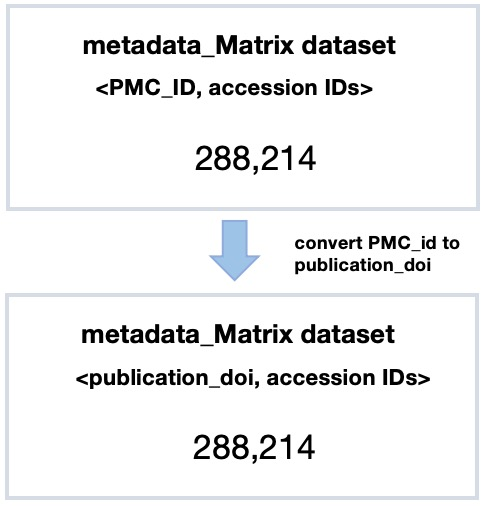

<preprint_doi, publication_doi> that were extracted from biorxiv and medrxiv:

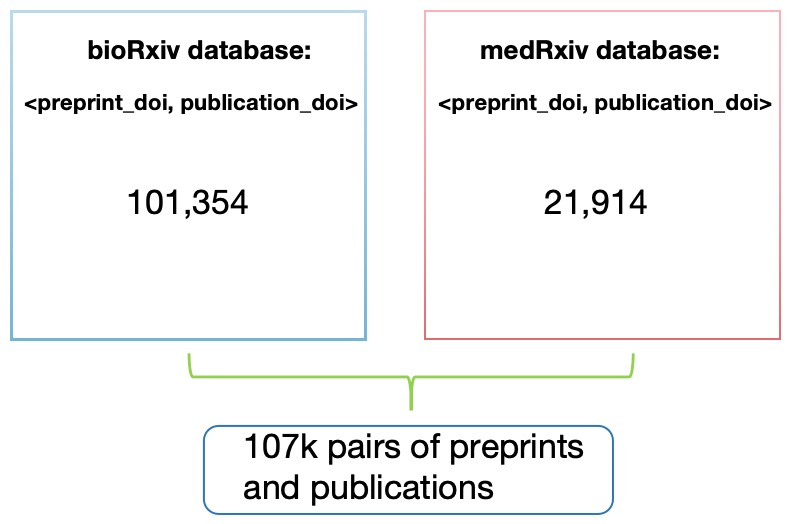


We can make sure that these accession IDs (n=288,214) were mentioned in the text of publications, but we do not know whether they are mentioned in the preprint or not. This is because in this step, we only have dois of preprints and corresponding publications, rather than the full text of preprint.



After that, we will pick out those studies which belonging to primary analysis, and also, accession IDs mentioned in these studies should be of SRA accession IDs. (288,214 accession IDs have GSE IDs as well as SRA IDs)

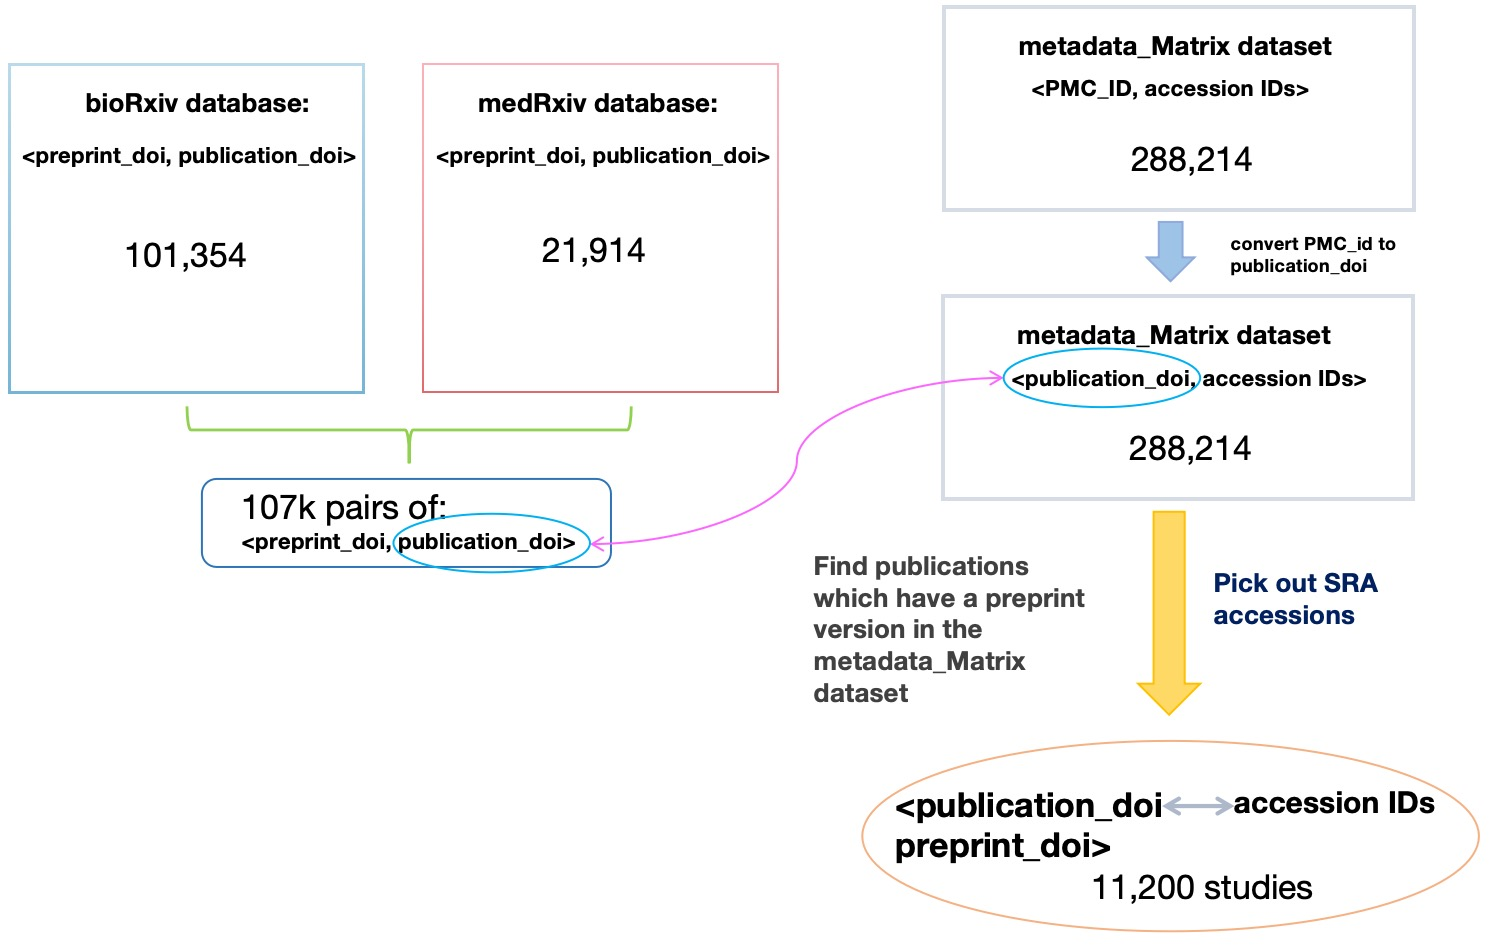

In [ ]:
import pandas as pd

df_new = pd.read_csv("106k_preprints.csv")
df1_new = pd.read_csv("Mohammad_doi.csv")

df_new_reorganize = df_new[['preprint_doi','published_doi','preprint_platform','preprint_date','published_date']]
df1_new_reorganize = df1_new[['pmc_ID','accession','converted_accession','repository','species','library_strategy','reuse_role','published_doi']]

In [ ]:
print(len(df_new))

107095


In [ ]:
print(len(df1_new))

288214


In [ ]:
df2_new = pd.merge(df_new_reorganize, df1_new_reorganize, on ='published_doi')
print(len(df2_new))

22265


In [ ]:
df2_new.to_csv('pub_doi_with_extracted_IDs_with_pre_doi_True.csv')

in this step, let's exclude those accession IDs starts with "GSE":

In [ ]:
SRA_accessions_groups = df2_new[~df2_new['accession'].str.contains("GSE")]
print(len(SRA_accessions_groups))

11200


In [ ]:
SRA_accessions_groups.head(3)

preprint_doi               published_doi preprint_platform  \
2             10.1101/19007740  10.1038/s41598-020-61236-3           medRxiv   
4             10.1101/19008342         10.1093/ofid/ofz548           medRxiv   
9  10.1101/2020.03.06.20032193       10.1128/mBio.00475-20           medRxiv   

  preprint_date published_date      pmc_ID    accession converted_accession  \
2    2019-10-03     2020-03-10  PMC7064533    SRP237494           SRP237494   
4    2019-10-18     2020-01-04  PMC6966243  PRJNA561087           SRP218747   
9    2020-03-10     2020-04-20  PMC7175091  PRJNA613018           SRP253506   

  repository                         species library_strategy reuse_role  
2        SRA                    Homo sapiens        miRNA-Seq          G  
4        SRA        Clostridioides difficile              WGS          G  
9        SRA  human urinary tract metagenome         AMPLICON          G

11200 GSE ID-preprint pairs grouped to 4,201 studies:

In [ ]:
SRA_accessions_groups['preprint_doi'] = SRA_accessions_groups['preprint_doi'].astype(str).str.strip()
SRA_accessions_groups['published_doi'] = SRA_accessions_groups['published_doi'].astype(str).str.strip()

<ipython-input-19-22ad012ba09c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRA_accessions_groups['preprint_doi'] = SRA_accessions_groups['preprint_doi'].astype(str).str.strip()
<ipython-input-19-22ad012ba09c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRA_accessions_groups['published_doi'] = SRA_accessions_groups['published_doi'].astype(str).str.strip()


In [ ]:
aggregated_df = SRA_accessions_groups.groupby(['preprint_doi', 'published_doi']).agg(lambda x: ','.join(x.astype(str))).reset_index()

print(len(aggregated_df))

4201


In [ ]:
aggregated_df

preprint_doi                 published_doi  \
0     10.1101/000208         10.1101/gr.169292.113   
1     10.1101/000422      10.3389/fgene.2014.00013   
2     10.1101/001099  10.1371/journal.pone.0096788   
3     10.1101/001107         10.1101/gr.181016.114   
4     10.1101/001370            10.1038/nmeth.3069   
...              ...                           ...   
4196  10.1101/870378    10.1186/s13059-020-02070-8   
4197  10.1101/870949         10.1099/mgen.0.000402   
4198  10.1101/870956          10.1128/AEM.00356-20   
4199  10.1101/872291     10.1128/mSystems.00239-20   
4200  10.1101/872408    10.1186/s13072-020-00335-x   

                                      preprint_platform  \
0                                       bioRxiv,bioRxiv   
1                                       bioRxiv,bioRxiv   
2     bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxi...   
3                                               bioRxiv   
4                                       bioRxiv,bioRxiv   
...                                                 ...   
4196  bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxi...   
4197                                    bioRxiv,bioRxiv   
4198                                            bioRxiv   
4199                                            bioRxiv   
4200                                            bioRxiv   

                                          preprint_date  \
0                                 2013-11-12,2013-11-12   
1                                 2013-11-14,2013-11-14   
2     2013-12-03,2013-12-03,2013-12-03,2013-12-03,20...   
3                                            2013-12-03   
4                                 2013-12-13,2013-12-13   
...                                                 ...   
4196  2019-12-10,2019-12-10,2019-12-10,2019-12-10,20...   
4197                              2019-12-10,2019-12-10   
4198                                         2019-12-10   
4199                                         2019-12-11   
4200                                         2019-12-11   

                                         published_date  \
0                                 2014-05-13,2014-05-13   
1                                 2014-01-31,2014-01-31   
2     2014-05-09,2014-05-09,2014-05-09,2014-05-09,20...   
3                                            2014-09-29   
4                                 2014-08-17,2014-08-17   
...                                                 ...   
4196  2020-07-06,2020-07-06,2020-07-06,2020-07-06,20...   
4197                              2020-07-03,2020-07-03   
4198                                         2020-03-30   
4199                                         2020-05-11   
4200                                         2020-03-04   

                                                 pmc_ID  \
0                                 PMC4120085,PMC4120085   
1                                 PMC3908319,PMC3908319   
2     PMC4016008,PMC4016008,PMC4016008,PMC4016008,PM...   
3                                            PMC4317169   
4                                 PMC4180789,PMC4180789   
...                                                 ...   
4196  PMC7336428,PMC7336428,PMC7336428,PMC7336428,PM...   
4197                              PMC7641422,PMC7641422   
4198                                         PMC7237769   
4199                                         PMC7219552   
4200                                         PMC7057672   

                                              accession  \
0                                   ERP003980,ERP000991   
1                                   SRR797058,SRR385624   
2     GDS3173,GSM257875,GSM257932,GSM257933,GDS627,G...   
3                                             DRA000503   
4                                   SRX386284,SRX265476   
...                                                 ...   
4196  PRJNA219741,SRR999054,SRR999053,SRR999052,SRR9...   
4197                             PRJNA524057,SRR885

Now, in this step, let's pick out those primary analysis:

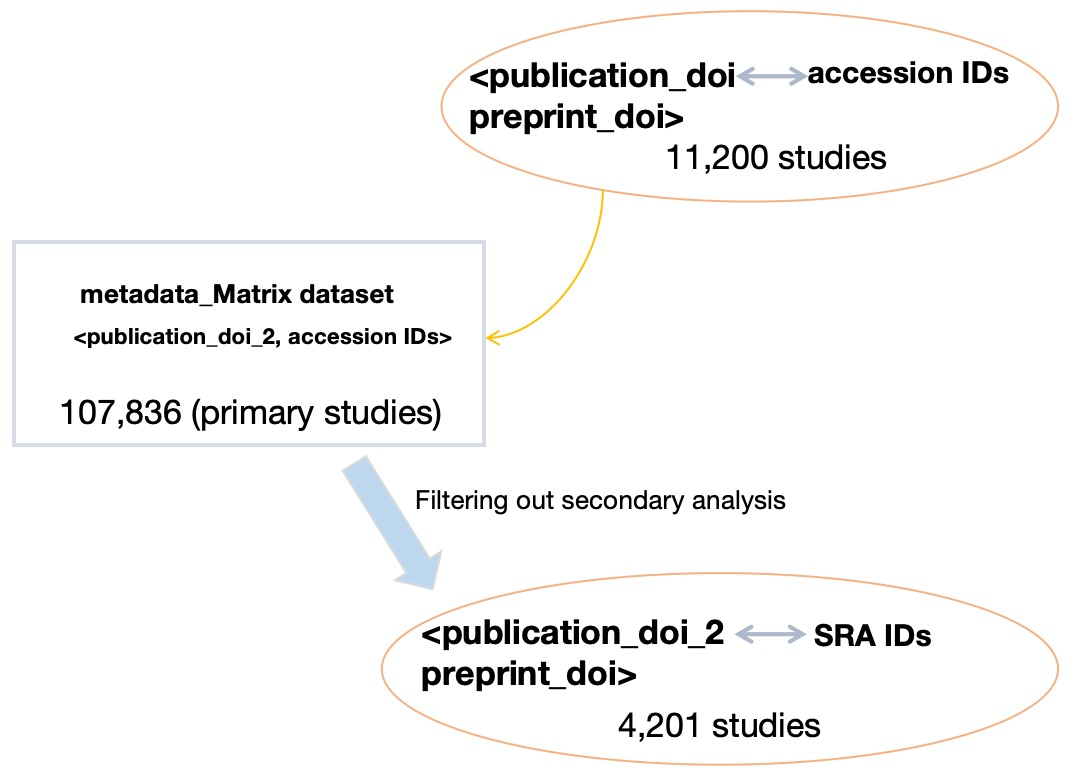

In [ ]:
primary_analysis_group_SRA_accessions = SRA_accessions_groups[SRA_accessions_groups['reuse_role']=='G']
print(len(primary_analysis_group_SRA_accessions))

4201


In [ ]:
primary_analysis_group_SRA_accessions.head(3)

preprint_doi               published_doi preprint_platform  \
2             10.1101/19007740  10.1038/s41598-020-61236-3           medRxiv   
4             10.1101/19008342         10.1093/ofid/ofz548           medRxiv   
9  10.1101/2020.03.06.20032193       10.1128/mBio.00475-20           medRxiv   

  preprint_date published_date      pmc_ID    accession converted_accession  \
2    2019-10-03     2020-03-10  PMC7064533    SRP237494           SRP237494   
4    2019-10-18     2020-01-04  PMC6966243  PRJNA561087           SRP218747   
9    2020-03-10     2020-04-20  PMC7175091  PRJNA613018           SRP253506   

  repository                         species library_strategy reuse_role  
2        SRA                    Homo sapiens        miRNA-Seq          G  
4        SRA        Clostridioides difficile              WGS          G  
9        SRA  human urinary tract metagenome         AMPLICON          G

In [ ]:
aggregated_df_all_primary_studies = primary_analysis_group_SRA_accessions.groupby(['preprint_doi', 'published_doi']).agg(lambda x: ','.join(x.astype(str))).reset_index()
aggregated_df_all_primary_studies

preprint_doi                 published_doi preprint_platform  \
0     10.1101/000208         10.1101/gr.169292.113           bioRxiv   
1     10.1101/000422      10.3389/fgene.2014.00013           bioRxiv   
2     10.1101/001370            10.1038/nmeth.3069           bioRxiv   
3     10.1101/003202            10.1093/hmg/ddu359           bioRxiv   
4     10.1101/005611  10.1371/journal.pone.0103207           bioRxiv   
...              ...                           ...               ...   
2405  10.1101/867986    10.1038/s41598-020-66007-8           bioRxiv   
2406  10.1101/870105               10.1289/EHP6990           bioRxiv   
2407  10.1101/870949         10.1099/mgen.0.000402   bioRxiv,bioRxiv   
2408  10.1101/870956          10.1128/AEM.00356-20           bioRxiv   
2409  10.1101/872291     10.1128/mSystems.00239-20           bioRxiv   

              preprint_date         published_date                 pmc_ID  \
0                2013-11-12             2014-05-13             PMC4120085   
1                2013-11-14             2014-01-31             PMC3908319   
2                2013-12-13             2014-08-17             PMC4180789   
3                2014-03-05             2014-07-11             PMC4240194   
4                2014-05-28             2014-08-13             PMC4132098   
...                     ...                    ...                    ...   
2405             2019-12-08             2020-06-10             PMC7287133   
2406             2019-12-11             2021-01-27             PMC7839352   
2407  2019-12-10,2019-12-10  2020-07-03,2020-07-03  PMC7641422,PMC7641422   
2408             2019-12-10             2020-03-30             PMC7237769   
2409             2019-12-11             2020-05-11             PMC7219552   

                   accession  converted_accession repository  \
0                  ERP003980            ERP003980        SRA   
1                  SRR797058             GSE45504        GEO   
2                  SRX386284            SRP033460        SRA   
3                  ERA261116            ERP004227        SRA   
4                  SRX516577            SRP041142        SRA   
...                      ...                  ...        ...   
2405             PRJNA574841            SRP225648        SRA   
2406             PRJNA609596            SRP251411        SRA   
2407  PRJNA524057,SRR8858297  SRP191024,SRP191024    SRA,SRA   
2408             PRJNA575221            SRP223989        SRA   
2409               SRP217048            SRP217048        SRA   

                          species library_strategy reuse_role  
0            Heliconius melpomene              WGS          G  
1       Homo sapiens;Mus musculus              nan          G  
2                    Homo sapiens         AMPLICON          G  
3               Rattus norvegicus          RNA-Seq          G  
4                    Mus musculus          RNA-Seq          G  
...                           ...              ...        ...  
2405             feces metagenome              WGS          G  
2406           rat gut metagenome              WGS          G  
2407  Giardia muris,Giardia muris          WGS,WGS        G,G  
2408          seawater metagenome         AMPLICON          G  
2409             sheep metagenome         AMPLICON          G  

[2410 rows x 12 columns]

In [ ]:
primary_analysis_group_SRA_accessions.to_csv('/content/primary_pub_mention_SRA_IDs_with_pre_doi_True.csv')

## Build the second dataset:

Preprints with accession IDs extracted from the text of preprints, corresponding publication doi is extracted by the api provided by preprint archives.

So we can make sure that these accession IDs were mentioned in the text of preprints, but we do not know whether they are mentioned in the publication or not.

Please notice that thi step is done in the HPC, here we just need to adjust the format.

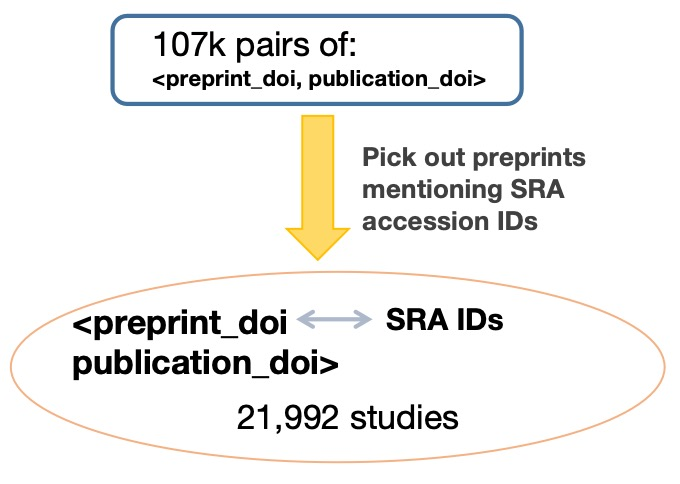


In [ ]:
import pandas as pd
df3_new = pd.read_csv('matches_rep.csv')
df3_new_reorganize=df3_new[['preprint_doi','published_doi','preprint_platform','preprint_date','published_date','GEO/SRA ID']]
df3_new_reorganize.rename(columns={'GEO/SRA ID':'accession'},inplace=True)
print(len(df3_new_reorganize))

21992


<ipython-input-26-49ed052b3334>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_new_reorganize.rename(columns={'GEO/SRA ID':'accession'},inplace=True)


In [ ]:
df3_new_reorganize.head(3)

preprint_doi             published_doi preprint_platform preprint_date  \
0  10.1101/000208     10.1101/gr.169292.113           bioRxiv    2013-11-12   
1  10.1101/000422  10.3389/fgene.2014.00013           bioRxiv    2013-11-14   
2  10.1101/000422  10.3389/fgene.2014.00013           bioRxiv    2013-11-14   

  published_date  accession  
0     2014-05-13  ERP000991  
1     2014-01-31  SRR797058  
2     2014-01-31  SRR385624

In [ ]:
df3_new_reorganize.to_csv('/content/SRA_IDs_extracted_from_preprint.csv')

In [ ]:
primary_preprint_mentioning_SRA_IDs= df3_new_reorganize.groupby(['preprint_doi', 'published_doi']).agg(lambda x: ','.join(x.astype(str))).reset_index()

In [ ]:
primary_preprint_mentioning_SRA_IDs

preprint_doi                  published_doi  \
0     10.1101/000208          10.1101/gr.169292.113   
1     10.1101/000422       10.3389/fgene.2014.00013   
2     10.1101/001081  10.1093/bioinformatics/btu121   
3     10.1101/001107          10.1101/gr.181016.114   
4     10.1101/001370             10.1038/nmeth.3069   
...              ...                            ...   
6660  10.1101/871327   10.1371/journal.ppat.1008717   
6661  10.1101/872184         10.1002/advs.201902880   
6662  10.1101/872291      10.1128/mSystems.00239-20   
6663  10.1101/872309    10.1016/j.ympev.2020.106767   
6664  10.1101/872408     10.1186/s13072-020-00335-x   

                                      preprint_platform  \
0                                               bioRxiv   
1                                       bioRxiv,bioRxiv   
2                                               bioRxiv   
3                                               bioRxiv   
4                                       bioRxiv,bioRxiv   
...                                                 ...   
6660    bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv   
6661  bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxi...   
6662                                            bioRxiv   
6663                                            bioRxiv   
6664  bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxiv,bioRxi...   

                                          preprint_date  \
0                                            2013-11-12   
1                                 2013-11-14,2013-11-14   
2                                            2013-12-03   
3                                            2013-12-03   
4                                 2013-12-13,2013-12-13   
...                                                 ...   
6660  2019-12-11,2019-12-11,2019-12-11,2019-12-11,20...   
6661  2019-12-11,2019-12-11,2019-12-11,2019-12-11,20...   
6662                                         2019-12-11   
6663                                         2019-12-11   
6664  2019-12-11,2019-12-11,2019-12-11,2019-12-11,20...   

                                         published_date  \
0                                            2014-05-13   
1                                 2014-01-31,2014-01-31   
2                                            2014-03-05   
3                                            2014-09-29   
4                                 2014-08-17,2014-08-17   
...                                                 ...   
6660  2020-08-03,2020-08-03,2020-08-03,2020-08-03,20...   
6661  2020-02-11,2020-02-11,2020-02-11,2020-02-11,20...   
6662                                         2020-05-11   
6663                                         2020-02-17   
6664  2020-03-04,2020-03-04,2020-03-04,2020-03-04,20...   

                                              accession  
0                                             ERP000991  
1                                   SRR797058,SRR385624  
2                                             SRA072507  
3                                             DRA000503  
4                                   SRX265476,SRX386284  
...                                                 ...  
6660  PRJNA413051,PRJNA413051,PRJNA413051,ERP115621,...  
6661  SRP011540,ERP107734,ERP107734,SRP011540,ERP107...  
6662                                          SRP217048  
6663                                        PRJNA196484  
6664  SRS557654,SRS557654,SRS557654,SRR1170580,SRS55...  

[6665 rows x 6 columns]

For these studies, we want to make sure that they are primary analysis.

So, if publication doi of these studies (n=21,922) appear in the dataset of primary studies (n=107,836), then they are preprints mentioned primary accession IDs (with publication doi extratced from archive api):

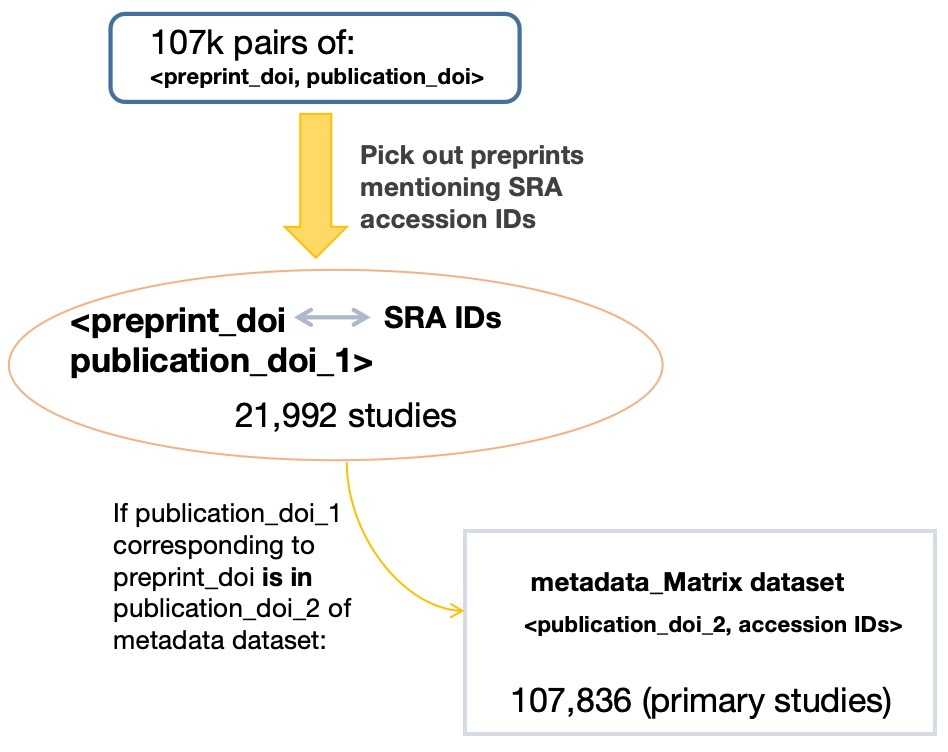

In [ ]:
import pandas as pd
df_21992 = pd.read_csv("SRA_IDs_extracted_from_preprint.csv")
df_288214 = pd.read_csv("Mohammad_doi.csv")

df_21992['published_doi'] = df_21992['published_doi'].astype(str).replace(' ','')
df_288214['published_doi'] = df_288214['published_doi'].astype(str).replace(' ','')

df_primary_analysis = df_288214.loc[df_288214['reuse_role']=='G']
print(len(df_primary_analysis))

107863


In [ ]:
list_of_107836_pub_dois = set(df_primary_analysis['published_doi'])

def echo_test(row):
    if isinstance(row, str) and any (list_of_107836_pub_doi in row for list_of_107836_pub_doi in list_of_107836_pub_dois):
       return "echo!"
    else:
       return "None!"
df_21992['checking_for_primary_analysis'] = df_21992['published_doi'].apply(echo_test)

In [ ]:
preprints_with_extracted_accessions_are_primary_analysis = df_21992.loc[df_21992['checking_for_primary_analysis']=='echo!']
preprints_with_extracted_accessions_are_primary_analysis = preprints_with_extracted_accessions_are_primary_analysis.drop('checking_for_primary_analysis', axis=1)
print(len(preprints_with_extracted_accessions_are_primary_analysis))
preprints_with_extracted_accessions_are_primary_analysis.to_csv('/content/primary_preprint_mention_SRA_IDs_with_pub_doi_True.csv')

5050


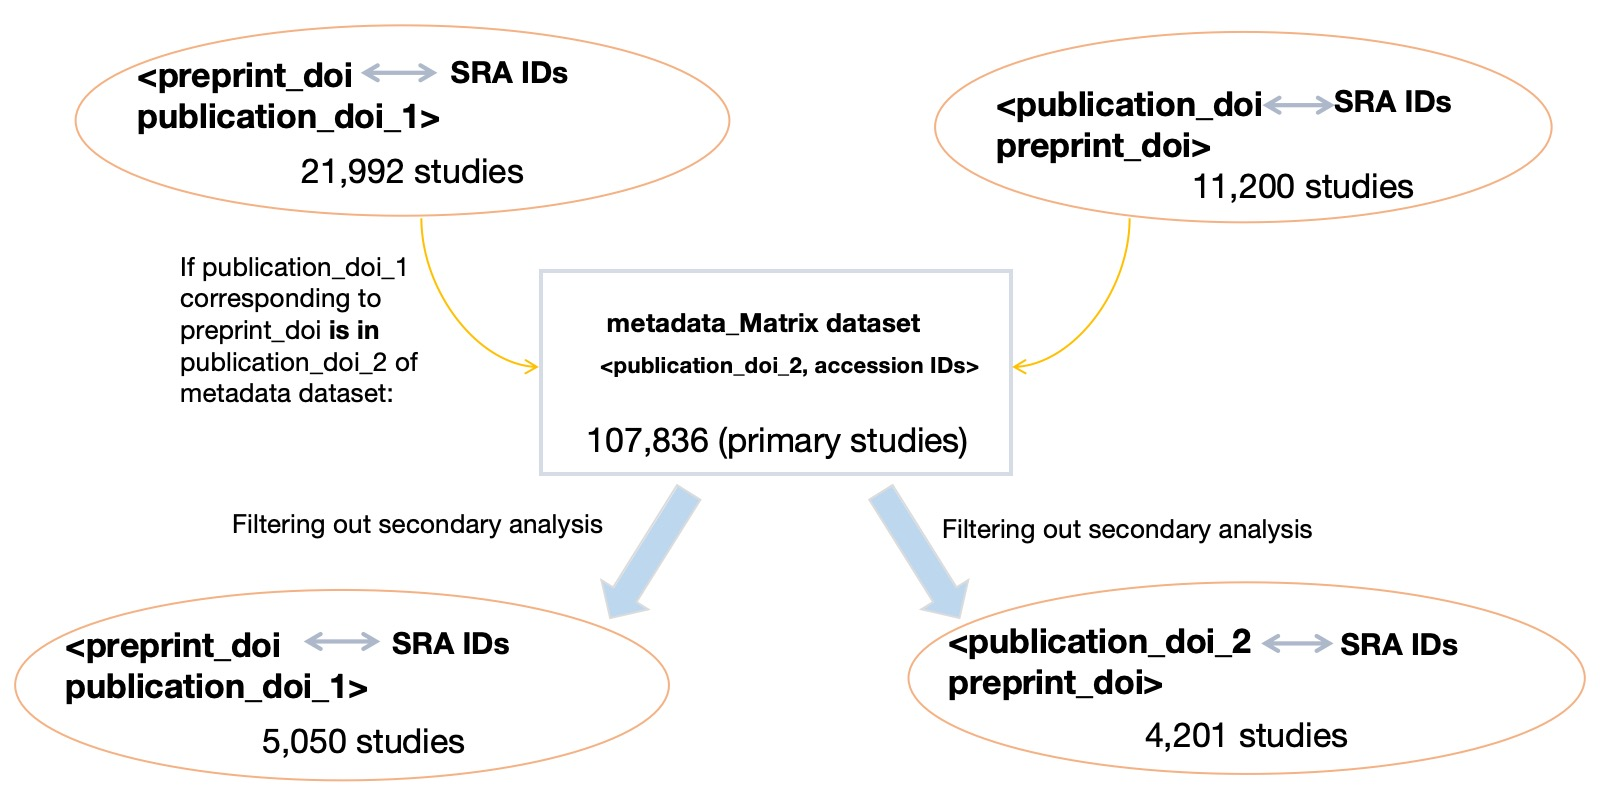


## Find accession ID that was mentioned in both of its preprint and publication and accession ID that was mentioned only in its publication:

In [ ]:
import pandas as pd
primary_analysis_group_SRA_accessions = pd.read_csv('/content/primary_pub_mention_SRA_IDs_with_pre_doi_True.csv')
primary_analysis_group_SRA_accessions['accession']=primary_analysis_group_SRA_accessions['accession'].astype(str).replace(' ','')
primary_analysis_group_SRA_accessions['published_doi']=primary_analysis_group_SRA_accessions['published_doi'].astype(str).replace(' ','')

preprints_with_extracted_accessions_are_primary_analysis['accession']=preprints_with_extracted_accessions_are_primary_analysis['accession'].astype(str).replace(' ','')

In [ ]:
SRA_IDs_share_in_both = pd.merge(preprints_with_extracted_accessions_are_primary_analysis,primary_analysis_group_SRA_accessions, on=['accession','published_doi'],how='inner')

In [ ]:
print(len(SRA_IDs_share_in_both))

2657


Pick out wanted columns:

In [ ]:
SRA_IDs_share_in_both=SRA_IDs_share_in_both[['preprint_platform_x','preprint_doi_x','published_doi','pmc_ID','accession','preprint_date_x','published_date_x','species','library_strategy']]

In [ ]:
SRA_IDs_share_in_both.to_csv('/content/SRA_IDs_share_in_both.csv')

## Find the accession IDs mentioned in preprint but not mentioned in publication:

The SRA IDs that are mentioned only in preprints should be of those SRA IDs that appear in the "primary_preprint_mention_SRA_IDs_with_pub_doi_True.csv" but did not appear in the "SRA_IDs_share_in_both.csv".

In [ ]:
import pandas as pd
df_5050 = pd.read_csv('/content/primary_preprint_mention_SRA_IDs_with_pub_doi_True.csv')
df_2657 = pd.read_csv('/content/SRA_IDs_share_in_both.csv')

df_5050['accession'] = df_5050['accession'].astype(str).str.replace(' ','')
df_2657['accession'] = df_2657['accession'].astype(str).str.replace(' ','')

accession_lists = set(df_2657['accession'].dropna())
def find_IDs_shared_only_in_preprint(accession):
    return "share in both" if accession in accession_lists else "share only in preprint!"

df_5050['IDs_shared_only_in_preprint'] = df_5050['accession'].apply(find_IDs_shared_only_in_preprint)
SRA_IDs_share_only_in_preprint = df_5050[df_5050['IDs_shared_only_in_preprint'] == "share only in preprint!"]
print(len(SRA_IDs_share_only_in_preprint))


2391


## Find the accession IDs mentioned only in publication's text:

The SRA IDs that are mentioned only in publications should be of those SRA IDs that appear in the "primary_pub_mention_SRA_IDs_with_pre_doi_True.csv" but did not appear in the "SRA_IDs_share_in_both.csv".

In [ ]:
import pandas as pd
df_4201 = pd.read_csv('/content/primary_pub_mention_SRA_IDs_with_pre_doi_True.csv')
df_2657 = pd.read_csv('/content/SRA_IDs_share_in_both.csv')

df_4201['accession'] = df_4201['accession'].astype(str).str.replace(' ','')
df_2657['accession'] = df_2657['accession'].astype(str).str.replace(' ','')

accession_lists = set(df_2657['accession'].dropna())
def find_IDs_shared_only_in_pub(accession):
    return "share in both" if accession in accession_lists else "in deed share only in pub!"

df_4201['IDs_shared_only_in_pub'] = df_4201['accession'].apply(find_IDs_shared_only_in_pub)
SRA_IDs_share_only_in_pub = df_4201[df_4201['IDs_shared_only_in_pub'] == "in deed share only in pub!"]
print(len(SRA_IDs_share_only_in_pub))


2314


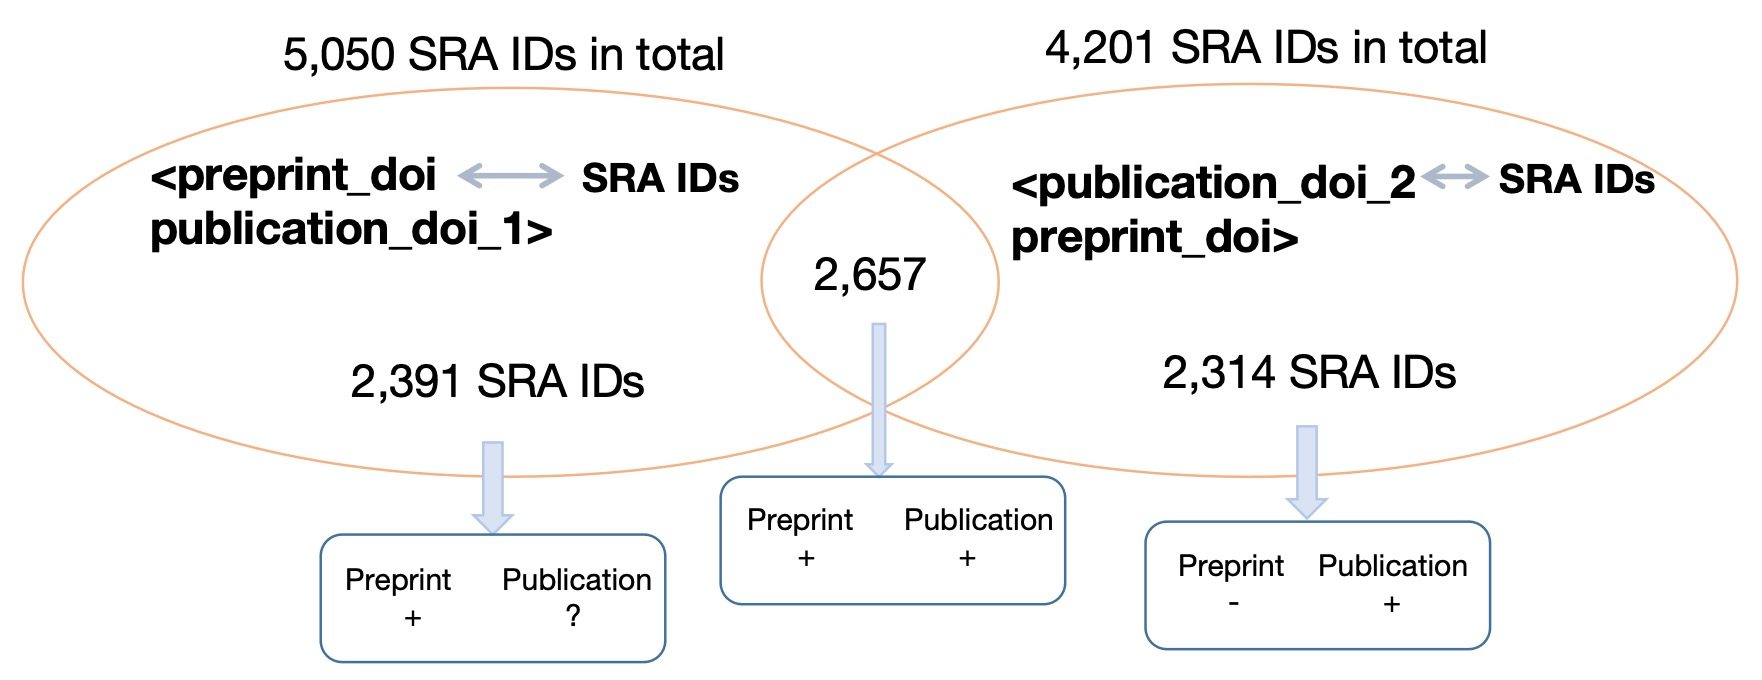

## Find out reasons why there are false positive results

The result is strange: The number of studies that mentioned SRA IDs in both preprints and publications are 2,657; the number of studies that mentioned SRA IDs only in publications are 2,314. The total number added together is 2,657 + 2,314 = 4,971; exceeds 4,971 - 4,201 = 770 than the total amount of SRA IDs that are mentioned in publications.


***This indicates that SRA IDs that shared in both preprints and publications is far less than 2,657. ***

Problem arises at this step:


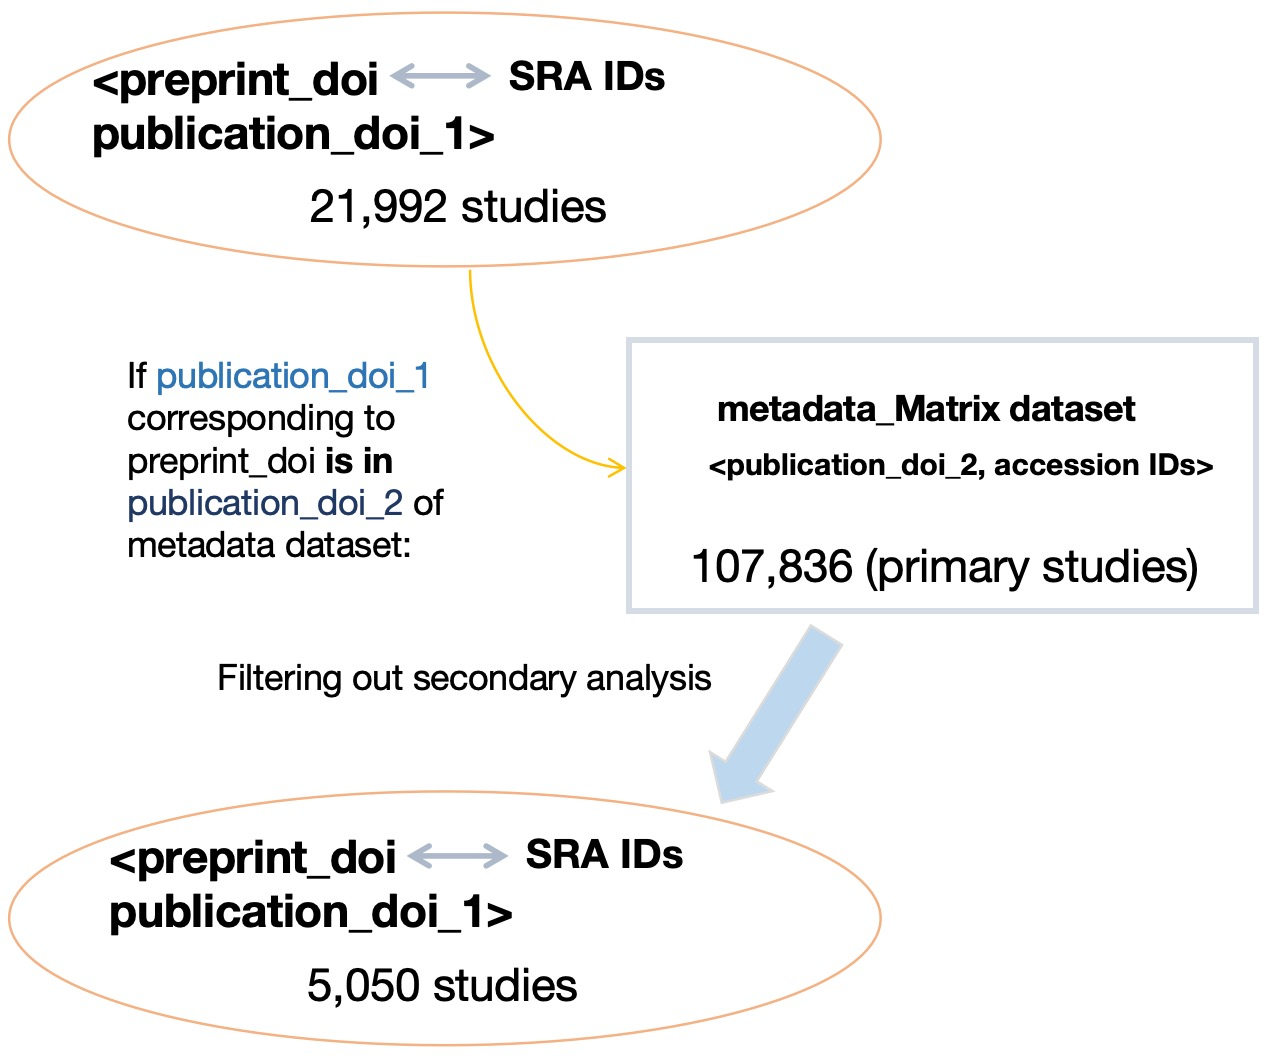

This step you can only guarantee that the publication_doi_1 is indeed primary study, but this does not mean one publication_doi only correspond to one SRA ID.

One publication can mention lots of SRA IDs, some of them are generated by the same group of authors who publish the paper; some of them are secondary accession IDs(other people's raw data) that were used for analysis.

The following figure shows the example.

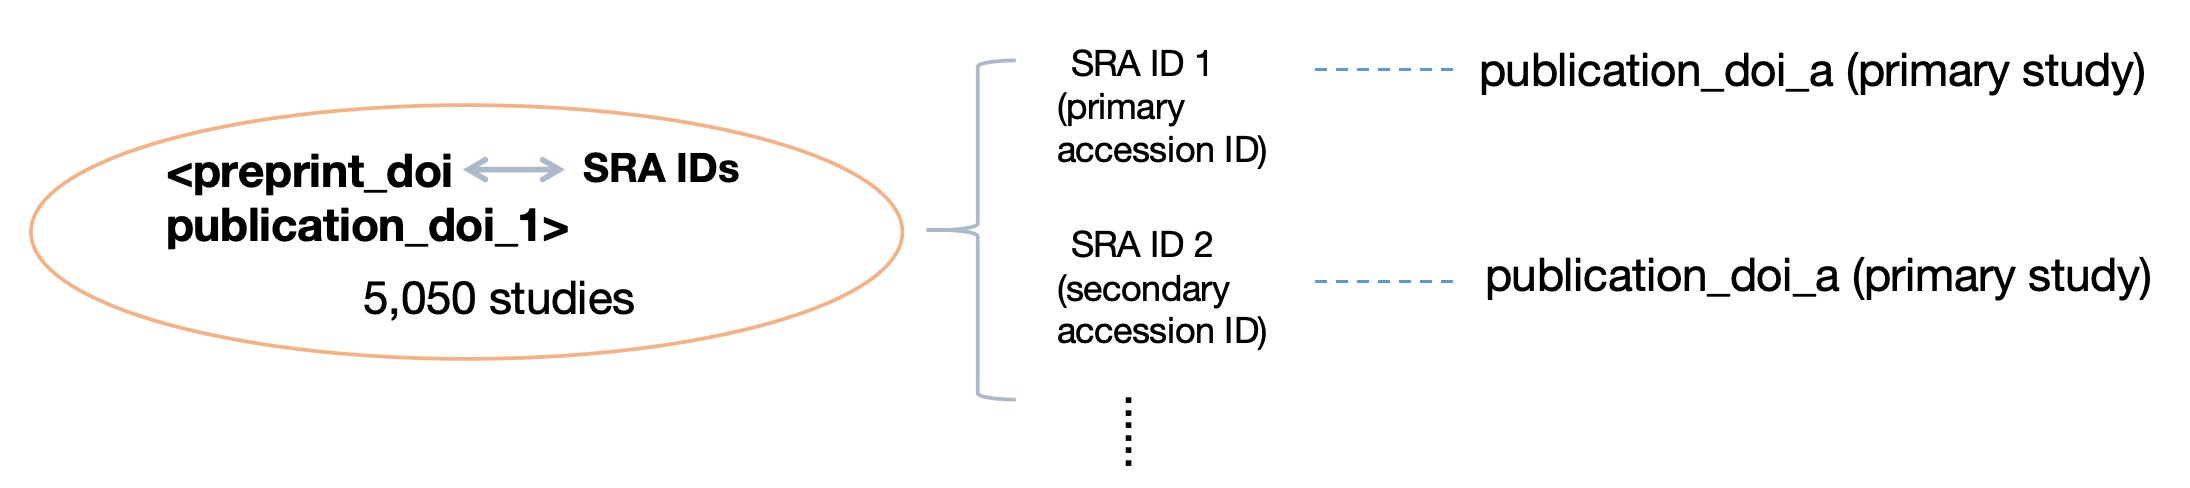

## Remove false positive results

In [ ]:
import pandas as pd
df_21992 = df3_new_reorganize
df_288214 = pd.read_csv("Mohammad_doi.csv")

df_21992['accession'] = df_21992['accession'].astype(str).replace(' ','')
df_288214['published_doi'] = df_288214['published_doi'].astype(str).replace(' ','')
df_288214['accession'] = df_288214['accession'].astype(str).replace(' ','')

df_primary_analysis = df_288214.loc[df_288214['reuse_role']=='G']
print(len(df_primary_analysis))

<ipython-input-28-ac8e055cc66c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21992['accession'] = df_21992['accession'].astype(str).replace(' ','')


107863


In [ ]:
df_21992

preprint_doi                  published_doi preprint_platform  \
0      10.1101/000208          10.1101/gr.169292.113           bioRxiv   
1      10.1101/000422       10.3389/fgene.2014.00013           bioRxiv   
2      10.1101/000422       10.3389/fgene.2014.00013           bioRxiv   
3      10.1101/001081  10.1093/bioinformatics/btu121           bioRxiv   
4      10.1101/001107          10.1101/gr.181016.114           bioRxiv   
...               ...                            ...               ...   
21987  10.1101/420208     10.1093/gigascience/giz100           bioRxiv   
21988  10.1101/420208     10.1093/gigascience/giz100           bioRxiv   
21989  10.1101/442020    10.1534/genetics.119.302733           bioRxiv   
21990  10.1101/442020    10.1534/genetics.119.302733           bioRxiv   
21991  10.1101/442020    10.1534/genetics.119.302733           bioRxiv   

      preprint_date published_date    accession  
0        2013-11-12     2014-05-13    ERP000991  
1        2013-11-14     2014-01-31    SRR797058  
2        2013-11-14     2014-01-31    SRR385624  
3        2013-12-03     2014-03-05    SRA072507  
4        2013-12-03     2014-09-29    DRA000503  
...             ...            ...          ...  
21987    2018-09-18     2019-09-03    SRX648736  
21988    2018-09-18     2019-09-03   SRR1560107  
21989    2018-10-12     2019-10-26    ERR271711  
21990    2018-10-12     2019-10-26  PRJNA399170  
21991    2018-10-12     2019-10-26  PRJNA491526  

[21992 rows x 6 columns]

In [ ]:
list_of_107836_primary_IDs = set(df_primary_analysis['accession'])

def echo_test(row):
    if isinstance(row, str) and any (list_of_107836_primary_ID in row for list_of_107836_primary_ID in list_of_107836_primary_IDs):
       return "echo!"
    else:
       return "None!"
df_21992['checking_for_primary_IDs'] = df_21992['accession'].apply(echo_test)

<ipython-input-30-833ded4ec377>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21992['checking_for_primary_IDs'] = df_21992['accession'].apply(echo_test)


In [ ]:
primary_IDs_extracted_from_preprint = df_21992.loc[df_21992['checking_for_primary_IDs']=='echo!']
primary_IDs_extracted_from_preprint = primary_IDs_extracted_from_preprint.drop('checking_for_primary_IDs', axis=1)
print(len(primary_IDs_extracted_from_preprint))

4691


In [ ]:
primary_IDs_extracted_from_preprint

preprint_doi               published_doi  \
0                   10.1101/000208       10.1101/gr.169292.113   
1                   10.1101/000422    10.3389/fgene.2014.00013   
6                   10.1101/001370          10.1038/nmeth.3069   
19                  10.1101/002469    10.1186/1471-2105-15-126   
35                  10.1101/003202          10.1093/hmg/ddu359   
...                            ...                         ...   
21956  10.1101/2020.12.30.20249040  10.1186/s13073-021-00957-0   
21957  10.1101/2020.12.30.20249040  10.1186/s13073-021-00957-0   
21978    10.1101/2020.12.31.424979      10.1098/rstb.2020.0160   
21979    10.1101/2020.12.31.424979      10.1098/rstb.2020.0160   
21980    10.1101/2020.12.31.424979      10.1098/rstb.2020.0160   

      preprint_platform preprint_date published_date    accession  
0               bioRxiv    2013-11-12     2014-05-13    ERP000991  
1               bioRxiv    2013-11-14     2014-01-31    SRR797058  
6               bioRxiv    2013-12-13     2014-08-17    SRX386284  
19              bioRxiv    2014-02-07     2014-05-03    ERP001731  
35              bioRxiv    2014-03-05     2014-07-11    ERA261116  
...                 ...           ...            ...          ...  
21956           medRxiv    2021-01-04     2021-09-14  PRJNA598446  
21957           medRxiv    2021-01-04     2021-09-14  PRJNA687957  
21978           bioRxiv    2021-01-02     2021-04-05  PRJNA523462  
21979           bioRxiv    2021-01-02     2021-04-05   ERR3415816  
21980           bioRxiv    2021-01-02     2021-04-05   ERR3431204  

[4691 rows x 6 columns]

In [ ]:
primary_IDs_extracted_from_preprint.to_csv('/content/primary_IDs_extracted_from_preprint.csv')

Merge 5,050 studies and 4,691 studies; on "accession" and "published_doi", in this way, we can make sure accession IDs and the publication that mention the ID are primary.

In [ ]:
df_primary_true = pd.merge(preprints_with_extracted_accessions_are_primary_analysis, primary_IDs_extracted_from_preprint, on=['accession','published_doi'], how='inner')

In [ ]:
df_primary_true_final = df_primary_true.drop_duplicates()
print(len(df_primary_true_final))

2881


In [ ]:
df_primary_true_final.to_csv('/content/True_primary_SRA_IDs_obtained_from_preprint.csv')

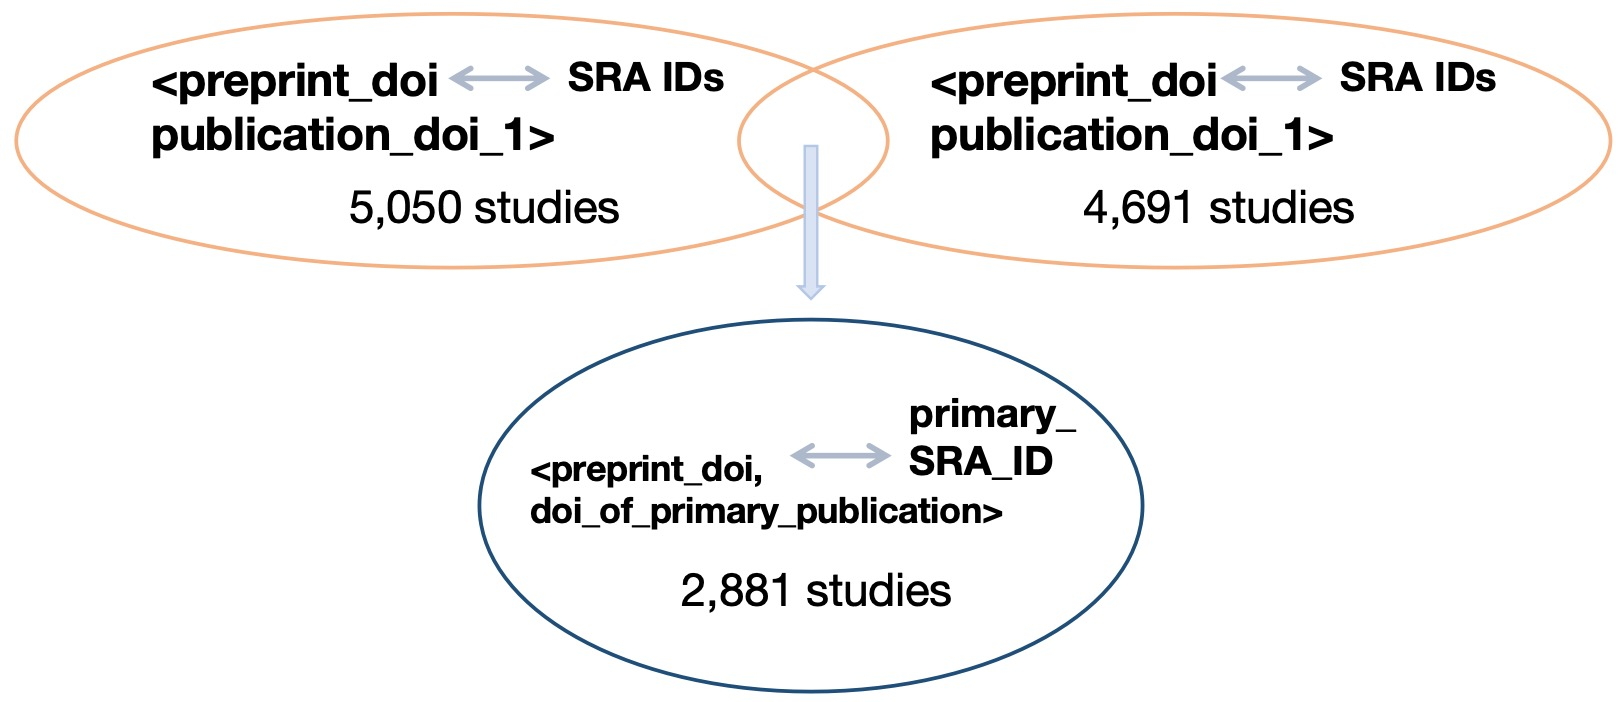

In [ ]:
# Drop unwanted columns
df_primary_true_final_new = pd.read_csv("True_primary_SRA_IDs_obtained_from_preprint.csv")
columns_to_drop = ['Unnamed: 0.1', 'preprint_doi_y','preprint_platform_y','preprint_platform_y','preprint_date_y','published_date_y']
df = df_primary_true_final_new.drop(columns=columns_to_drop)

Unnamed: 0               preprint_doi_x                 published_doi  \
0              0               10.1101/000208         10.1101/gr.169292.113   
1              1               10.1101/000422      10.3389/fgene.2014.00013   
2              6               10.1101/001370            10.1038/nmeth.3069   
3             35               10.1101/003202            10.1093/hmg/ddu359   
4             68               10.1101/005611  10.1371/journal.pone.0103207   
...          ...                          ...                           ...   
2876       21949  10.1101/2020.12.30.20249040    10.1186/s13073-021-00957-0   
2877       21951  10.1101/2020.12.30.20249040    10.1186/s13073-021-00957-0   
2878       21953  10.1101/2020.12.30.20249040    10.1186/s13073-021-00957-0   
2879       21955  10.1101/2020.12.30.20249040    10.1186/s13073-021-00957-0   
2880       21957  10.1101/2020.12.30.20249040    10.1186/s13073-021-00957-0   

     preprint_platform_x preprint_date_x published_date_x    accession  
0                bioRxiv      2013-11-12       2014-05-13    ERP000991  
1                bioRxiv      2013-11-14       2014-01-31    SRR797058  
2                bioRxiv      2013-12-13       2014-08-17    SRX386284  
3                bioRxiv      2014-03-05       2014-07-11    ERA261116  
4                bioRxiv      2014-05-28       2014-08-13    SRX516577  
...                  ...             ...              ...          ...  
2876             medRxiv      2021-01-04       2021-09-14  PRJNA687957  
2877             medRxiv      2021-01-04       2021-09-14  PRJNA687957  
2878             medRxiv      2021-01-04       2021-09-14  PRJNA687957  
2879             medRxiv      2021-01-04       2021-09-14  PRJNA687957  
2880             medRxiv      2021-01-04       2021-09-14  PRJNA687957  

[2881 rows x 7 columns]

In [ ]:
df.to_csv("True_primary_SRA_IDs_obtained_from_preprint_final.csv")

## Updated version of two situations:
## - SRA IDs mentioned in both preprints and publications;
## - SRA IDs mentioned only in publications

### SRA IDs mentioned in both preprints and publications

In [ ]:
df_4201_new = pd.read_csv("primary_pub_mention_SRA_IDs_with_pre_doi_True.csv")
df_primary_true_final_new = pd.read_csv("True_primary_SRA_IDs_obtained_from_preprint_final.csv")
SRA_IDs_share_in_both_new = pd.merge(df_primary_true_final_new, df_4201_new, on=['accession','published_doi'], how='inner')
print(len(SRA_IDs_share_in_both_new))

2663


In [ ]:
SRA_IDs_share_in_both_new_dropduplicate = SRA_IDs_share_in_both_new.drop_duplicates(subset=['accession','preprint_doi_x','published_doi'])

In [ ]:
SRA_IDs_share_in_both_new_dropduplicate

In [ ]:
columns_to_drop2 = ['Unnamed: 0.1', 'Unnamed: 0_x','Unnamed: 0_y','preprint_doi','preprint_platform','preprint_date','published_date','pmc_ID','converted_accession','repository','reuse_role']

In [ ]:
df_share_in_both_true = SRA_IDs_share_in_both_new_dropduplicate.drop(columns=columns_to_drop2)

In [ ]:
df_share_in_both_true.to_csv("SRA_IDs_shared_in_both_True.csv")

### SRA IDs mentioned only in publications

In [ ]:
import pandas as pd
df_4201_new = pd.read_csv("primary_pub_mention_SRA_IDs_with_pre_doi_True.csv")
df_1877 = pd.read_csv('SRA_IDs_shared_in_both_True.csv')

df_4201_new['accession'] = df_4201_new['accession'].astype(str).str.replace(' ','')
df_1877['accession'] = df_1877['accession'].astype(str).str.replace(' ','')

accession_lists = set(df_1877['accession'].dropna())
def find_IDs_shared_only_in_pub(accession):
    return "share in both" if accession in accession_lists else "in deed share only in pub!"

df_4201_new['IDs_shared_only_in_pub'] = df_4201_new['accession'].apply(find_IDs_shared_only_in_pub)
SRA_IDs_share_only_in_pub_TP = df_4201_new[df_4201_new['IDs_shared_only_in_pub'] == "in deed share only in pub!"]
print(len(SRA_IDs_share_only_in_pub_TP))

2314


In [ ]:
SRA_IDs_share_only_in_pub_TP

Unnamed: 0                 preprint_doi               published_doi  \
0              2             10.1101/19007740  10.1038/s41598-020-61236-3   
2              9  10.1101/2020.03.06.20032193       10.1128/mBio.00475-20   
5             17  10.1101/2020.06.11.20128249     10.1126/science.abd2161   
8             40  10.1101/2020.08.25.20181438  10.1172/jci.insight.140598   
11            57  10.1101/2020.04.16.20058560   10.3389/fpubh.2020.567621   
...          ...                          ...                         ...   
4195       22207    10.1101/2021.02.07.430077  10.1038/s41467-021-26278-9   
4196       22208    10.1101/2021.02.07.430077  10.1038/s41467-021-26278-9   
4197       22243               10.1101/058842         10.1038/ncomms14403   
4198       22244               10.1101/058842         10.1038/ncomms14403   
4199       22245               10.1101/058842         10.1038/ncomms14403   

     preprint_platform preprint_date published_date      pmc_ID    accession  \
0              medRxiv    2019-10-03     2020-03-10  PMC7064533    SRP237494   
2              medRxiv    2020-03-10     2020-04-20  PMC7175091  PRJNA613018   
5              medRxiv    2020-06-12     2020-07-23  PMC7402630  PRJNA640656   
8              medRxiv    2020-08-31     2020-09-24  PMC7605522  PRJNA661179   
11             medRxiv    2020-04-21     2020-09-18  PMC7531217  PRJNA638211   
...                ...           ...            ...         ...          ...   
4195           bioRxiv    2021-02-08     2021-10-13  PMC8514461  PRJNA764549   
4196           bioRxiv    2021-02-08     2021-10-13  PMC8514461    SRP337810   
4197           bioRxiv    2016-06-14     2017-02-06  PMC5303874   ERR1450028   
4198           bioRxiv    2016-06-14     2017-02-06  PMC5303874   ERR1450027   
4199           bioRxiv    2016-06-14     2017-02-06  PMC5303874   ERR1450026   

     converted_accession repository  \
0              SRP237494        SRA   
2              SRP253506        SRA   
5              SRP268059        SRA   
8              SRP279904        SRA   
11             SRP266521        SRA   
...                  ...        ...   
4195           SRP337810        SRA   
4196           SRP337810        SRA   
4197           ERP016021        SRA   
4198           ERP016021        SRA   
4199           ERP016021        SRA   

                                              species library_strategy  \
0                                        Homo sapiens        miRNA-Seq   
2                      human urinary tract metagenome         AMPLICON   
5     Severe acute respiratory syndrome coronavirus 2         AMPLICON   
8                                        Homo sapiens         AMPLICON   
11    Severe acute respiratory syndrome coronavirus 2          RNA-Seq   
...                                               ...              ...   
4195                             Arabidopsis thaliana              WGS   
4196                             Arabidopsis thaliana              WGS   
4197                            Staphylococcus aureus              WGS   
4198                            Staphylococcus aureus              WGS   
4199                            Staphylococcus aureus              WGS   

     reuse_role      IDs_shared_only_in_pub  
0             G  in deed share only in pub!  
2             G  in deed share only in pub!  
5             G  in deed share only in pub!  
8             G  in deed share only in pub!  
11            G  in deed share only in pub!  
...         ...                         ...  
4195          G  in deed share only in pub!  
4196          G  in deed share only in pub!  
4197          G  in deed share only in pub!  
4198          G  in deed share only in pub!  
4199          G  in deed share only in pub!  

[2314 rows x 14 columns]

In [ ]:
columns_to_drop3 = ['pmc_ID','converted_accession','repository','reuse_role','IDs_shared_only_in_pub']
df_SRA_IDs_share_only_in_pub_TP = SRA_IDs_share_only_in_pub_TP.drop(columns=columns_to_drop3)

Let's do a test:
If 2,314 are indeed only mentioned in the publications, these accession IDs should not have any cross with the dataset of preprints mentioning accession IDs.

In [ ]:
FP_share_only_in_pub = pd.merge(SRA_IDs_share_only_in_pub, df_21992, on=['accession','published_doi'])
print(len(FP_share_only_in_pub))

0


In [ ]:
SRA_IDs_share_only_in_pub_TP.to_csv("SRA_IDs_shared_only_in_pub_True.csv")

# The second aim is to categorize SRA IDs based on different types of identifiers. (PRJNA, SRX, SRR, ERR...)

Add clomuns to mark which sharing scenario does these SRA IDs belong to and drop unwanted columns.

In [ ]:
import pandas as pd
df_in_both = pd.read_csv("SRA_IDs_shared_in_both_True.csv")
df_in_both['Sharing Scenario'] = 'SRA IDs shared in both'
df_in_both

Unnamed: 0               preprint_doi_x                  published_doi  \
0              0               10.1101/000422       10.3389/fgene.2014.00013   
1              1               10.1101/001370             10.1038/nmeth.3069   
2              2               10.1101/003202             10.1093/hmg/ddu359   
3              3               10.1101/005611   10.1371/journal.pone.0103207   
4              4               10.1101/006221          10.1101/gr.175893.114   
...          ...                          ...                            ...   
1872        2652    10.1101/2020.12.23.424160   10.1371/journal.ppat.1009638   
1873        2653    10.1101/2020.12.23.424208       10.3389/fpls.2021.645218   
1874        2654    10.1101/2020.12.23.424224  10.1080/21505594.2021.1932183   
1875        2657    10.1101/2020.12.28.424584         10.1093/molbev/msab143   
1876        2658  10.1101/2020.12.30.20249040     10.1186/s13073-021-00957-0   

     preprint_platform_x preprint_date_x published_date_x    accession  \
0                bioRxiv      2013-11-14       2014-01-31    SRR797058   
1                bioRxiv      2013-12-13       2014-08-17    SRX386284   
2                bioRxiv      2014-03-05       2014-07-11    ERA261116   
3                bioRxiv      2014-05-28       2014-08-13    SRX516577   
4                bioRxiv      2014-06-11       2014-10-07    SRS514738   
...                  ...             ...              ...          ...   
1872             bioRxiv      2020-12-23       2021-06-01  PRJNA699846   
1873             bioRxiv      2020-12-24       2021-02-17  PRJNA675860   
1874             bioRxiv      2020-12-23       2021-06-24  PRJNA667697   
1875             bioRxiv      2020-12-28       2021-05-08  PRJNA689963   
1876             medRxiv      2021-01-04       2021-09-14  PRJNA687957   

                        species  library_strategy        Sharing Scenario  
0     Homo sapiens;Mus musculus               NaN  SRA IDs shared in both  
1                  Homo sapiens          AMPLICON  SRA IDs shared in both  
2             Rattus norvegicus           RNA-Seq  SRA IDs shared in both  
3                  Mus musculus           RNA-Seq  SRA IDs shared in both  
4      Saccharomyces cerevisiae             OTHER  SRA IDs shared in both  
...                         ...               ...                     ...  
1872               unidentified             OTHER  SRA IDs shared in both  
1873                   Zea mays           RNA-Seq  SRA IDs shared in both  
1874        Schistosoma mansoni  Targeted-Capture  SRA IDs shared in both  
1875            Coelopa frigida               WGS  SRA IDs shared in both  
1876       human gut metagenome               WGS  SRA IDs shared in both  

[1877 rows x 10 columns]

In [ ]:
df_in_both.rename(columns={'preprint_doi_x': 'preprint_doi', 'preprint_platform_x': 'preprint_platform', 'preprint_date_x':'preprint_date', 'published_date_x':'published_date'}, inplace=True)

In [ ]:
df_only_in_pub_need_to_be_modified = pd.read_csv("SRA_IDs_shared_only_in_pub_True.csv")
columns_to_drop4 = ['pmc_ID','converted_accession','repository','reuse_role','IDs_shared_only_in_pub']
df_only_in_pub = df_only_in_pub_need_to_be_modified.drop(columns=columns_to_drop4)

df_only_in_pub['Sharing Scenario'] = 'SRA IDs shared only in pub'

In [ ]:
df_only_in_pub.drop(columns=['Unnamed: 0.1'])

Unnamed: 0                 preprint_doi               published_doi  \
0              2             10.1101/19007740  10.1038/s41598-020-61236-3   
1              9  10.1101/2020.03.06.20032193       10.1128/mBio.00475-20   
2             17  10.1101/2020.06.11.20128249     10.1126/science.abd2161   
3             40  10.1101/2020.08.25.20181438  10.1172/jci.insight.140598   
4             57  10.1101/2020.04.16.20058560   10.3389/fpubh.2020.567621   
...          ...                          ...                         ...   
2309       22207    10.1101/2021.02.07.430077  10.1038/s41467-021-26278-9   
2310       22208    10.1101/2021.02.07.430077  10.1038/s41467-021-26278-9   
2311       22243               10.1101/058842         10.1038/ncomms14403   
2312       22244               10.1101/058842         10.1038/ncomms14403   
2313       22245               10.1101/058842         10.1038/ncomms14403   

     preprint_platform preprint_date published_date    accession  \
0              medRxiv    2019-10-03     2020-03-10    SRP237494   
1              medRxiv    2020-03-10     2020-04-20  PRJNA613018   
2              medRxiv    2020-06-12     2020-07-23  PRJNA640656   
3              medRxiv    2020-08-31     2020-09-24  PRJNA661179   
4              medRxiv    2020-04-21     2020-09-18  PRJNA638211   
...                ...           ...            ...          ...   
2309           bioRxiv    2021-02-08     2021-10-13  PRJNA764549   
2310           bioRxiv    2021-02-08     2021-10-13    SRP337810   
2311           bioRxiv    2016-06-14     2017-02-06   ERR1450028   
2312           bioRxiv    2016-06-14     2017-02-06   ERR1450027   
2313           bioRxiv    2016-06-14     2017-02-06   ERR1450026   

                                              species library_strategy  \
0                                        Homo sapiens        miRNA-Seq   
1                      human urinary tract metagenome         AMPLICON   
2     Severe acute respiratory syndrome coronavirus 2         AMPLICON   
3                                        Homo sapiens         AMPLICON   
4     Severe acute respiratory syndrome coronavirus 2          RNA-Seq   
...                                               ...              ...   
2309                             Arabidopsis thaliana              WGS   
2310                             Arabidopsis thaliana              WGS   
2311                            Staphylococcus aureus              WGS   
2312                            Staphylococcus aureus              WGS   
2313                            Staphylococcus aureus              WGS   

                Sharing Scenario  
0     SRA IDs shared only in pub  
1     SRA IDs shared only in pub  
2     SRA IDs shared only in pub  
3     SRA IDs shared only in pub  
4     SRA IDs shared only in pub  
...                          ...  
2309  SRA IDs shared only in pub  
2310  SRA IDs shared only in pub  
2311  SRA IDs shared only in pub  
2312  SRA IDs shared only in pub  
2313  SRA IDs shared only in pub  

[2314 rows x 10 columns]

Concatenate two sharing scenarios into one large file:

In [ ]:
df_all_SRA_studies = pd.concat([df_in_both, df_only_in_pub], ignore_index=True)
df_all_SRA_studies.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

preprint_doi                 published_doi  \
0                10.1101/000422      10.3389/fgene.2014.00013   
1                10.1101/001370            10.1038/nmeth.3069   
2                10.1101/003202            10.1093/hmg/ddu359   
3                10.1101/005611  10.1371/journal.pone.0103207   
4                10.1101/006221         10.1101/gr.175893.114   
...                         ...                           ...   
4186  10.1101/2021.02.07.430077    10.1038/s41467-021-26278-9   
4187  10.1101/2021.02.07.430077    10.1038/s41467-021-26278-9   
4188             10.1101/058842           10.1038/ncomms14403   
4189             10.1101/058842           10.1038/ncomms14403   
4190             10.1101/058842           10.1038/ncomms14403   

     preprint_platform preprint_date published_date    accession  \
0              bioRxiv    2013-11-14     2014-01-31    SRR797058   
1              bioRxiv    2013-12-13     2014-08-17    SRX386284   
2              bioRxiv    2014-03-05     2014-07-11    ERA261116   
3              bioRxiv    2014-05-28     2014-08-13    SRX516577   
4              bioRxiv    2014-06-11     2014-10-07    SRS514738   
...                ...           ...            ...          ...   
4186           bioRxiv    2021-02-08     2021-10-13  PRJNA764549   
4187           bioRxiv    2021-02-08     2021-10-13    SRP337810   
4188           bioRxiv    2016-06-14     2017-02-06   ERR1450028   
4189           bioRxiv    2016-06-14     2017-02-06   ERR1450027   
4190           bioRxiv    2016-06-14     2017-02-06   ERR1450026   

                        species library_strategy            Sharing Scenario  
0     Homo sapiens;Mus musculus              NaN      SRA IDs shared in both  
1                  Homo sapiens         AMPLICON      SRA IDs shared in both  
2             Rattus norvegicus          RNA-Seq      SRA IDs shared in both  
3                  Mus musculus          RNA-Seq      SRA IDs shared in both  
4      Saccharomyces cerevisiae            OTHER      SRA IDs shared in both  
...                         ...              ...                         ...  
4186       Arabidopsis thaliana              WGS  SRA IDs shared only in pub  
4187       Arabidopsis thaliana              WGS  SRA IDs shared only in pub  
4188      Staphylococcus aureus              WGS  SRA IDs shared only in pub  
4189      Staphylococcus aureus              WGS  SRA IDs shared only in pub  
4190      Staphylococcus aureus              WGS  SRA IDs shared only in pub  

[4191 rows x 9 columns]

In [ ]:
df_all_SRA_studies.to_csv("All_SRA_pairs.csv")

See how many different types of identifiers are there:

In [ ]:
df_checking_categorizes = pd.read_csv("All_SRA_pairs.csv")
df_checking_categorizes['accession'] = df_checking_categorizes['accession'].astype(str).str.replace(' ','')

identifier_types =df_checking_categorizes['accession'].str.extract(r'^([A-Z]+)')[0]

unique_identifiers = identifier_types.unique()
print("Unique identifier types:", unique_identifiers)

Unique identifier types: ['SRR' 'SRX' 'ERA' 'SRS' 'SRP' 'SRA' 'PRJNA' 'ERP' 'ERR' 'DRA' 'ERS' 'DRX'
 'DRR' 'ERX' 'GPL' 'GSM' 'DRP']


Drop those studies mentioned "GPL" and "GSM":

In [ ]:
df_filtered = df_checking_categorizes[~df_checking_categorizes['accession'].str.startswith(('GSM', 'GPL'))]
print(len(df_filtered))

4186


In [ ]:
df_filtered_new = df_filtered.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2'])

In [ ]:
df_filtered_new.to_csv("All_SRA_pairs_new.csv")

# The third aim is to make metadata of 34 pairs of SRA IDs complete:

In [ ]:
import pandas as pd

df_whole_pairs = pd.read_csv('106k_preprints.csv')
df_whole_pairs['preprint_doi'] = df_whole_pairs['preprint_doi'].astype(str).str.strip()
df_whole_pairs['published_doi'] = df_whole_pairs['published_doi'].astype(str).str.strip()

df_34_SRAIDs = pd.read_csv('SRA_IDs_from_manual_check.csv')
df_34_SRAIDs.rename(columns={'publication_doi': 'published_doi'}, inplace=True)
df_34_SRAIDs['preprint_doi'] = df_34_SRAIDs['preprint_doi'].astype(str).str.strip()
df_34_SRAIDs['published_doi'] = df_34_SRAIDs['published_doi'].astype(str).str.strip()

matches = pd.merge(df_whole_pairs, df_34_SRAIDs, on=['preprint_doi','published_doi'])
matches

Unnamed: 0               preprint_doi                 published_doi  \
0           96             10.1101/003202            10.1093/hmg/ddu359   
1         1718             10.1101/033001         10.1101/gr.202432.115   
2        10546             10.1101/020842     10.1186/s13059-015-0844-5   
3        10581             10.1101/206052     10.1038/s41586-018-0414-6   
4        17345             10.1101/359521     10.1038/s41556-019-0272-y   
5        18436             10.1101/336172         10.1101/gr.240093.118   
6        22809             10.1101/548115     10.1038/s41597-019-0116-4   
7        23178             10.1101/479568    10.1038/s41467-019-11020-3   
8        23771             10.1101/354076             10.1111/mpp.12841   
9        24732             10.1101/428987    10.1038/s41467-019-11675-y   
10       25280             10.1101/525741    10.1038/s41467-019-11713-9   
11       27548             10.1101/530667    10.1038/s41467-019-12802-5   
12       27548             10.1101/530667    10.1038/s41467-019-12802-5   
13       27548             10.1101/530667    10.1038/s41467-019-12802-5   
14       31145             10.1101/380758    10.1038/s41467-019-14266-z   
15       32793             10.1101/721464     10.1038/s41586-020-2039-9   
16       39372             10.1101/848952    10.1038/s41388-020-01389-7   
17       45215  10.1101/2019.12.20.875807    10.1038/s41467-020-19452-y   
18       52604             10.1101/327635         10.1101/gr.234104.117   
19       60271             10.1101/623363         10.1101/gr.233288.117   
20       61858             10.1101/870352    10.1038/s41467-021-22639-6   
21       63233  10.1101/2020.08.25.266585        10.1101/gad.345041.120   
22       63233  10.1101/2020.08.25.266585        10.1101/gad.345041.120   
23       63233  10.1101/2020.08.25.266585        10.1101/gad.345041.120   
24       65346  10.1101/2020.10.27.356436           10.1093/nar/gkab517   
25       66344  10.1101/2020.05.14.096016    10.1186/s12864-021-07528-y   
26       69086  10.1101/2021.03.02.433656           10.1093/nar/gkab749   
27       70071  10.1101/2021.02.09.430547  10.1371/journal.ppat.1009723   
28       80468  10.1101/2021.03.16.435730           10.7554/eLife.70207   
29       80468  10.1101/2021.03.16.435730           10.7554/eLife.70207   
30       80468  10.1101/2021.03.16.435730           10.7554/eLife.70207   
31       80468  10.1101/2021.03.16.435730           10.7554/eLife.70207   
32       84005  10.1101/2020.05.06.079921       10.1073/pnas.2010761117   
33       99693             10.1101/058842           10.1038/ncomms14403   

                                  published_journal preprint_platform  \
0                          Human Molecular Genetics           bioRxiv   
1                                   Genome Research           bioRxiv   
2                                    Genome Biology           bioRxiv   
3                                            Nature           bioRxiv   
4                               Nature Cell Biology           bioRxiv   
5                                   Genome Research           bioRxiv   
6                                   Scientific Data           bioRxiv   
7                             Nature Communications           bioRxiv   
8                         Molecular Plant Pathology           bioRxiv   
9                             Nature Communications           bioRxiv   
10                            Nature Communications           bioRxiv   
11                            Nature Communications           bioRxiv   
12                            Nature Communications           bioRxiv   
13                            Nature Communications           bioRxiv   
14                            Nature Communications           bioRxiv   
15                                           Nature           bioRxiv   
16                                         Oncogene           bioRxiv   
17                            Nature Communications           bi

In [ ]:
column_names=['Unnamed: 0','published_journal','preprint_title','preprint_authors','preprint_category','preprint_abstract','preprint_author_corresponding','preprint_author_corresponding_institution','Unnamed: 2']
matches.drop(columns=column_names, inplace=True)
matches.rename(columns={'SRA_IDs_newly_found_in_pub_through_manual_check': 'accession'}, inplace=True)

In [ ]:
matches.to_csv("SRA_IDs_from_manual_check_need_to_be_extracted.csv")

# The fourth aim is to download all xml files based on each accession ID through NCBI Entrez Direct. Please notice that this step is performed on the HPC.

For n=4,186 SRA IDs:

extract_all_xml_for_SRA_IDs.sh

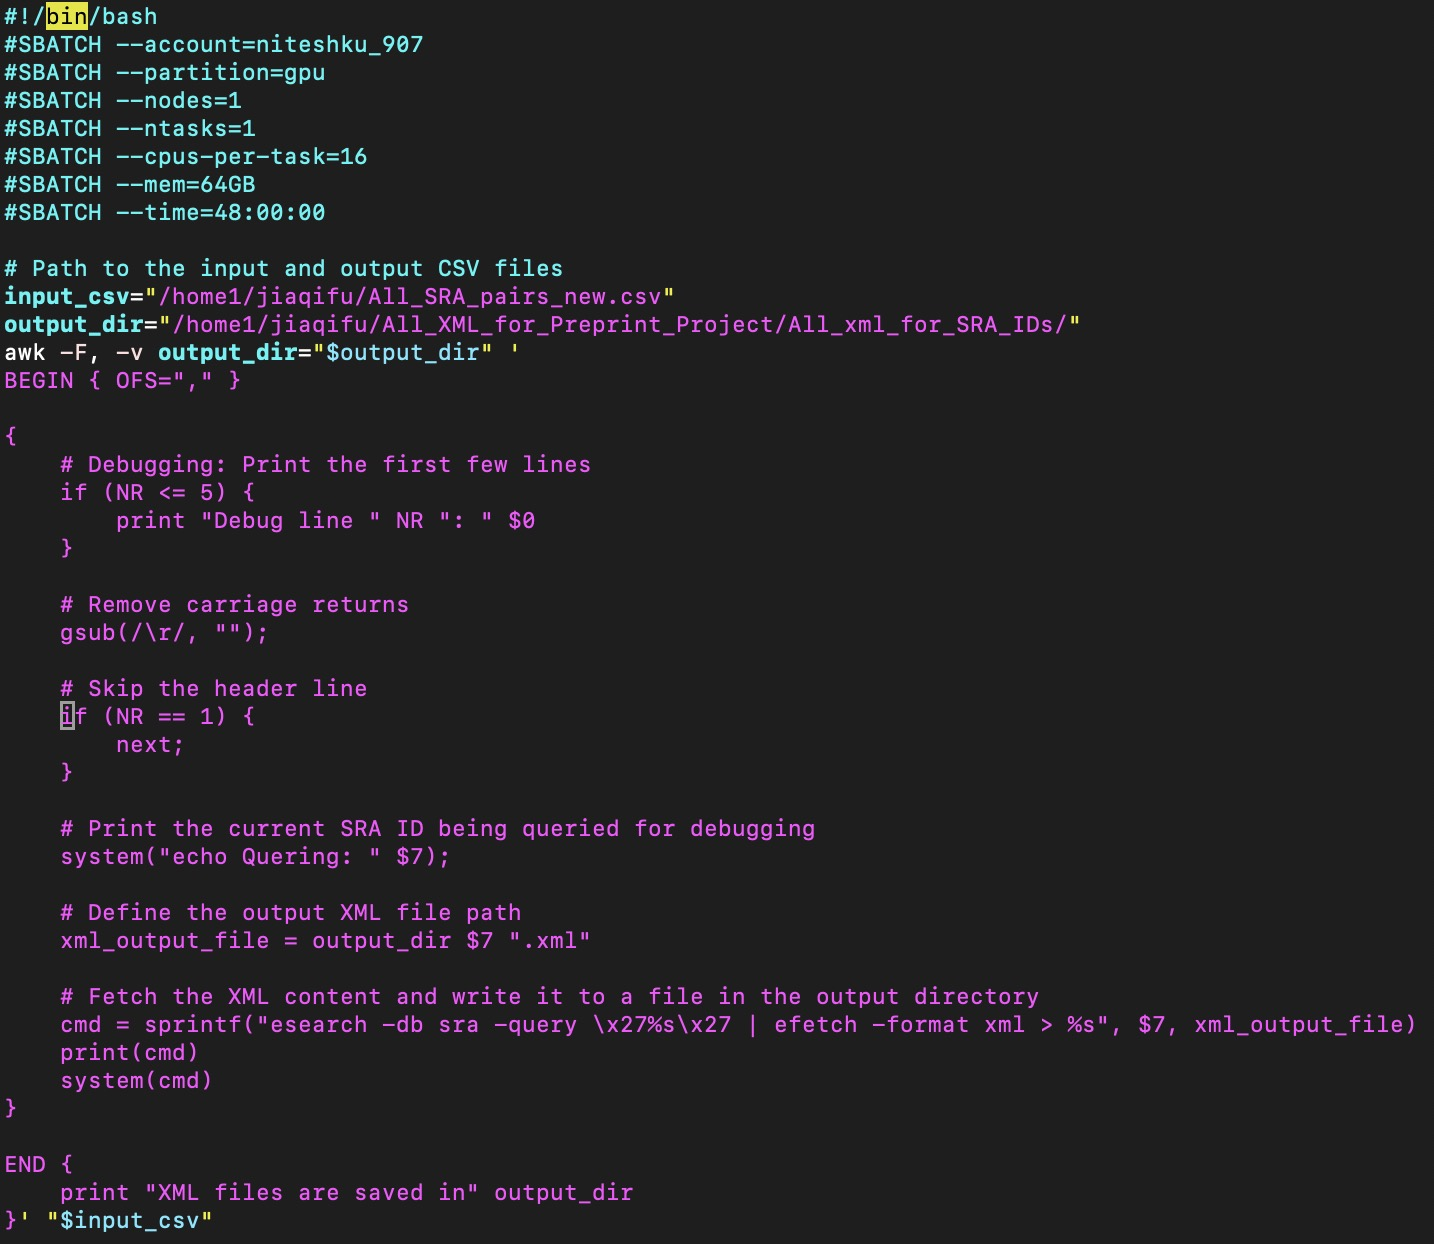

However, there are only 4,178 successfully downloaded. We have 4,186 accession IDs in total. Let's check which of those were omitted.

In [ ]:
import pandas as pd

df_4186 = pd.read_csv('All_SRA_pairs_new.csv')
df_4186['accession'] = df_4186['accession'].astype(str).str.strip()
with open('4,179_accession_ids.txt','r') as file:
    SRA_IDs_4178 = file.read().splitlines()

SRA_IDs_not_complete = set(SRA_IDs_4178)

def echo_test(row):
    if row in SRA_IDs_not_complete:
       return "echo!"
    else:
       return "None!"

df_4186['checking_for_omited_IDs'] = df_4186['accession'].apply(echo_test)

In [ ]:
df_omited_IDs = df_4186.loc[df_4186['checking_for_omited_IDs'] == 'None!']
df_omited_IDs

Empty DataFrame
Columns: [Unnamed: 0, preprint_doi, published_doi, preprint_platform, preprint_date, published_date, accession, species, library_strategy, Sharing Scenario, checking_for_omited_IDs]
Index: []

Alright, these (n=8)(4,186-4,178) SRA IDs are mentioned in multiple publications.

For n=34 SRA IDs (from manual check part):

extract_xml_for_34_SRA_IDs_from_manualcheck.sh

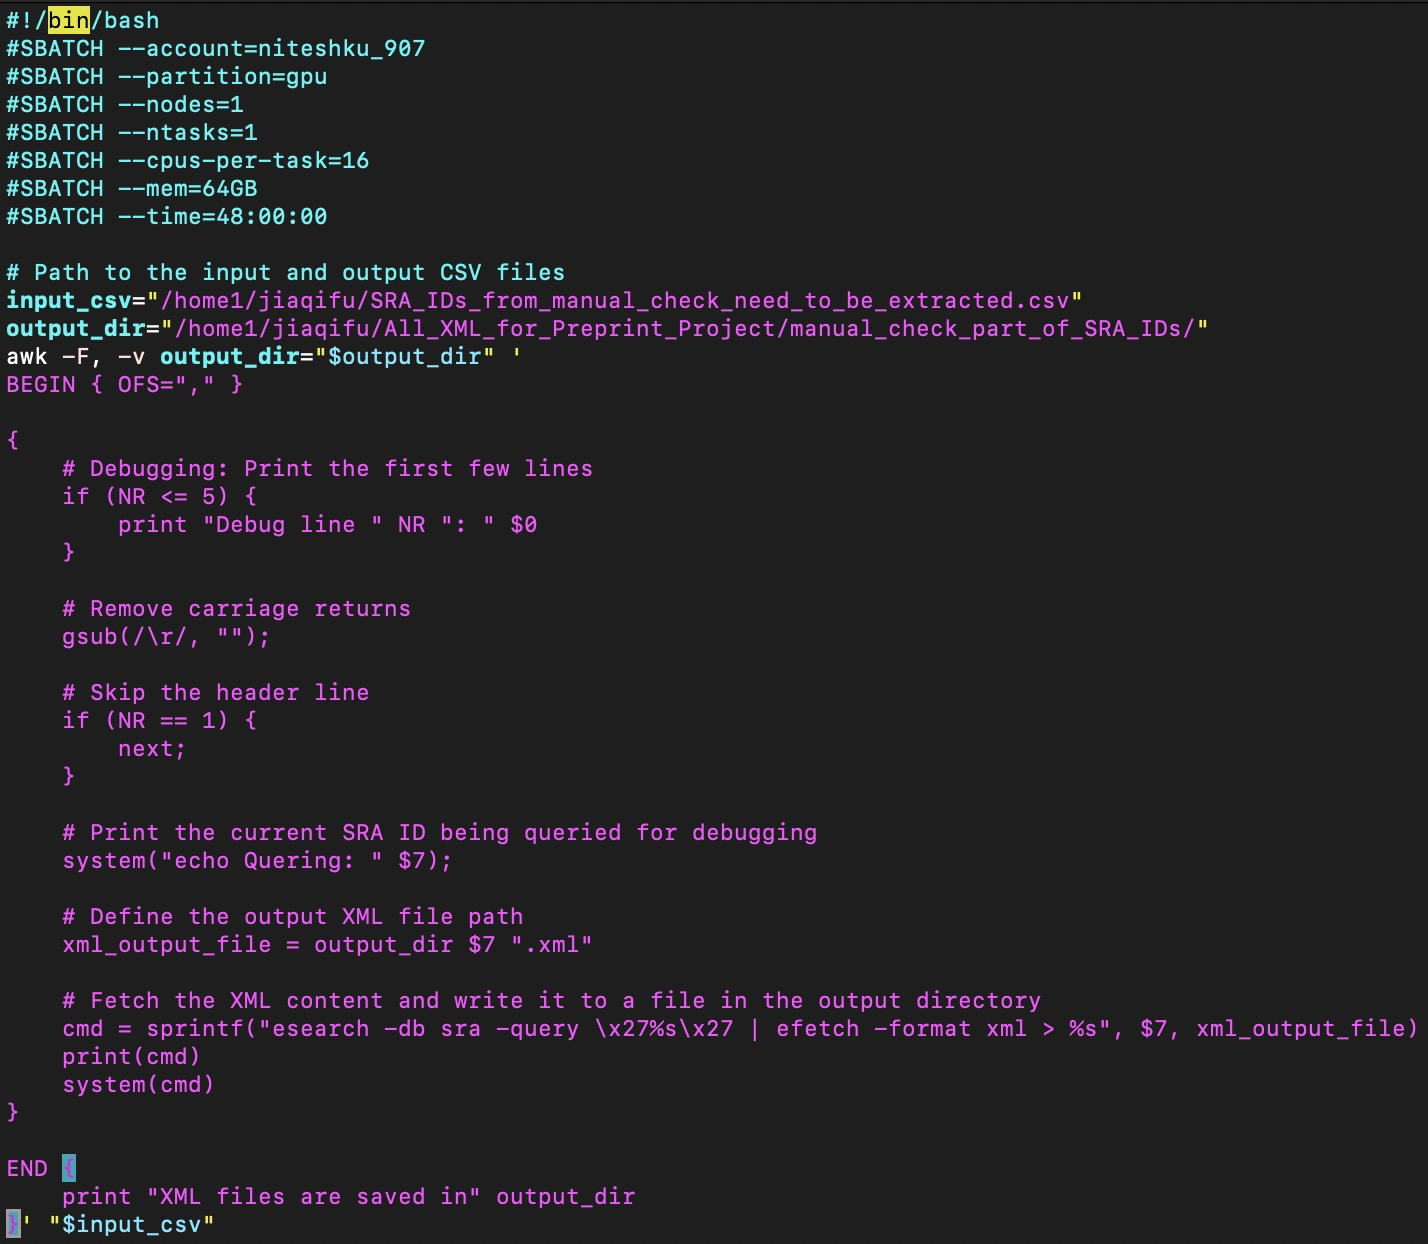

# The fifth aim is to extract metadata of each SRA ID through NCBI Entrez Direct. Please notice that this step is performed on the HPC.

For n=4,186 SRA IDs:

metadata_for_SRA_IDs.py

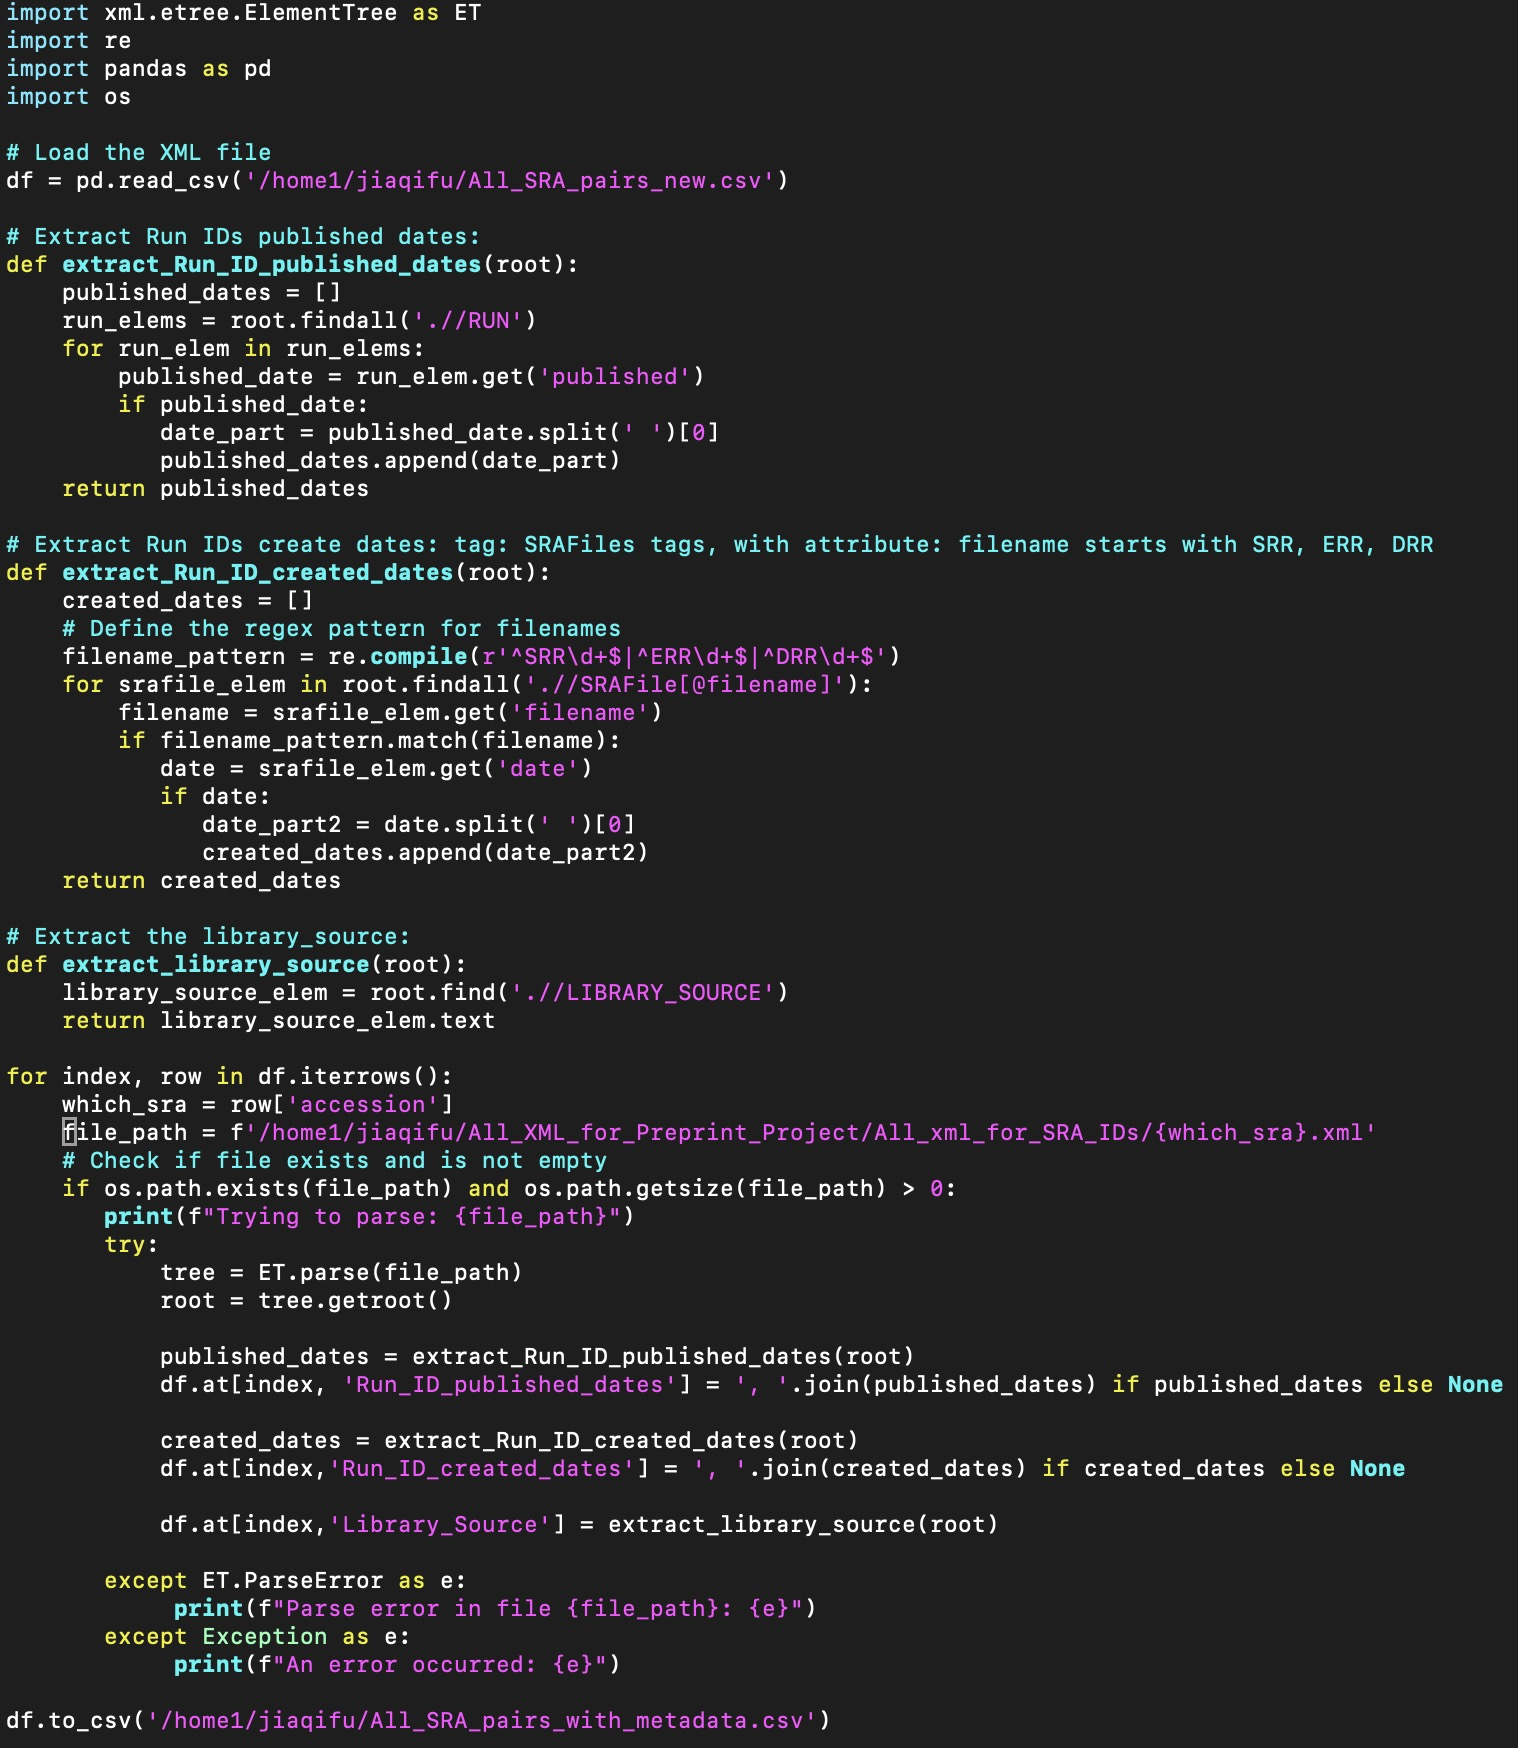

For n=34 SRA IDs (from manual check part):

metadata_for_SRA_IDs_from_manual_check.py

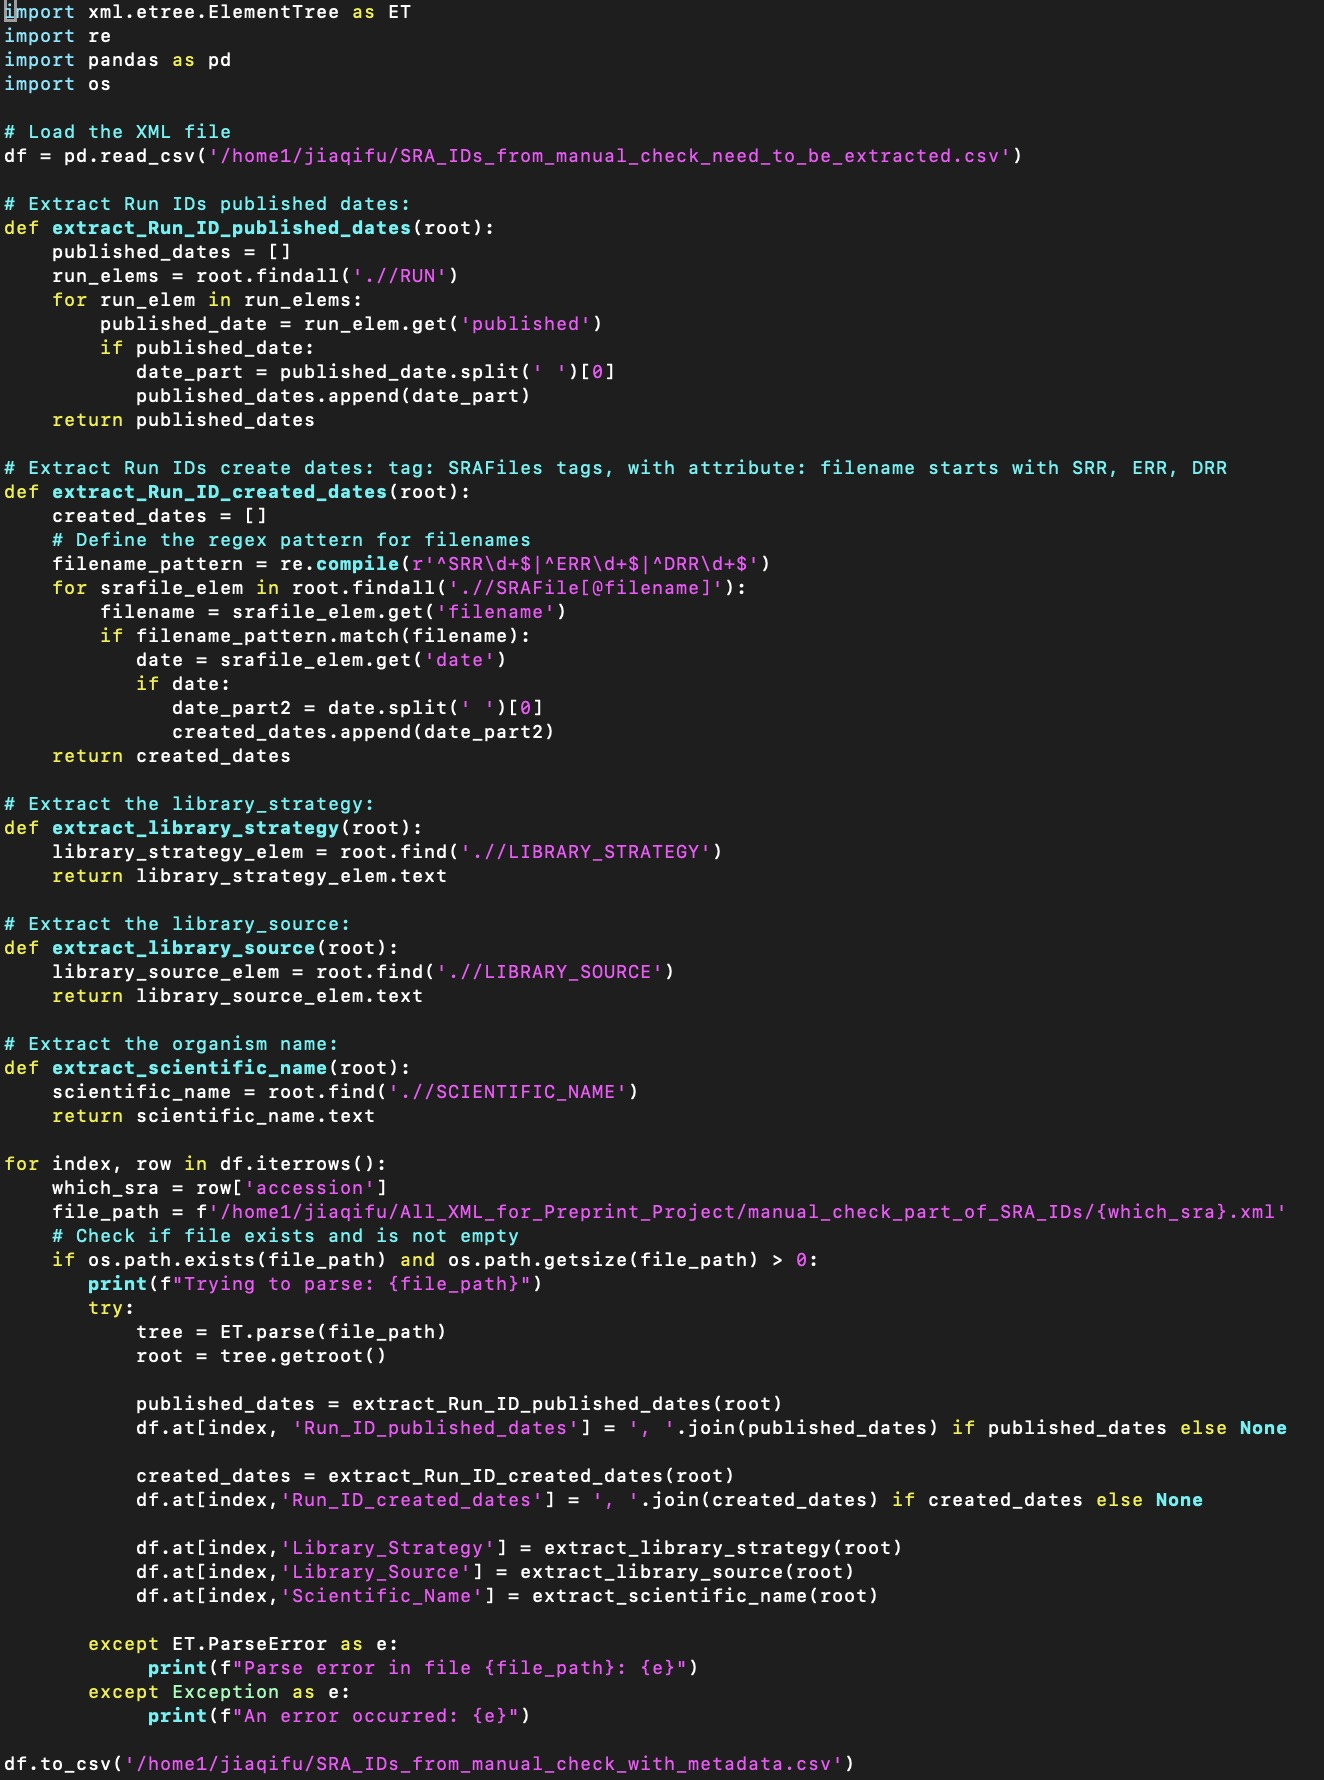

# The sixth aim is to check the erroneous rows as well as add 34 pairs of manual check SRA IDs to the big dataset (n=4,186).

For n=4,186 SRA IDs:

Some accession IDs in the dataset have an excessive number of associated runs. Consequently, the "Run_ID_published_dates" and "Run_ID_created_dates" columns for these accession IDs contain too much data, making them excessively long and exceeding the limit number of words of a cell.



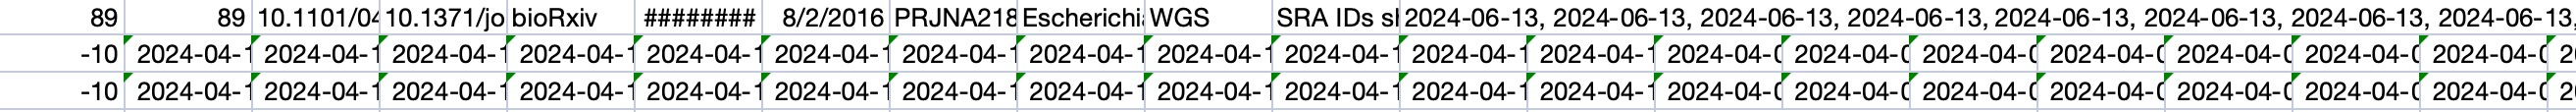

This is what it looks like in the CSV file, erroneous colums are those rows with index starting a minus symbol. Let's check if these rows are normal in the pandas:

In [ ]:
import pandas as pd
df_need_to_be_cleaned = pd.read_csv("All_SRA_pairs_with_metadata.csv")
df_need_to_be_cleaned.drop(columns=['Unnamed: 0'], inplace=True)
df_need_to_be_cleaned

Unnamed: 0.1               preprint_doi                 published_doi  \
0                0             10.1101/000422      10.3389/fgene.2014.00013   
1                1             10.1101/001370            10.1038/nmeth.3069   
2                2             10.1101/003202            10.1093/hmg/ddu359   
3                3             10.1101/005611  10.1371/journal.pone.0103207   
4                4             10.1101/006221         10.1101/gr.175893.114   
...            ...                        ...                           ...   
4181          4181  10.1101/2021.02.07.430077    10.1038/s41467-021-26278-9   
4182          4182  10.1101/2021.02.07.430077    10.1038/s41467-021-26278-9   
4183          4183             10.1101/058842           10.1038/ncomms14403   
4184          4184             10.1101/058842           10.1038/ncomms14403   
4185          4185             10.1101/058842           10.1038/ncomms14403   

     preprint_platform preprint_date published_date    accession  \
0              bioRxiv    2013-11-14     2014-01-31    SRR797058   
1              bioRxiv    2013-12-13     2014-08-17    SRX386284   
2              bioRxiv    2014-03-05     2014-07-11    ERA261116   
3              bioRxiv    2014-05-28     2014-08-13    SRX516577   
4              bioRxiv    2014-06-11     2014-10-07    SRS514738   
...                ...           ...            ...          ...   
4181           bioRxiv    2021-02-08     2021-10-13  PRJNA764549   
4182           bioRxiv    2021-02-08     2021-10-13    SRP337810   
4183           bioRxiv    2016-06-14     2017-02-06   ERR1450028   
4184           bioRxiv    2016-06-14     2017-02-06   ERR1450027   
4185           bioRxiv    2016-06-14     2017-02-06   ERR1450026   

                        species library_strategy            Sharing Scenario  \
0     Homo sapiens;Mus musculus              NaN      SRA IDs shared in both   
1                  Homo sapiens         AMPLICON      SRA IDs shared in both   
2             Rattus norvegicus          RNA-Seq      SRA IDs shared in both   
3                  Mus musculus          RNA-Seq      SRA IDs shared in both   
4      Saccharomyces cerevisiae            OTHER      SRA IDs shared in both   
...                         ...              ...                         ...   
4181       Arabidopsis thaliana              WGS  SRA IDs shared only in pub   
4182       Arabidopsis thaliana              WGS  SRA IDs shared only in pub   
4183      Staphylococcus aureus              WGS  SRA IDs shared only in pub   
4184      Staphylococcus aureus              WGS  SRA IDs shared only in pub   
4185      Staphylococcus aureus              WGS  SRA IDs shared only in pub   

                                 Run_ID_published_dates  \
0                                            2013-06-27   
1                    2013-12-04, 2014-09-15, 2014-09-15   
2     2013-12-21, 2013-12-21, 2013-12-21, 2013-12-21...   
3     2014-06-03, 2014-06-03, 2014-06-03, 2014-06-03...   
4                                            2014-09-30   
...                                                 ...   
4181  2021-10-08, 2021-10-03, 2021-09-28, 2021-09-20...   
4182  2021-10-08, 2021-10-03, 2021-09-28, 2021-09-20...   
4183                                         2016-06-17   
4184                                         2016-06-17   
4185                                         2016-06-17   

                                   Run_ID_created_dates  Library_Source  
0                                            2013-03-26  TRANSCRIPTOMIC  
1                    2013-12-03, 2014-09-15, 2014-09-15         GENOMIC  
2     2021-10-27, 2021-10-27, 2021-10-27, 2021-10-27...  TRANSCRIPTOMIC  
3     2014-06-02, 2014-06-02, 2014-06-02, 2014-06-02...  TRANSCRIPTOMIC  
4                                            2013-12-13  TRANSCRIPTOMIC  
...                                                 ...             ...  
4181  2021-10-08, 2021-10-02, 2021-09-27, 2021-09-20

In [ ]:
print(len(df_need_to_be_cleaned))

4186


In [ ]:
rows_with_minus = df_need_to_be_cleaned.index[df_need_to_be_cleaned.index < 0]
df_need_to_be_cleaned.drop(rows_with_minus, inplace=True)
print(len(df_need_to_be_cleaned))

4186


Alright, they are normal in the pandas, we do not need to remove them.


Let's adjust the sequence of the column in "All_SRA_pairs_with_metadata.csv" in order to concatenate with manual check part.

In [ ]:
import pandas as pd
df_34 = pd.read_csv("SRA_IDs_from_manual_check_with_metadata.csv")
print(df_34.columns)
print(df_need_to_be_cleaned.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'preprint_doi', 'published_doi',
       'preprint_platform', 'preprint_date', 'published_date', 'accession',
       'Sharing Scenario', 'Run_ID_published_dates', 'Run_ID_created_dates',
       'Library_Strategy', 'Library_Source', 'Scientific_Name'],
      dtype='object')
Index(['Unnamed: 0.1', 'preprint_doi', 'published_doi', 'preprint_platform',
       'preprint_date', 'published_date', 'accession', 'species',
       'library_strategy', 'Sharing Scenario', 'Run_ID_published_dates',
       'Run_ID_created_dates', 'Library_Source'],
      dtype='object')


In [ ]:
new_column_order=['Unnamed: 0.1', 'preprint_doi', 'published_doi',
       'preprint_platform', 'preprint_date', 'published_date', 'accession',
       'Sharing Scenario', 'Run_ID_published_dates', 'Run_ID_created_dates',
       'library_strategy', 'Library_Source', 'species']
df_4186_reordered = df_need_to_be_cleaned[new_column_order]

In [ ]:
print(df_4186_reordered.columns)

Index(['Unnamed: 0.1', 'preprint_doi', 'published_doi', 'preprint_platform',
       'preprint_date', 'published_date', 'accession', 'Sharing Scenario',
       'Run_ID_published_dates', 'Run_ID_created_dates', 'library_strategy',
       'Library_Source', 'species'],
      dtype='object')


In [ ]:
df_4186_reordered.rename(columns={'library_strategy': 'Library_Strategy','species': 'Scientific_Name'}, inplace=True)

Concatenate two dataframes:

In [ ]:
df_whole = pd.concat([df_4186_reordered,df_34])

In [ ]:
print(len(df_whole))

4220


In [ ]:
df_whole.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [ ]:
df_whole.to_csv("Whole_4220_SRA_pairs_with_metadata.csv")

## Drop duplicated pairs of studies

In [ ]:
import pandas as pd

df_SRA_IDs_whole_4220 = pd.read_csv("Whole_4220_SRA_pairs_with_metadata.csv")
df_SRA_IDs_whole_4220.drop_duplicates(subset=['preprint_doi','published_doi','accession','Sharing Scenario'], keep='first', inplace=True)
print(len(df_SRA_IDs_whole_4220))

4187


ERP127101 were mentioned in two different preprint dois:

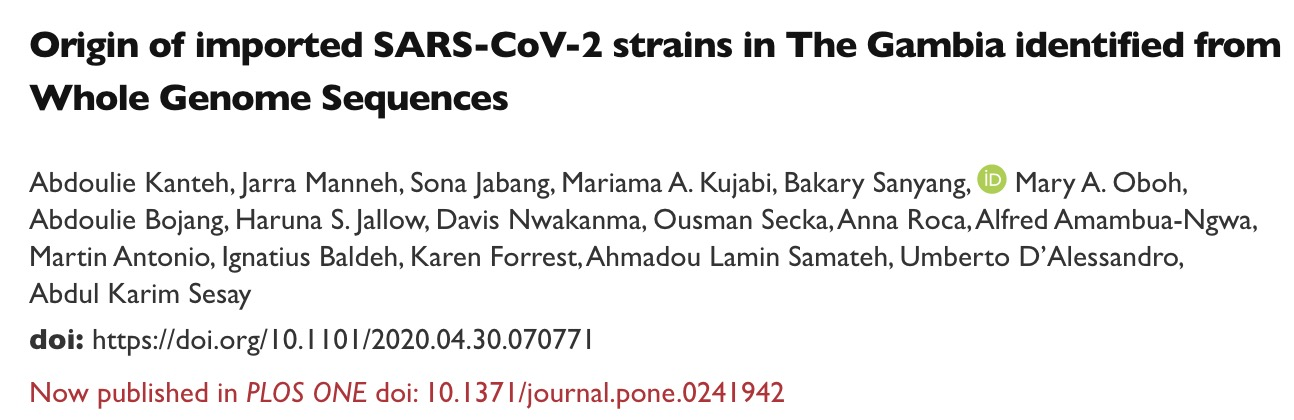

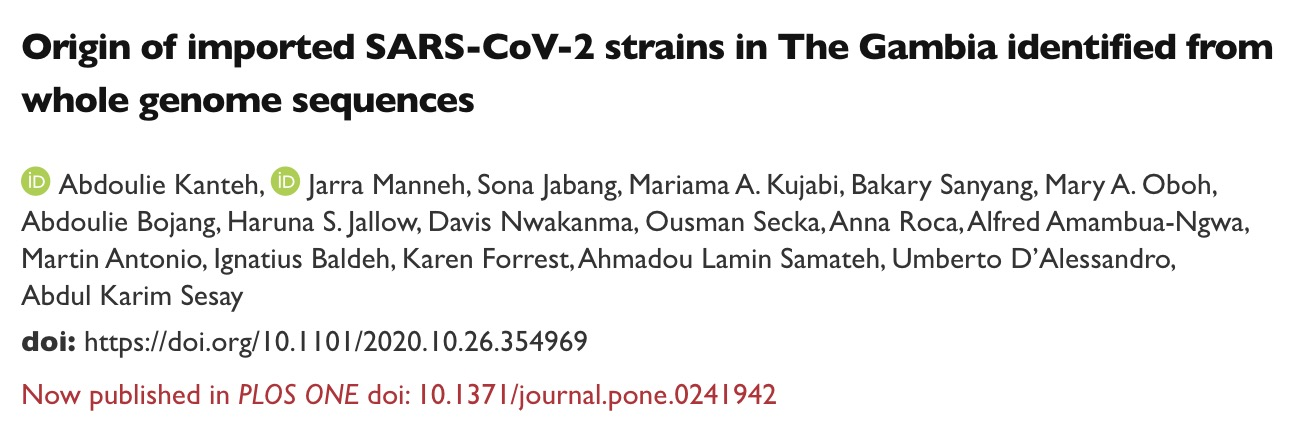

Let's drop the latter  (preprint_doi: 10.1101/2020.10.26.354969)

In [ ]:
condition = ((df_SRA_IDs_whole_4220['preprint_doi'] == '10.1101/2020.10.26.354969') & (df_SRA_IDs_whole_4220['accession'] == 'ERP127101'))
df_SRA_IDs_whole_4220_updated = df_SRA_IDs_whole_4220.drop(df_SRA_IDs_whole_4220[condition].index)
print(len(df_SRA_IDs_whole_4220_updated))

4186


In [ ]:
df_SRA_IDs_whole_4220_updated.to_csv("Whole_4186_SRA_pairs_with_metadata_final.csv")

## Check nan values in the column "Run_ID_published_dates":

In [ ]:
df_SRA_IDs_whole_4220_updated['Run_ID_published_dates'].isna().sum()

7

In [ ]:
df_SRA_IDs_whole_4220_updated['Run_ID_published_dates'].fillna('N/A', inplace=True)
nan_rows = df_SRA_IDs_whole_4220_updated.loc[df_SRA_IDs_whole_4220_updated['Run_ID_published_dates']=='N/A']
nan_rows

Unnamed: 0               preprint_doi                 published_doi  \
200          200             10.1101/112664  10.1371/journal.pbio.2002266   
213          213             10.1101/125203     10.1186/s12864-017-4196-2   
1670        1670  10.1101/2020.07.01.177865       10.1073/pnas.2107238118   
1691        1691  10.1101/2020.07.17.209718  10.1371/journal.pone.0245172   
1846        1846  10.1101/2020.12.01.401174    10.1186/s13059-021-02382-3   
2296        2296             10.1101/255638  10.1371/journal.pone.0198635   
3946        3946  10.1101/2020.12.03.410316     10.3389/fimmu.2021.716606   

     preprint_platform preprint_date published_date    accession  \
200            bioRxiv    2017-03-01     2017-07-27    SRP098585   
213            bioRxiv    2017-04-07     2017-10-18  PRJNA343262   
1670           bioRxiv    2020-07-02     2021-07-23  PRJNA637767   
1691           bioRxiv    2020-07-18     2021-01-14  PRJNA639799   
1846           bioRxiv    2020-12-02     2021-05-25  PRJNA681146   
2296           bioRxiv    2018-01-29     2018-06-06    SRP132627   
3946           bioRxiv    2020-12-03     2021-09-01  PRJNA751471   

                Sharing Scenario Run_ID_published_dates Run_ID_created_dates  \
200       SRA IDs shared in both                    N/A                  NaN   
213       SRA IDs shared in both                    N/A                  NaN   
1670      SRA IDs shared in both                    N/A                  NaN   
1691      SRA IDs shared in both                    N/A                  NaN   
1846      SRA IDs shared in both                    N/A                  NaN   
2296  SRA IDs shared only in pub                    N/A                  NaN   
3946  SRA IDs shared only in pub                    N/A                  NaN   

     Library_Strategy Library_Source                       Scientific_Name  
200           RNA-Seq            NaN                   Hypsibius dujardini  
213               WGS            NaN                            Bos taurus  
1670         AMPLICON            NaN                     marine metagenome  
1691              WGS            NaN  Escherichia coli O157:H7 str. EDL933  
1846            OTHER            NaN                          Homo sapiens  
2296         AMPLICON            NaN                          Homo sapiens  
3946          RNA-Seq            NaN                          Homo sapiens

Sequencing published date were not captured in these 7 studies due to unknown error. Let's drop these 7 studies:

In [ ]:
df_SRA_IDs_whole_4220_updated.drop(nan_rows.index, inplace=True)
print(len(df_SRA_IDs_whole_4220_updated))

4179


In [ ]:
df_SRA_IDs_whole_4220_updated.to_csv("final_identified_4179_SRA_pairs_with_metadata_final.csv")

# Steps for preparation of final analysis

## Pick out the column "SRR_created_dates" and make a new dataframe

In [ ]:
import pandas as pd

df_SRA_IDs_whole_4179 = pd.read_csv("final_identified_4179_SRA_pairs_with_metadata_final.csv")
df_SRA_IDs_whole_4179_with_SRR_created_dates = df_SRA_IDs_whole_4179[['preprint_doi','published_doi','accession','Run_ID_created_dates']]

In [ ]:
df_SRA_IDs_whole_4179_with_SRR_created_dates.to_csv('prepared_SRA_IDs_whole_with_SRR_created_dates.csv')

## Expand the Run ID published dates so that each date is placed into its own cell

In [ ]:
import pandas as pd

df_SRA_IDs_whole_4179_with_SRR_published_dates = pd.read_csv("final_identified_4179_SRA_pairs_with_metadata_final.csv")
df_SRA_IDs_whole_4179_with_SRR_published_dates.drop(columns=['Run_ID_created_dates'],inplace=True)

# Split the columns into lists
df_SRA_IDs_whole_4179_with_SRR_published_dates['Run_ID_published_dates'] = df_SRA_IDs_whole_4179_with_SRR_published_dates['Run_ID_published_dates'].str.split(',')
df_SRA_IDs_whole_4179_with_SRR_published_dates_expanded = df_SRA_IDs_whole_4179_with_SRR_published_dates.explode('Run_ID_published_dates')

In [ ]:
print(len(df_SRA_IDs_whole_4179_with_SRR_published_dates_expanded))

467806


In [ ]:
df_SRA_IDs_whole_4179_with_SRR_published_dates_expanded.head(3)

Unnamed: 0.1  Unnamed: 0    preprint_doi             published_doi  \
0             0           0  10.1101/000422  10.3389/fgene.2014.00013   
1             1           1  10.1101/001370        10.1038/nmeth.3069   
1             1           1  10.1101/001370        10.1038/nmeth.3069   

  preprint_platform preprint_date published_date  accession  \
0           bioRxiv    2013-11-14     2014-01-31  SRR797058   
1           bioRxiv    2013-12-13     2014-08-17  SRX386284   
1           bioRxiv    2013-12-13     2014-08-17  SRX386284   

         Sharing Scenario Run_ID_published_dates Library_Strategy  \
0  SRA IDs shared in both             2013-06-27              NaN   
1  SRA IDs shared in both             2013-12-04         AMPLICON   
1  SRA IDs shared in both             2014-09-15         AMPLICON   

   Library_Source            Scientific_Name  
0  TRANSCRIPTOMIC  Homo sapiens;Mus musculus  
1         GENOMIC               Homo sapiens  
1         GENOMIC               Homo sapiens

In [ ]:
df_SRA_IDs_whole_4179_with_SRR_published_dates_expanded.to_csv('460k_SRA_IDs_expanded.csv')

## Taking apart the whole dataset into separated dataframes

"Whole_4220_SRA_pairs_with_metadata.csv" because it has nearly 490k rows, the maximum processing ability for google colab is 20k rows; thus we need to take the whole datasheet into multiple parts.

In [ ]:
import pandas as pd
import re

df_SRA_ID_whole_expanded = pd.read_csv("460k_SRA_IDs_expanded.csv", index_col=False)
df_SRA_ID_whole_expanded['accession'] = df_SRA_ID_whole_expanded['accession'].astype(str).str.strip()
df_SRA_ID_whole_expanded['accession_before_removing_prefix'] = df_SRA_ID_whole_expanded['accession']

# Define a function that replace any prefix with an empty string
def remove_prefix(accession_IDs):
    prefix_pattern = r'^[A-Z]+(\d+)$'
    match = re.match(prefix_pattern, accession_IDs)
    if match:
       return match.group(1)
    else:
       return 'N/A'

df_SRA_ID_whole_expanded['accession'] = df_SRA_ID_whole_expanded['accession'].apply(remove_prefix)
df_SRA_ID_whole_expanded.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)
df_SRA_ID_whole_expanded.head(3)

Unnamed: 0.2    preprint_doi             published_doi preprint_platform  \
0             0  10.1101/000422  10.3389/fgene.2014.00013           bioRxiv   
1             1  10.1101/001370        10.1038/nmeth.3069           bioRxiv   
2             1  10.1101/001370        10.1038/nmeth.3069           bioRxiv   

  preprint_date published_date accession        Sharing Scenario  \
0    2013-11-14     2014-01-31    797058  SRA IDs shared in both   
1    2013-12-13     2014-08-17    386284  SRA IDs shared in both   
2    2013-12-13     2014-08-17    386284  SRA IDs shared in both   

  Run_ID_published_dates Library_Strategy  Library_Source  \
0             2013-06-27              NaN  TRANSCRIPTOMIC   
1             2013-12-04         AMPLICON         GENOMIC   
2             2014-09-15         AMPLICON         GENOMIC   

             Scientific_Name accession_before_removing_prefix  
0  Homo sapiens;Mus musculus                        SRR797058  
1               Homo sapiens                        SRX386284  
2               Homo sapiens                        SRX386284

In [ ]:
df_SRA_ID_whole_expanded.to_csv("460k_SRA_IDs_expande_drop_accession_prefix.csv")

In [ ]:
import re
import pandas as pd

df_SRA_ID_whole_dropped_prefix = pd.read_csv("460k_SRA_IDs_expande_drop_accession_prefix.csv",index_col=False)

accession_list = df_SRA_ID_whole_dropped_prefix['accession'].tolist()

def process_dataframe(df, accession_list, num_segments=32, base_range=15000):
    results = []
    starting_number_set = [0]

    for j in range(num_segments):
        start_range = base_range + base_range * j
        end_range = start_range + 10000
        print(f"Checking range: {start_range} to {end_range} for j={j}")

        segment_created = False
        for i in range(len(accession_list) - 1):
            if start_range < i < end_range:
                if int(accession_list[i]) != int(accession_list[i + 1]):
                    if j == 0:
                        df_segment = df.iloc[0:i+1]
                    else:
                        df_segment = df.iloc[starting_number_set[-1]:i+1]
                    results.append(df_segment)
                    starting_number_set.append(i + 1)
                    print(f"{j+1} dataframe ends at index {i+1}, {j+2} dataframe starts at {i+2}")
                    segment_created = True
                    break

        if not segment_created:
          if j == num_segments - 1:  # Last segment
             df_segment = df.iloc[starting_number_set[-1]:]
             results.append(df_segment)
             print(f"Final segment added from index {starting_number_set[-1]+1} to end")
          else:
            print(f"No segment created for j={j} within range {start_range} to {end_range}")

    return results

results = process_dataframe(df_SRA_ID_whole_dropped_prefix, accession_list)

Checking range: 15000 to 25000 for j=0
No segment created for j=0 within range 15000 to 25000
Checking range: 30000 to 40000 for j=1
No segment created for j=1 within range 30000 to 40000
Checking range: 45000 to 55000 for j=2
No segment created for j=2 within range 45000 to 55000
Checking range: 60000 to 70000 for j=3
No segment created for j=3 within range 60000 to 70000
Checking range: 75000 to 85000 for j=4
No segment created for j=4 within range 75000 to 85000
Checking range: 90000 to 100000 for j=5
6 dataframe ends at index 90008, 7 dataframe starts at 90009
Checking range: 105000 to 115000 for j=6
7 dataframe ends at index 105008, 8 dataframe starts at 105009
Checking range: 120000 to 130000 for j=7
8 dataframe ends at index 120053, 9 dataframe starts at 120054
Checking range: 135000 to 145000 for j=8
No segment created for j=8 within range 135000 to 145000
Checking range: 150000 to 160000 for j=9
No segment created for j=9 within range 150000 to 160000
Checking range: 165000 to

For those "No segment created for j={j} within range {start_range} to {end_range}", this is because there are two huge dataset:

PRJNA767338 -  54,150 SRR runs


PRJNA218110 -  80,246 SRR runs


ERP127101 -   22,504 SRR runs




In [ ]:
print(len(df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 767338]))
print(len(df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 218110]))
print(len(df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 127101]))

54150
80115
22504


Pick these three studies out:

In [ ]:
PRJNA767338 = df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 767338]
PRJNA767338.drop(columns=['Unnamed: 0'], inplace=True)
PRJNA767338.reset_index(drop=True, inplace=True)
PRJNA767338.to_csv("PRJNA767338.csv")

<ipython-input-29-db34b7c80d9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRJNA767338.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
PRJNA218110 = df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 218110]
PRJNA218110.drop(columns=['Unnamed: 0'], inplace=True)
PRJNA218110.reset_index(drop=True, inplace=True)
PRJNA218110.to_csv("PRJNA218110.csv")

<ipython-input-30-150a70bb7967>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRJNA218110.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
ERP127101 = df_SRA_ID_whole_dropped_prefix[df_SRA_ID_whole_dropped_prefix['accession'] == 127101]
ERP127101.drop(columns=['Unnamed: 0'], inplace=True)
ERP127101.reset_index(drop=True, inplace=True)
ERP127101.to_csv("ERP127101.csv")

<ipython-input-31-787311486500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ERP127101.drop(columns=['Unnamed: 0'], inplace=True)


Drop these two studies in the original dataset:

In [ ]:
df_SRA_ID_whole_dropped_prefix_updated = df_SRA_ID_whole_dropped_prefix.drop(
    df_SRA_ID_whole_dropped_prefix[
        (df_SRA_ID_whole_dropped_prefix['accession'] == 218110) |
        (df_SRA_ID_whole_dropped_prefix['accession'] == 767338) |
        (df_SRA_ID_whole_dropped_prefix['accession'] == 127101)
    ].index
)
print(len(df_SRA_ID_whole_dropped_prefix_updated))

311037


In [ ]:
df_SRA_ID_whole_dropped_prefix_updated.drop(columns=['Unnamed: 0'], inplace=True)
df_SRA_ID_whole_dropped_prefix_updated.to_csv("310k_SRA_IDs_expande_drop_accession_prefix_updated.csv")

## Call the function to take apart the 310k rows of dataframe with sequencing published dates into 21 dataframes

In [ ]:
accession_list_updated = df_SRA_ID_whole_dropped_prefix_updated['accession'].tolist()
results = process_dataframe(df_SRA_ID_whole_dropped_prefix_updated, accession_list_updated, num_segments=21)

Checking range: 15000 to 25000 for j=0
1 dataframe ends at index 15069, 2 dataframe starts at 15070
Checking range: 30000 to 40000 for j=1
2 dataframe ends at index 31676, 3 dataframe starts at 31677
Checking range: 45000 to 55000 for j=2
3 dataframe ends at index 45348, 4 dataframe starts at 45349
Checking range: 60000 to 70000 for j=3
4 dataframe ends at index 64072, 5 dataframe starts at 64073
Checking range: 75000 to 85000 for j=4
5 dataframe ends at index 75975, 6 dataframe starts at 75976
Checking range: 90000 to 100000 for j=5
6 dataframe ends at index 90223, 7 dataframe starts at 90224
Checking range: 105000 to 115000 for j=6
7 dataframe ends at index 105059, 8 dataframe starts at 105060
Checking range: 120000 to 130000 for j=7
8 dataframe ends at index 120404, 9 dataframe starts at 120405
Checking range: 135000 to 145000 for j=8
9 dataframe ends at index 138337, 10 dataframe starts at 138338
Checking range: 150000 to 160000 for j=9
10 dataframe ends at index 150018, 11 datafra

In [ ]:
total_length = sum(len(df) for df in results)
print(f"Total number of rows across all dataframes: {total_length}")

# Save each dataframe to a CSV file
for idx, df in enumerate(results):
    filename = f"dataframe_{idx + 1}.csv"
    df.to_csv(filename, index=False)
    print(f"Saved {filename}")

Total number of rows across all dataframes: 311037
Saved dataframe_1.csv
Saved dataframe_2.csv
Saved dataframe_3.csv
Saved dataframe_4.csv
Saved dataframe_5.csv
Saved dataframe_6.csv
Saved dataframe_7.csv
Saved dataframe_8.csv
Saved dataframe_9.csv
Saved dataframe_10.csv
Saved dataframe_11.csv
Saved dataframe_12.csv
Saved dataframe_13.csv
Saved dataframe_14.csv
Saved dataframe_15.csv
Saved dataframe_16.csv
Saved dataframe_17.csv
Saved dataframe_18.csv
Saved dataframe_19.csv
Saved dataframe_20.csv
Saved dataframe_21.csv


## Define a new function, to take part dataframes of three studies with too many sequencing published dates

PRJNA767338 -  54,150 SRR runs


PRJNA218110 -  80,246 SRR runs


ERP127101 -   22,504 SRR runs

In [ ]:
import pandas as pd

def making_chunks(df):
    df['Run_ID_published_dates'] = df['Run_ID_published_dates'].astype(str).str.strip()
    chunk_counts_total = len(df)//19000
    df_chunks = []

    for q in range(1,chunk_counts_total+1):
       if q == 1:
          df_chunks_1 = df.iloc[0 : 19000*q]
          df_chunks.append(df_chunks_1)
       else:
          df_chunks_middle = df.iloc[19000*(q-1) : 19000*q]
          df_chunks.append(df_chunks_middle)

    if len(df) % 19000 != 0:
        df_chunks_end = df.iloc[19000 * chunk_counts_total :]
        df_chunks.append(df_chunks_end)

    return df_chunks

def save_dataframe(df_chunks, prefix):
    for idx, df in enumerate(df_chunks):
        filename = f"{prefix}_dataframe_{idx + 1}.csv"
        df.to_csv(filename, index=False)
        print(f"Saved {filename}")


PRJNA767338 = pd.read_csv('PRJNA767338.csv')
PRJNA218110 = pd.read_csv('PRJNA218110.csv')
ERP127101 = pd.read_csv('ERP127101.csv')

dataframes = {
    "PRJNA767338": PRJNA767338,
    "PRJNA218110": PRJNA218110,
    "ERP127101": ERP127101
}

for prefix, df in dataframes.items():
    chunks = making_chunks(df)
    save_dataframe(chunks, prefix)

Saved PRJNA767338_dataframe_1.csv
Saved PRJNA767338_dataframe_2.csv
Saved PRJNA767338_dataframe_3.csv
Saved PRJNA218110_dataframe_1.csv
Saved PRJNA218110_dataframe_2.csv
Saved PRJNA218110_dataframe_3.csv
Saved PRJNA218110_dataframe_4.csv
Saved PRJNA218110_dataframe_5.csv
Saved ERP127101_dataframe_1.csv
Saved ERP127101_dataframe_2.csv


# Calculate how many different dates are there when author choose to upload their sequencing data:

### We are going to process 21 dataframes for 310k published dates at one time:

In [ ]:
from ast import And
import pandas as pd
from datetime import datetime

def process_dataframe(df):
    # Convert the column "accession" in the dataframe to list
    gse_founds = df['accession'].tolist()
    # Convert the column "Run_ID_published_dates" in the dataframe to list
    srr_dates = df['Run_ID_published_dates'].tolist()
    # Make sure the column SRR_dates is string rather than the float
    df['Run_ID_published_dates'] = df['Run_ID_published_dates'].astype(str).str.strip()

    # The following section checks for one GSE IDs having how many duplicates
    # This line defines a function named find_the_number_of_same_GSE_IDs that takes one parameter, same_GSE_IDs, which is expected to be a list.
    def find_the_number_of_same_GSE_IDs(same_GSE_IDs):
        # Initializes an empty list duplicate_gses to store the counts of consecutive duplicates
        duplicate_gses = []
        # Initializes a counter i to 0. This counter will track the number of consecutive duplicates
        i = 0
        # Iterate over the list while avoiding an index out of range error
        for count_gse in range(len(same_GSE_IDs) - 1):
            # This line checks if the current element (same_GSE_IDs[count_gse]) is the same as the next element (same_GSE_IDs[count_gse + 1])
            if same_GSE_IDs[count_gse] == same_GSE_IDs[count_gse + 1]:
               i += 1
            else:
                # Append the count of consecutive elements and reset i
                duplicate_gses.append(i + 1)
                # The counter i is reset to 0 for the next set of consecutive duplicates
                i = 0
        # After the loop, the function appends the count for the last set of duplicates to duplicate_gses.
        duplicate_gses.append(i + 1)
        return duplicate_gses

    # This defines a function named sort_dates that takes one argument, dates_list, which is expected to be a list of date strings.
    def sort_dates(dates_list):
        # Convert string dates to datetime objects
        dates = [datetime.strptime(date.strip(), '%Y-%m-%d') for date in dates_list]
        # Sort the datetime objects
        sorted_dates = sorted(dates)
        # Convert the datetime objects back to strings
        sorted_dates_str = [date.strftime('%m/%d/%Y') for date in sorted_dates]
        return sorted_dates_str

    # Call the function with gse_founds and print the results
    chunks = find_the_number_of_same_GSE_IDs(gse_founds)
    # Initialize a counter k
    k = 0
    # for exapmle: [7, 10, 22, 7, 1, 30, 17, 10, 12, 94]
    print(chunks)
    # Initialize a dictionary to store
    date_counts = {}
    # Iterate over all the items in the list-chunks
    for chunk in chunks:
        # Splicing, starting from k = 0, the first splicing is gse_founds[0:0+7]
        gse_chunks = gse_founds[k:k+chunk]
        srr_dates_chunks = srr_dates[k:k+chunk]
        # Convert and sort the dates within the chunk
        sorted_dates = sort_dates(srr_dates_chunks)
        # Print the sorted dates for this chunk
        print(sorted_dates)

        # Handle the case where there's only one date in sorted_dates
        if len(sorted_dates) == 1:
           # The count of date equals to 1
           x = 1
           list_for_only_one = [sorted_dates[0]]
           print(x)
           print(list_for_only_one)
           # The index of the only item in the list-sorted_dates is 0 and the count is 1, store this value to the dictionary: date_counts
           date_counts[sorted_dates[0]] = 1
           print(date_counts)

        # Process only if there are more than one date
        else:
           # Initialize two counter x and z
           x = 0
           z = 0
           # Initialize three dictionaries to store the value
           date_counts1 = {}
           date_counts2 = {}
           date_counts3 = {}
           date_counts4 = {}

           if sorted_dates[-1] != sorted_dates[-2]:
              date_counts3[sorted_dates[-1]] = 1

           # Iterate over list "sorted_dates", "item" is actually a loop counter variable
           for item in range(len(sorted_dates)-1):
               # If the first date(sorted_dates[item]) within the list-sorted_dates equals to the following date(sorted_dates[item + 1])
               if sorted_dates[item] == sorted_dates[item + 1]:
                  # x increment by 1
                  x += 1
                  # z represents at the current stage how many dates are equal in total
                  z = x + 1
                  print(z)
                  print([sorted_dates[item]])
                  # The purpose of this line is to create or update an entry in the dictionary date_counts1-
                  # -where each key is a unique date and each value is the count of how many times that date appears consecutively in sorted_dates
                  date_counts1[sorted_dates[item]] = z

               # If the first date(sorted_dates[item]) within the list-sorted_dates does not equal to the following date(sorted_dates[item + 1])
               else:
                    # The purpose of this check is to specifically identify and process the first date in the list when it doesn't have a duplicate following it
                    if sorted_dates[item] == sorted_dates[0] or sorted_dates[item] != sorted_dates[item - 1]:
                       # Then the total count for the first date which is different with others is 1
                       print(sorted_dates[item])
                       # This line updates or creates an entry in the dictionary date_counts2, setting the value for the key (which is the current date) to 1
                       date_counts2[sorted_dates[item]] = 1

                    else:
                        if sorted_dates[item] == sorted_dates[item - 1]:
                           print(1)
                           print([sorted_dates[item + 1]])
                    x = 0
                    z = 0
           # Combine all dictionaries
           date_counts4={**date_counts2, **date_counts1, **date_counts3}
           print(date_counts4)

           # Store the date counts in the DataFrame
           for q in range(k, k + chunk):
               df.at[q, 'statistics'] = str(date_counts)
               df.at[q, 'statistics'] = str(date_counts4)

        # The next splicing starts from the line k+chunk
        k += chunk
    return df


dataframes = {}

for n in range(1, 22):
    df_name = f"df_{n}"
    dataframes[df_name] = pd.read_csv(f"dataframe_{n}.csv", index_col=False)

dataframes_after_processing_Run_ID_publisheddates = {}

for df_name, df_item in dataframes.items():
    dataframes_after_processing_Run_ID_publisheddates[df_name] = process_dataframe(df_item)

流式输出内容被截断，只能显示最后 5000 行内容。
['10/21/2020']
187
['10/21/2020']
188
['10/21/2020']
189
['10/21/2020']
190
['10/21/2020']
191
['10/21/2020']
192
['10/21/2020']
193
['10/21/2020']
194
['10/21/2020']
195
['10/21/2020']
196
['10/21/2020']
197
['10/21/2020']
198
['10/21/2020']
199
['10/21/2020']
200
['10/21/2020']
201
['10/21/2020']
202
['10/21/2020']
203
['10/21/2020']
204
['10/21/2020']
205
['10/21/2020']
206
['10/21/2020']
207
['10/21/2020']
208
['10/21/2020']
209
['10/21/2020']
210
['10/21/2020']
211
['10/21/2020']
212
['10/21/2020']
213
['10/21/2020']
214
['10/21/2020']
215
['10/21/2020']
216
['10/21/2020']
217
['10/21/2020']
218
['10/21/2020']
219
['10/21/2020']
220
['10/21/2020']
221
['10/21/2020']
222
['10/21/2020']
223
['10/21/2020']
224
['10/21/2020']
225
['10/21/2020']
226
['10/21/2020']
227
['10/21/2020']
228
['10/21/2020']
229
['10/21/2020']
230
['10/21/2020']
231
['10/21/2020']
232
['10/21/2020']
233
['10/21/2020']
234
['10/21/2020']
235
['10/21/2020']
236
['10/21/2020']
237
['10

In [ ]:
dataframes

{'df_1':        Unnamed: 0.2    preprint_doi              published_doi  \
 0                 0  10.1101/000422   10.3389/fgene.2014.00013   
 1                 1  10.1101/001370         10.1038/nmeth.3069   
 2                 1  10.1101/001370         10.1038/nmeth.3069   
 3                 1  10.1101/001370         10.1038/nmeth.3069   
 4                 2  10.1101/003202         10.1093/hmg/ddu359   
 ...             ...             ...                        ...   
 15064           272  10.1101/185694  10.1038/s41559-017-0403-4   
 15065           272  10.1101/185694  10.1038/s41559-017-0403-4   
 15066           272  10.1101/185694  10.1038/s41559-017-0403-4   
 15067           272  10.1101/185694  10.1038/s41559-017-0403-4   
 15068           272  10.1101/185694  10.1038/s41559-017-0403-4   
 
       preprint_platform preprint_date published_date  accession  \
 0               bioRxiv    2013-11-14     2014-01-31     797058   
 1               bioRxiv    2013-12-13     2014-08

In [ ]:
for df_name, df in dataframes_after_processing_Run_ID_publisheddates.items():
    print(df)

       Unnamed: 0.2    preprint_doi              published_doi  \
0                 0  10.1101/000422   10.3389/fgene.2014.00013   
1                 1  10.1101/001370         10.1038/nmeth.3069   
2                 1  10.1101/001370         10.1038/nmeth.3069   
3                 1  10.1101/001370         10.1038/nmeth.3069   
4                 2  10.1101/003202         10.1093/hmg/ddu359   
...             ...             ...                        ...   
15064           272  10.1101/185694  10.1038/s41559-017-0403-4   
15065           272  10.1101/185694  10.1038/s41559-017-0403-4   
15066           272  10.1101/185694  10.1038/s41559-017-0403-4   
15067           272  10.1101/185694  10.1038/s41559-017-0403-4   
15068           272  10.1101/185694  10.1038/s41559-017-0403-4   

      preprint_platform preprint_date published_date  accession  \
0               bioRxiv    2013-11-14     2014-01-31     797058   
1               bioRxiv    2013-12-13     2014-08-17     386284   
2     

In [ ]:
dropped_dataframes = {}

def drop_duplicated_columns(df):
    df_dropped = df.drop_duplicates(subset=['preprint_doi','published_doi','accession','statistics'])
    print(len(df_dropped))
    return df_dropped

for df_name, df in dataframes_after_processing_Run_ID_publisheddates.items():
    dropped_dataframes[df_name] = drop_duplicated_columns(df)

272
140
133
122
168
128
226
227
116
155
162
51
53
506
176
312
139
331
246
251
262


In [ ]:
After_processed_whole = pd.concat(dropped_dataframes)
print(len(After_processed_whole))

4176


Deal with "nan" values in the "statistics" column

In [ ]:
After_processed_whole = After_processed_whole.fillna("N/A")
nan_values = After_processed_whole.loc[After_processed_whole['statistics']=='N/A']
nan_values

Unnamed: 0.2               preprint_doi  \
df_1  0                 0             10.1101/000422   
      20                4             10.1101/006221   
      417              16             10.1101/010116   
      477              25             10.1101/020420   
      507              28             10.1101/021154   
...                   ...                        ...   
df_21 9370           4157  10.1101/2021.03.10.434690   
      9371           4158  10.1101/2021.03.10.434690   
      10708          4172             10.1101/058842   
      10709          4173             10.1101/058842   
      10710          4174             10.1101/058842   

                            published_doi preprint_platform preprint_date  \
df_1  0          10.3389/fgene.2014.00013           bioRxiv    2013-11-14   
      20            10.1101/gr.175893.114           bioRxiv    2014-06-11   
      417       10.1186/s13742-015-0046-9           bioRxiv    2014-10-08   
      477       10.1186/s13073-015-0220-9           bioRxiv    2015-06-03   
      507    10.1371/journal.pbio.1002210           bioRxiv    2015-06-18   
...                                   ...               ...           ...   
df_21 9370           10.1128/mra.01064-21           bioRxiv    2021-03-10   
      9371           10.1128/mra.01064-21           bioRxiv    2021-03-10   
      10708           10.1038/ncomms14403           bioRxiv    2016-06-14   
      10709           10.1038/ncomms14403           bioRxiv    2016-06-14   
      10710           10.1038/ncomms14403           bioRxiv    2016-06-14   

            published_date  accession            Sharing Scenario  \
df_1  0         2014-01-31     797058      SRA IDs shared in both   
      20        2014-10-07     514738      SRA IDs shared in both   
      417       2015-02-01     942391      SRA IDs shared in both   
      477       2015-09-29      57418      SRA IDs shared in both   
      507       2015-07-14    1914484      SRA IDs shared in both   
...                    ...        ...                         ...   
df_21 9370      2022-02-17    5639598  SRA IDs shared only in pub   
      9371      2022-02-17    5639597  SRA IDs shared only in pub   
      10708     2017-02-06    1450028  SRA IDs shared only in pub   
      10709     2017-02-06    1450027  SRA IDs shared only in pub   
      10710     2017-02-06    1450026  SRA IDs shared only in pub   

            Run_ID_published_dates Library_Strategy      Library_Source  \
df_1  0                 2013-06-27              N/A      TRANSCRIPTOMIC   
      20                2014-09-30            OTHER      TRANSCRIPTOMIC   
      417               2015-07-22          RNA-Seq      TRANSCRIPTOMIC   
      477               2016-03-09          RNA-Seq         METAGENOMIC   
      507               2015-09-12        miRNA-Seq  METATRANSCRIPTOMIC   
...                            ...              ...                 ...   
df_21 9370              2021-11-27              WGS             GENOMIC   
      9371              2021-11-27              WGS             GENOMIC   
      10708             2016-06-17              WGS             GENOMIC   
      10709             2016-06-17              WGS             GENOMIC   
      10710             2016-06-17              WGS             GENOMIC   

                       Scientific_Name accession_before_removing_prefix  \
df_1  0      Homo sapiens;Mus musculus                        SRR797058   
      20      Saccharomyces cerevisiae                        SRS514738   
      417         Vaccinium corymbosum                        SRR942391   
      477                Hepacivirus C                        SRP057418   
      507            insect metagenome                       SRR1914484   
...                                ...                              ...   
df_21 9370      Plantibacter cousiniae                       ERS5639598   
      9371      Plantibacter cousiniae                       ERS5639597   
      1070

In [ ]:
if not nan_values.empty:
    for index,row in nan_values.iterrows():
        SRR_date = row['Run_ID_published_dates']
        After_processed_whole.at[index, 'statistics'] = f"{{'{SRR_date}': 1}}"
After_processed_whole

Unnamed: 0.2               preprint_doi  \
df_1  0                 0             10.1101/000422   
      1                 1             10.1101/001370   
      4                 2             10.1101/003202   
      12                3             10.1101/005611   
      20                4             10.1101/006221   
...                   ...                        ...   
df_21 10710          4174             10.1101/058842   
      10711          4175             10.1101/359521   
      10717          4176             10.1101/870352   
      10877          4177  10.1101/2021.03.16.435730   
      10889          4178             10.1101/058842   

                            published_doi preprint_platform preprint_date  \
df_1  0          10.3389/fgene.2014.00013           bioRxiv    2013-11-14   
      1                10.1038/nmeth.3069           bioRxiv    2013-12-13   
      4                10.1093/hmg/ddu359           bioRxiv    2014-03-05   
      12     10.1371/journal.pone.0103207           bioRxiv    2014-05-28   
      20            10.1101/gr.175893.114           bioRxiv    2014-06-11   
...                                   ...               ...           ...   
df_21 10710           10.1038/ncomms14403           bioRxiv    2016-06-14   
      10711     10.1038/s41556-019-0272-y           bioRxiv    2018-07-03   
      10717    10.1038/s41467-021-22639-6           bioRxiv    2019-12-10   
      10877           10.7554/eLife.70207           bioRxiv    2021-03-17   
      10889           10.1038/ncomms14403           bioRxiv    2016-06-14   

            published_date  accession            Sharing Scenario  \
df_1  0         2014-01-31     797058      SRA IDs shared in both   
      1         2014-08-17     386284      SRA IDs shared in both   
      4         2014-07-11     261116      SRA IDs shared in both   
      12        2014-08-13     516577      SRA IDs shared in both   
      20        2014-10-07     514738      SRA IDs shared in both   
...                    ...        ...                         ...   
df_21 10710     2017-02-06    1450026  SRA IDs shared only in pub   
      10711     2019-02-11     507245  SRA IDs shared only in pub   
      10717     2021-05-11     635108      SRA IDs shared in both   
      10877     2022-02-04     664644      SRA IDs shared in both   
      10889     2017-02-06      14381      SRA IDs shared in both   

            Run_ID_published_dates Library_Strategy  Library_Source  \
df_1  0                 2013-06-27              N/A  TRANSCRIPTOMIC   
      1                 2013-12-04         AMPLICON         GENOMIC   
      4                 2013-12-21          RNA-Seq  TRANSCRIPTOMIC   
      12                2014-06-03          RNA-Seq  TRANSCRIPTOMIC   
      20                2014-09-30            OTHER  TRANSCRIPTOMIC   
...                            ...              ...             ...   
df_21 10710             2016-06-17              WGS         GENOMIC   
      10711             2019-12-27          RNA-Seq  TRANSCRIPTOMIC   
      10717             2020-05-26    Bisulfite-Seq         GENOMIC   
      10877             2020-09-21          RNA-Seq  TRANSCRIPTOMIC   
      10889             2016-06-17              WGS         GENOMIC   

                       Scientific_Name accession_before_removing_prefix  \
df_1  0      Homo sapiens;Mus musculus                        SRR797058   
      1                   Homo sapiens                        SRX386284   
      4              Rattus norvegicus                        ERA261116   
      12                  Mus musculus                        SRX516577   
      20      Saccharomyces cerevisiae                        SRS514738   
...                                ...                              ...   
df_21 10710      Staphylococcus aureus                       ERR1450026   
      10711               Homo sapiens                      PRJNA507245   
      10717               Homo sapiens                    

In [ ]:
After_processed_whole.to_csv("final_4176_SRA_IDs_with_metadata.csv")

### Now, let's deal with those dataframes that were taken apart from three big datasets ( PRJNA767338, PRJNA218110, ERP127101 )

In [ ]:
dataframes2 = {}

for n in range(1, 3):
    df_name1 = f"ERP127101_df_{n}"
    dataframes2[df_name1] = pd.read_csv(f"ERP127101_dataframe_{n}.csv", index_col=False)

for n in range(1, 4):
    df_name2 = f"PRJNA767338_df_{n}"
    dataframes2[df_name2] = pd.read_csv(f"PRJNA767338_dataframe_{n}.csv", index_col=False)

for n in range(1, 6):
    df_name3 = f"PRJNA218110_df_{n}"
    dataframes2[df_name3] = pd.read_csv(f"PRJNA218110_dataframe_{n}.csv", index_col=False)

dataframes2

{'ERP127101_df_1':        Unnamed: 0  Unnamed: 0.2               preprint_doi  \
 0               0          3888  10.1101/2020.04.30.070771   
 1               1          3888  10.1101/2020.04.30.070771   
 2               2          3888  10.1101/2020.04.30.070771   
 3               3          3888  10.1101/2020.04.30.070771   
 4               4          3888  10.1101/2020.04.30.070771   
 ...           ...           ...                        ...   
 18995       18995          3888  10.1101/2020.04.30.070771   
 18996       18996          3888  10.1101/2020.04.30.070771   
 18997       18997          3888  10.1101/2020.04.30.070771   
 18998       18998          3888  10.1101/2020.04.30.070771   
 18999       18999          3888  10.1101/2020.04.30.070771   
 
                       published_doi preprint_platform preprint_date  \
 0      10.1371/journal.pone.0241942           bioRxiv    2020-04-30   
 1      10.1371/journal.pone.0241942           bioRxiv    2020-04-30   
 2      

In [ ]:
dataframes_after_processing_Run_ID_publisheddates2 = {}

for df_name, df_item in dataframes2.items():
    dataframes_after_processing_Run_ID_publisheddates2[df_name] = process_dataframe(df_item)

流式输出内容被截断，只能显示最后 5000 行内容。
139
['09/22/2015']
140
['09/22/2015']
141
['09/22/2015']
142
['09/22/2015']
143
['09/22/2015']
144
['09/22/2015']
145
['09/22/2015']
146
['09/22/2015']
147
['09/22/2015']
148
['09/22/2015']
149
['09/22/2015']
150
['09/22/2015']
151
['09/22/2015']
152
['09/22/2015']
153
['09/22/2015']
154
['09/22/2015']
155
['09/22/2015']
156
['09/22/2015']
157
['09/22/2015']
158
['09/22/2015']
159
['09/22/2015']
160
['09/22/2015']
161
['09/22/2015']
162
['09/22/2015']
163
['09/22/2015']
164
['09/22/2015']
165
['09/22/2015']
166
['09/22/2015']
167
['09/22/2015']
168
['09/22/2015']
169
['09/22/2015']
170
['09/22/2015']
171
['09/22/2015']
172
['09/22/2015']
173
['09/22/2015']
174
['09/22/2015']
175
['09/22/2015']
176
['09/22/2015']
177
['09/22/2015']
178
['09/22/2015']
179
['09/22/2015']
180
['09/22/2015']
181
['09/22/2015']
182
['09/22/2015']
183
['09/22/2015']
184
['09/22/2015']
185
['09/22/2015']
186
['09/22/2015']
187
['09/22/2015']
188
['09/22/2015']
189
['09/22/2015']
190


In [ ]:
dataframes_after_processing_Run_ID_publisheddates2

{'ERP127101_df_1':        Unnamed: 0  Unnamed: 0.2               preprint_doi  \
 0               0          3888  10.1101/2020.04.30.070771   
 1               1          3888  10.1101/2020.04.30.070771   
 2               2          3888  10.1101/2020.04.30.070771   
 3               3          3888  10.1101/2020.04.30.070771   
 4               4          3888  10.1101/2020.04.30.070771   
 ...           ...           ...                        ...   
 18995       18995          3888  10.1101/2020.04.30.070771   
 18996       18996          3888  10.1101/2020.04.30.070771   
 18997       18997          3888  10.1101/2020.04.30.070771   
 18998       18998          3888  10.1101/2020.04.30.070771   
 18999       18999          3888  10.1101/2020.04.30.070771   
 
                       published_doi preprint_platform preprint_date  \
 0      10.1371/journal.pone.0241942           bioRxiv    2020-04-30   
 1      10.1371/journal.pone.0241942           bioRxiv    2020-04-30   
 2      

In [ ]:
dropped_dataframes2 = {}

def drop_duplicated_columns(df):
    df_dropped = df.drop_duplicates(subset=['preprint_doi','published_doi','accession','statistics'])
    print(len(df_dropped))
    return df_dropped

for df_name, df in dataframes_after_processing_Run_ID_publisheddates2.items():
    dropped_dataframes2[df_name] = drop_duplicated_columns(df)

1
1
1
1
1
1
1
1
1
1


In [ ]:
three_large_datasets_after_processed = pd.concat(dropped_dataframes2)
print(len(three_large_datasets_after_processed))

10


In [ ]:
three_large_datasets_after_processed

Unnamed: 0  Unnamed: 0.2               preprint_doi  \
ERP127101_df_1   0           0          3888  10.1101/2020.04.30.070771   
ERP127101_df_2   0       19000          3888  10.1101/2020.04.30.070771   
PRJNA767338_df_1 0           0           558  10.1101/2021.09.27.461949   
PRJNA767338_df_2 0       19000           558  10.1101/2021.09.27.461949   
PRJNA767338_df_3 0       38000           558  10.1101/2021.09.27.461949   
PRJNA218110_df_1 0           0            89             10.1101/041327   
PRJNA218110_df_2 0       19000            89             10.1101/041327   
PRJNA218110_df_3 0       38000            89             10.1101/041327   
PRJNA218110_df_4 0       57000            89             10.1101/041327   
PRJNA218110_df_5 0       76000            89             10.1101/041327   

                                   published_doi preprint_platform  \
ERP127101_df_1   0  10.1371/journal.pone.0241942           bioRxiv   
ERP127101_df_2   0  10.1371/journal.pone.0241942           bioRxiv   
PRJNA767338_df_1 0     10.1128/Spectrum.01803-21           bioRxiv   
PRJNA767338_df_2 0     10.1128/Spectrum.01803-21           bioRxiv   
PRJNA767338_df_3 0     10.1128/Spectrum.01803-21           bioRxiv   
PRJNA218110_df_1 0  10.1371/journal.pmed.1002055           bioRxiv   
PRJNA218110_df_2 0  10.1371/journal.pmed.1002055           bioRxiv   
PRJNA218110_df_3 0  10.1371/journal.pmed.1002055           bioRxiv   
PRJNA218110_df_4 0  10.1371/journal.pmed.1002055           bioRxiv   
PRJNA218110_df_5 0  10.1371/journal.pmed.1002055           bioRxiv   

                   preprint_date published_date  accession  \
ERP127101_df_1   0    2020-04-30     2021-08-31     127101   
ERP127101_df_2   0    2020-04-30     2021-08-31     127101   
PRJNA767338_df_1 0    2021-09-28     2021-12-08     767338   
PRJNA767338_df_2 0    2021-09-28     2021-12-08     767338   
PRJNA767338_df_3 0    2021-09-28     2021-12-08     767338   
PRJNA218110_df_1 0    2016-02-25     2016-08-02     218110   
PRJNA218110_df_2 0    2016-02-25     2016-08-02     218110   
PRJNA218110_df_3 0    2016-02-25     2016-08-02     218110   
PRJNA218110_df_4 0    2016-02-25     2016-08-02     218110   
PRJNA218110_df_5 0    2016-02-25     2016-08-02     218110   

                              Sharing Scenario Run_ID_published_dates  \
ERP127101_df_1   0  SRA IDs shared only in pub             2021-12-02   
ERP127101_df_2   0  SRA IDs shared only in pub             2021-04-23   
PRJNA767338_df_1 0      SRA IDs shared in both             2023-11-01   
PRJNA767338_df_2 0      SRA IDs shared in both             2023-11-01   
PRJNA767338_df_3 0      SRA IDs shared in both             2022-07-01   
PRJNA218110_df_1 0      SRA IDs shared in both             2024-06-13   
PRJNA218110_df_2 0      SRA IDs shared in both             2022-12-29   
PRJNA218110_df_3 0      SRA IDs shared in both             2021-01-20   
PRJNA218110_df_4 0      SRA IDs shared in both             2019-02-14   
PRJNA218110_df_5 0      SRA IDs shared in both             2016-05-19   

                   Library_Strategy Library_Source  \
ERP127101_df_1   0              WGA      VIRAL RNA   
ERP127101_df_2   0              WGA      VIRAL RNA   
PRJNA767338_df_1 0         AMPLICON        GENOMIC   
PRJNA767338_df_2 0         AMPLICON        GENOMIC   
PRJNA767338_df_3 0         AMPLICON        GENOMIC   
PRJNA218110_df_1 0              WGS        GENOMIC   
PRJNA218110_df_2 0              WGS        GENOMIC   
PRJNA218110_df_3 0              WGS        GENOMIC   
PRJNA218110_df_4 0              WGS        GENOMIC   
PRJNA218110_df_5 0              WGS        GENOMIC   

                                                    Scientific_Name  \
ERP127101_df_1   0  Severe acute respiratory syndrome coronavirus 2   
ERP127101_df_2   0  Severe acute respiratory syndrome coronavirus 2   
PRJNA767338_df_1 0  Severe acute respiratory syndrome coronavirus 2   
PRJNA767338_df_2 0  Severe acute respiratory syndrome cor

In [ ]:
three_large_datasets_after_processed.to_csv("three_large_datasets_with_analyzed_published_dates.csv")

In [ ]:
import pandas as pd

three_large_datasets_after_processed_updated = pd.read_csv("three_large_datasets_with_analyzed_published_dates.csv", index_col=False)
columns_to_drop = ['Unnamed: 1', 'Unnamed: 0', 'Unnamed: 0.2', 'Run_ID_published_dates']

three_large_datasets_after_processed_updated.drop(columns_to_drop, axis=1, inplace=True)

def merge_statistics(group):
    result = {
        'statistics': ', '.join(group['statistics'])
    }
    for col_name in group.columns:
        if col_name != 'statistics' and col_name != 'accession':
            result[col_name] = group[col_name].iloc[0]
    return pd.Series(result)

merged_df = three_large_datasets_after_processed_updated.groupby('accession').apply(merge_statistics).reset_index()
merged_df.head(3)

accession                                         statistics  \
0     127101  {'04/23/2021': 300, '05/24/2021': 1, '06/02/20...   
1     218110  {'04/19/2019': 1, '03/12/2023': 1, '03/15/2023...   
2     767338  {'11/01/2023': 19000}, {'07/01/2022': 6743, '0...   

       Unnamed: 0.1               preprint_doi                 published_doi  \
0    ERP127101_df_1  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942   
1  PRJNA218110_df_1             10.1101/041327  10.1371/journal.pmed.1002055   
2  PRJNA767338_df_1  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21   

  preprint_platform preprint_date published_date            Sharing Scenario  \
0           bioRxiv    2020-04-30     2021-08-31  SRA IDs shared only in pub   
1           bioRxiv    2016-02-25     2016-08-02      SRA IDs shared in both   
2           bioRxiv    2021-09-28     2021-12-08      SRA IDs shared in both   

  Library_Strategy Library_Source  \
0              WGA      VIRAL RNA   
1              WGS        GENOMIC   
2         AMPLICON        GENOMIC   

                                   Scientific_Name  \
0  Severe acute respiratory syndrome coronavirus 2   
1                                 Escherichia coli   
2  Severe acute respiratory syndrome coronavirus 2   

  accession_before_removing_prefix  
0                        ERP127101  
1                      PRJNA218110  
2                      PRJNA767338

In [ ]:
merged_df.loc[0, 'accession'] = 'ERP127101'
merged_df.loc[1, 'accession'] = 'PRJNA218110'
merged_df.loc[2, 'accession'] = 'PRJNA767338'

merged_df.drop(columns=['Unnamed: 0.1'], inplace=True)

In [ ]:
merged_df

accession                                         statistics  \
0    ERP127101  {'04/23/2021': 300, '05/24/2021': 1, '06/02/20...   
1  PRJNA218110  {'04/19/2019': 1, '03/12/2023': 1, '03/15/2023...   
2  PRJNA767338  {'11/01/2023': 19000}, {'07/01/2022': 6743, '0...   

                preprint_doi                 published_doi preprint_platform  \
0  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942           bioRxiv   
1             10.1101/041327  10.1371/journal.pmed.1002055           bioRxiv   
2  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21           bioRxiv   

  preprint_date published_date            Sharing Scenario Library_Strategy  \
0    2020-04-30     2021-08-31  SRA IDs shared only in pub              WGA   
1    2016-02-25     2016-08-02      SRA IDs shared in both              WGS   
2    2021-09-28     2021-12-08      SRA IDs shared in both         AMPLICON   

  Library_Source                                  Scientific_Name  \
0      VIRAL RNA  Severe acute respiratory syndrome coronavirus 2   
1        GENOMIC                                 Escherichia coli   
2        GENOMIC  Severe acute respiratory syndrome coronavirus 2   

  accession_before_removing_prefix  
0                        ERP127101  
1                      PRJNA218110  
2                      PRJNA767338

In [ ]:
new_sequence = [merged_df.columns[2], merged_df.columns[3], merged_df.columns[0], merged_df.columns[4], merged_df.columns[5], merged_df.columns[6], merged_df.columns[7], merged_df.columns[8], merged_df.columns[9], merged_df.columns[10], merged_df.columns[1]]
merged_df_new = merged_df[new_sequence]
merged_df_new.head(3)

preprint_doi                 published_doi    accession  \
0  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
1             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
2  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

  preprint_platform preprint_date published_date            Sharing Scenario  \
0           bioRxiv    2020-04-30     2021-08-31  SRA IDs shared only in pub   
1           bioRxiv    2016-02-25     2016-08-02      SRA IDs shared in both   
2           bioRxiv    2021-09-28     2021-12-08      SRA IDs shared in both   

  Library_Strategy Library_Source  \
0              WGA      VIRAL RNA   
1              WGS        GENOMIC   
2         AMPLICON        GENOMIC   

                                   Scientific_Name  \
0  Severe acute respiratory syndrome coronavirus 2   
1                                 Escherichia coli   
2  Severe acute respiratory syndrome coronavirus 2   

                                          statistics  
0  {'04/23/2021': 300, '05/24/2021': 1, '06/02/20...  
1  {'04/19/2019': 1, '03/12/2023': 1, '03/15/2023...  
2  {'11/01/2023': 19000}, {'07/01/2022': 6743, '0...

Merge dictionaries in the "statistics" column together based on the same study:

In [ ]:
import ast

def merge_dicts_function(dict_list):
    merged_dict = {}
    for each_group in dict_list:
        for key, value in each_group.items():
             merged_dict[key] =  value
    return merged_dict

# Convert string representations of dictionaries to actual dictionaries
merged_df_new['statistics'] = merged_df_new['statistics'].apply(ast.literal_eval)

merged_df_new['merged_statistics'] = merged_df_new['statistics'].apply(merge_dicts_function)

<ipython-input-77-395ab3d50c9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_new['statistics'] = merged_df_new['statistics'].apply(ast.literal_eval)


Sort dates from earliest to the latest

In [ ]:
from datetime import datetime

def sort_unsequenced_dates(dict_list):
    # Convert the dictionary items to a list of tuples
    items = list(dict_list.items())
    # Sort the list of tuples based on the date
    sorted_items = sorted(items, key=lambda x: datetime.strptime(x[0], '%m/%d/%Y'))

    # Convert the sorted list of tuples back to a dictionary
    sorted_dict = {date: count for date, count in sorted_items}

    return sorted_dict


merged_df_new['merged_statistics'] = merged_df_new['merged_statistics'].apply(sort_unsequenced_dates)

In [ ]:
merged_df_new

preprint_doi                 published_doi    accession  \
0  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
1             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
2  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

  preprint_platform preprint_date published_date            Sharing Scenario  \
0           bioRxiv    2020-04-30     2021-08-31  SRA IDs shared only in pub   
1           bioRxiv    2016-02-25     2016-08-02      SRA IDs shared in both   
2           bioRxiv    2021-09-28     2021-12-08      SRA IDs shared in both   

  Library_Strategy Library_Source  \
0              WGA      VIRAL RNA   
1              WGS        GENOMIC   
2         AMPLICON        GENOMIC   

                                   Scientific_Name  \
0  Severe acute respiratory syndrome coronavirus 2   
1                                 Escherichia coli   
2  Severe acute respiratory syndrome coronavirus 2   

                                          statistics  \
0  ({'04/23/2021': 300, '05/24/2021': 1, '06/02/2...   
1  ({'04/19/2019': 1, '03/12/2023': 1, '03/15/202...   
2  ({'11/01/2023': 19000}, {'07/01/2022': 6743, '...   

                                   merged_statistics  
0  {'03/16/2021': 21, '03/17/2021': 141, '03/24/2...  
1  {'09/10/2014': 7, '09/18/2014': 20, '10/08/201...  
2  {'10/14/2021': 1326, '03/26/2022': 5228, '03/2...

In [ ]:
merged_df_new.drop(columns=['statistics'], inplace=True)

merged_df_new.rename(columns={'merged_statistics': 'statistics'}, inplace=True)

Ensure that the field size limit is sufficient for data. Python's CSV module has a field size limit that may need to increase.



In [ ]:
import csv

# Set a new field size limit
csv.field_size_limit(10000000)

new_limit = csv.field_size_limit()
print(new_limit)

merged_df_new.to_csv("final_processed_three_large_studies.csv",quoting=csv.QUOTE_ALL, encoding='utf-8')

10000000


Make a validation

In [ ]:
print(len(merged_df_new))

3


## Process "final_4176_SRA_IDs_with_metadata.csv"

In [ ]:
import pandas as pd

processing_4176_SRA_IDs = pd.read_csv("final_4176_SRA_IDs_with_metadata.csv", index_col=False,encoding='utf-8')
processing_4176_SRA_IDs.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 0.2', 'Run_ID_published_dates'], inplace=True)
processing_4176_SRA_IDs.rename(columns={'accession': 'accession_removed'}, inplace=True)
processing_4176_SRA_IDs.head(3)

preprint_doi             published_doi preprint_platform preprint_date  \
0  10.1101/000422  10.3389/fgene.2014.00013           bioRxiv    2013-11-14   
1  10.1101/001370        10.1038/nmeth.3069           bioRxiv    2013-12-13   
2  10.1101/003202        10.1093/hmg/ddu359           bioRxiv    2014-03-05   

  published_date  accession_removed        Sharing Scenario Library_Strategy  \
0     2014-01-31             797058  SRA IDs shared in both              NaN   
1     2014-08-17             386284  SRA IDs shared in both         AMPLICON   
2     2014-07-11             261116  SRA IDs shared in both          RNA-Seq   

   Library_Source            Scientific_Name accession_before_removing_prefix  \
0  TRANSCRIPTOMIC  Homo sapiens;Mus musculus                        SRR797058   
1         GENOMIC               Homo sapiens                        SRX386284   
2  TRANSCRIPTOMIC          Rattus norvegicus                        ERA261116   

                           statistics  
0                   {'2013-06-27': 1}  
1  {'12/04/2013': 1, '09/15/2014': 2}  
2                   {'12/21/2013': 8}

In [ ]:
processing_4176_SRA_IDs.drop(columns=['accession_removed'], inplace=True)

In [ ]:
processing_4176_SRA_IDs.rename(columns={'accession_before_removing_prefix': 'accession'}, inplace=True)

In [ ]:
processing_4176_SRA_IDs.head(3)

preprint_doi             published_doi preprint_platform preprint_date  \
0  10.1101/000422  10.3389/fgene.2014.00013           bioRxiv    2013-11-14   
1  10.1101/001370        10.1038/nmeth.3069           bioRxiv    2013-12-13   
2  10.1101/003202        10.1093/hmg/ddu359           bioRxiv    2014-03-05   

  published_date        Sharing Scenario Library_Strategy  Library_Source  \
0     2014-01-31  SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1     2014-08-17  SRA IDs shared in both         AMPLICON         GENOMIC   
2     2014-07-11  SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   

             Scientific_Name  accession                          statistics  
0  Homo sapiens;Mus musculus  SRR797058                   {'2013-06-27': 1}  
1               Homo sapiens  SRX386284  {'12/04/2013': 1, '09/15/2014': 2}  
2          Rattus norvegicus  ERA261116                   {'12/21/2013': 8}

In [ ]:
new_sequence_2 = [processing_4176_SRA_IDs.columns[0],processing_4176_SRA_IDs.columns[1],processing_4176_SRA_IDs.columns[9],processing_4176_SRA_IDs.columns[2],
                  processing_4176_SRA_IDs.columns[3],processing_4176_SRA_IDs.columns[4],processing_4176_SRA_IDs.columns[5],processing_4176_SRA_IDs.columns[6],
                  processing_4176_SRA_IDs.columns[7],processing_4176_SRA_IDs.columns[8],processing_4176_SRA_IDs.columns[10]]
processing_4176_SRA_IDs_with_new_sequence = processing_4176_SRA_IDs[new_sequence_2]
processing_4176_SRA_IDs_with_new_sequence.head(3)

preprint_doi             published_doi  accession preprint_platform  \
0  10.1101/000422  10.3389/fgene.2014.00013  SRR797058           bioRxiv   
1  10.1101/001370        10.1038/nmeth.3069  SRX386284           bioRxiv   
2  10.1101/003202        10.1093/hmg/ddu359  ERA261116           bioRxiv   

  preprint_date published_date        Sharing Scenario Library_Strategy  \
0    2013-11-14     2014-01-31  SRA IDs shared in both              NaN   
1    2013-12-13     2014-08-17  SRA IDs shared in both         AMPLICON   
2    2014-03-05     2014-07-11  SRA IDs shared in both          RNA-Seq   

   Library_Source            Scientific_Name  \
0  TRANSCRIPTOMIC  Homo sapiens;Mus musculus   
1         GENOMIC               Homo sapiens   
2  TRANSCRIPTOMIC          Rattus norvegicus   

                           statistics  
0                   {'2013-06-27': 1}  
1  {'12/04/2013': 1, '09/15/2014': 2}  
2                   {'12/21/2013': 8}

In [ ]:
csv.field_size_limit(10000000)
processing_4176_SRA_IDs_with_new_sequence.to_csv("4176_SRA_IDs_prepared_for_concatenation.csv",quoting=csv.QUOTE_ALL, encoding='utf-8')

## Concatenate 3 pairs separated from previous step with 4,176 pairs

In [ ]:
import pandas as pd

processed_4176_SRA_IDs = pd.read_csv("4176_SRA_IDs_prepared_for_concatenation.csv", index_col=False,encoding='utf-8')
three_large_datasets_after_processed = pd.read_csv("final_processed_three_large_studies.csv", index_col=False)

In [ ]:
processed_4176_SRA_IDs.head(3)

Unnamed: 0    preprint_doi             published_doi  accession  \
0           0  10.1101/000422  10.3389/fgene.2014.00013  SRR797058   
1           1  10.1101/001370        10.1038/nmeth.3069  SRX386284   
2           2  10.1101/003202        10.1093/hmg/ddu359  ERA261116   

  preprint_platform preprint_date published_date        Sharing Scenario  \
0           bioRxiv    2013-11-14     2014-01-31  SRA IDs shared in both   
1           bioRxiv    2013-12-13     2014-08-17  SRA IDs shared in both   
2           bioRxiv    2014-03-05     2014-07-11  SRA IDs shared in both   

  Library_Strategy  Library_Source            Scientific_Name  \
0              NaN  TRANSCRIPTOMIC  Homo sapiens;Mus musculus   
1         AMPLICON         GENOMIC               Homo sapiens   
2          RNA-Seq  TRANSCRIPTOMIC          Rattus norvegicus   

                           statistics  
0                   {'2013-06-27': 1}  
1  {'12/04/2013': 1, '09/15/2014': 2}  
2                   {'12/21/2013': 8}

In [ ]:
three_large_datasets_after_processed.head(3)

Unnamed: 0               preprint_doi                 published_doi  \
0           0  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942   
1           1             10.1101/041327  10.1371/journal.pmed.1002055   
2           2  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21   

     accession preprint_platform preprint_date published_date  \
0    ERP127101           bioRxiv    2020-04-30     2021-08-31   
1  PRJNA218110           bioRxiv    2016-02-25     2016-08-02   
2  PRJNA767338           bioRxiv    2021-09-28     2021-12-08   

             Sharing Scenario Library_Strategy Library_Source  \
0  SRA IDs shared only in pub              WGA      VIRAL RNA   
1      SRA IDs shared in both              WGS        GENOMIC   
2      SRA IDs shared in both         AMPLICON        GENOMIC   

                                   Scientific_Name  \
0  Severe acute respiratory syndrome coronavirus 2   
1                                 Escherichia coli   
2  Severe acute respiratory syndrome coronavirus 2   

                                          statistics  
0  {'03/16/2021': 21, '03/17/2021': 141, '03/24/2...  
1  {'09/10/2014': 7, '09/18/2014': 20, '10/08/201...  
2  {'10/14/2021': 1326, '03/26/2022': 5228, '03/2...

In [ ]:
processed_whole_4179_SRA_IDs = pd.concat([processed_4176_SRA_IDs, three_large_datasets_after_processed])
print(len(processed_whole_4179_SRA_IDs))

4179


In [ ]:
csv.field_size_limit(10000000)
processed_whole_4179_SRA_IDs.to_csv("final_total_4179_SRA_IDs.csv",quoting=csv.QUOTE_ALL, encoding='utf-8')

# Investigate the pattern behind the behavior of uploading sequencing data

### Convert numbers to percentages:

In [ ]:
import pandas as pd
import ast

df_whole_4179 = pd.read_csv("final_total_4179_SRA_IDs.csv", index_col=None, encoding='utf-8')
df_whole_4179.drop(columns=['Unnamed: 0'], inplace=True)
df_whole_4179.rename(columns={'statistics' : "{'SRR_Date' : 'count'}"},inplace=True)
df_whole_4179["{'SRR_Date' : 'count'}"] = df_whole_4179["{'SRR_Date' : 'count'}"].astype(str)

def calculate_rate(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    total_count = sum(dates_counts.values())

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        date, count = next(iter(dates_counts.items()))
        return {date: '100%'}
    # Situation 2: Multiple dates and values
    else:
        rate_dict = {date: f"{count / total_count * 100:.1f}%" for date, count in dates_counts.items()}
        return rate_dict


df_whole_4179["{'SRR_Date' : 'rate'}"] = df_whole_4179.apply(calculate_rate, axis=1)

csv.field_size_limit(10000000)
df_whole_4179.to_csv("final_total_4179_SRA_IDs_with_rate.csv", index=False, quoting=csv.QUOTE_ALL, encoding='utf-8')

### Percentages of sequencing data uploaded on the first day, the last day, and the intermediate days of the uploading session

In [ ]:
import pandas as pd
import ast

df_SRR_rate = pd.read_csv("final_total_4179_SRA_IDs_with_rate.csv",index_col=None, encoding='utf-8')

first_day_values = []
last_day_values = []

first_day_values1 = []
last_day_values1 = []

mid_day_values = []

for i, row in enumerate(df_SRR_rate["{'SRR_Date' : 'rate'}"]):
    dict_row = ast.literal_eval(row)
    if isinstance(dict_row, dict):
        values = list(dict_row.values())

        # Case 1: Only one date
        if len(dict_row) == 1:
            df_SRR_rate.at[i, "Pattern_the_first_day"] = "N/A"
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = "N/A"
            df_SRR_rate.at[i, "Pattern_the_last_day"] = "N/A"

        # Case 2: Two dates
        elif len(dict_row) == 2:
            first_day_values.append(values[0])
            last_day_values.append(values[-1])
            df_SRR_rate.at[i, "Pattern_the_first_day"] = values[0]
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = "N/A"
            df_SRR_rate.at[i, "Pattern_the_last_day"] = values[-1]

        # Case 3: More than two dates
        elif len(dict_row) > 2:
            first_day_values1.append(values[0])
            last_day_values1.append(values[-1])
            first_day_value2 = float(values[0].rstrip('%'))
            last_day_value2 = float(values[-1].rstrip('%'))
            mid_day_value = 100 - (first_day_value2 + last_day_value2)
            mid_day_values.append(f"{mid_day_value:.1f}%")
            df_SRR_rate.at[i, "Pattern_the_first_day"] = values[0]
            df_SRR_rate.at[i, "Pattern_dates_in_the_middle"] = mid_day_values[-1]
            df_SRR_rate.at[i, "Pattern_the_last_day"] = values[-1]

In [ ]:
csv.field_size_limit(10000000)
df_SRR_rate.to_csv("final_total_4179_SRA_IDs_with_rate_and_pattern.csv", quoting=csv.QUOTE_ALL, encoding='utf-8')

### Calculate the date interval between different days when SRR were published

In [ ]:
import pandas as pd

df = pd.read_csv("final_total_4179_SRA_IDs_with_rate_and_pattern.csv",index_col=False,encoding='utf-8')

# Define a function to calculate the time intervals based on the scenario
def calculate_time_interval(row):
    try:
        dates_counts = eval(row["{'SRR_Date' : 'count'}"])
    except SyntaxError:
        return None

    # Check for situation 1: Only one date and value
    if len(dates_counts) == 1:
        return None
    # Situation 2: Multiple dates and values
    else:
        dates = sorted(dates_counts.keys())
        intervals = [abs((pd.to_datetime(dates[i + 1]) - pd.to_datetime(dates[i])).days) for i in range(len(dates) - 1)]

        # Format intervals as strings
        formatted_intervals = [f"{interval}" for interval in intervals]
        return "{" + ", ".join(formatted_intervals) + "}"

df['time_interval'] = df.apply(calculate_time_interval, axis=1)

df = df.fillna("N/A")
df.head(3)

Unnamed: 0  Unnamed: 0.1    preprint_doi             published_doi  \
0           0             0  10.1101/000422  10.3389/fgene.2014.00013   
1           1             1  10.1101/001370        10.1038/nmeth.3069   
2           2             2  10.1101/003202        10.1093/hmg/ddu359   

   accession preprint_platform preprint_date published_date  \
0  SRR797058           bioRxiv    2013-11-14     2014-01-31   
1  SRX386284           bioRxiv    2013-12-13     2014-08-17   
2  ERA261116           bioRxiv    2014-03-05     2014-07-11   

         Sharing Scenario Library_Strategy  Library_Source  \
0  SRA IDs shared in both              N/A  TRANSCRIPTOMIC   
1  SRA IDs shared in both         AMPLICON         GENOMIC   
2  SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   

             Scientific_Name              {'SRR_Date' : 'count'}  \
0  Homo sapiens;Mus musculus                   {'2013-06-27': 1}   
1               Homo sapiens  {'12/04/2013': 1, '09/15/2014': 2}   
2          Rattus norvegicus                   {'12/21/2013': 8}   

                            {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                          {'2013-06-27': '100%'}                   N/A   
1  {'12/04/2013': '33.3%', '09/15/2014': '66.7%'}                 33.3%   
2                          {'12/21/2013': '100%'}                   N/A   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  
0                         N/A                  N/A           N/A  
1                         N/A                66.7%         {285}  
2                         N/A                  N/A           N/A

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

csv.field_size_limit(10000000)
df.to_csv("final_total_4179_SRA_IDs_with_rate_and_pattern_and_time_interval.csv",quoting=csv.QUOTE_ALL, encoding='utf-8')

## Let's get the earliest SRR/ERR/DRR publish_date at first, the reason of doing this because in the later step, we will compare the earliest SRR/ERR/DRR published date with the preprint published date and paper published date.

In [ ]:
import pandas as pd

final_total_4179_SRA_IDs_with_whole_metadata = pd.read_csv("final_total_4179_SRA_IDs_with_rate_and_pattern_and_time_interval.csv",encoding='utf-8')
final_total_4179_SRA_IDs_with_whole_metadata["{'SRR_Date' : 'count'}"] = final_total_4179_SRA_IDs_with_whole_metadata["{'SRR_Date' : 'count'}"].astype(str).replace(' ', '')

def get_earliest(row):
    value = row["{'SRR_Date' : 'count'}"]
    if pd.notna(value):
       try:
          dates_counts = eval(value)
       except SyntaxError:
          return None

    else:
        return None

    if dates_counts:
       return list(dates_counts.keys())[0]
    else:
        return None

final_total_4179_SRA_IDs_with_whole_metadata['earliest_SRR_published_date'] = final_total_4179_SRA_IDs_with_whole_metadata.apply(get_earliest, axis=1)

In [ ]:
final_total_4179_SRA_IDs_with_whole_metadata.head(3)

Unnamed: 0    preprint_doi             published_doi  accession  \
0           0  10.1101/000422  10.3389/fgene.2014.00013  SRR797058   
1           1  10.1101/001370        10.1038/nmeth.3069  SRX386284   
2           2  10.1101/003202        10.1093/hmg/ddu359  ERA261116   

  preprint_platform preprint_date published_date        Sharing Scenario  \
0           bioRxiv    2013-11-14     2014-01-31  SRA IDs shared in both   
1           bioRxiv    2013-12-13     2014-08-17  SRA IDs shared in both   
2           bioRxiv    2014-03-05     2014-07-11  SRA IDs shared in both   

  Library_Strategy  Library_Source            Scientific_Name  \
0              NaN  TRANSCRIPTOMIC  Homo sapiens;Mus musculus   
1         AMPLICON         GENOMIC               Homo sapiens   
2          RNA-Seq  TRANSCRIPTOMIC          Rattus norvegicus   

               {'SRR_Date' : 'count'}  \
0                   {'2013-06-27': 1}   
1  {'12/04/2013': 1, '09/15/2014': 2}   
2                   {'12/21/2013': 8}   

                            {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                          {'2013-06-27': '100%'}                   NaN   
1  {'12/04/2013': '33.3%', '09/15/2014': '66.7%'}                 33.3%   
2                          {'12/21/2013': '100%'}                   NaN   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  \
0                         NaN                  NaN           NaN   
1                         NaN                66.7%         {285}   
2                         NaN                  NaN           NaN   

  earliest_SRR_published_date  
0                  2013-06-27  
1                  12/04/2013  
2                  12/21/2013

In [ ]:
nan_values_checking = final_total_4179_SRA_IDs_with_whole_metadata.loc[final_total_4179_SRA_IDs_with_whole_metadata['earliest_SRR_published_date'].isna()]
nan_values_checking

Empty DataFrame
Columns: [Unnamed: 0, preprint_doi, published_doi, accession, preprint_platform, preprint_date, published_date, Sharing Scenario, Library_Strategy, Library_Source, Scientific_Name, {'SRR_Date' : 'count'}, {'SRR_Date' : 'rate'}, Pattern_the_first_day, Pattern_dates_in_the_middle, Pattern_the_last_day, time_interval, earliest_SRR_published_date]
Index: []

In [ ]:
final_total_4179_SRA_IDs_with_whole_metadata.drop(columns=['Unnamed: 0'], inplace=True)

csv.field_size_limit(10000000)
final_total_4179_SRA_IDs_with_whole_metadata.to_csv("final_total_4179_SRA_IDs_with_whole_metadata.csv",index=False,quoting=csv.QUOTE_ALL, encoding='utf-8')

# Finally, let's calculate the date intervals between "earliest_SRR_published_date" and "preprint_date"; "earliest_SRR_published_date" and "published_date"

In [ ]:
import pandas as pd
from datetime import datetime

final_total_4179_SRA_IDs_with_whole_metadata_new = pd.read_csv("final_total_4179_SRA_IDs_with_whole_metadata.csv",encoding='utf-8')

# Deal with an error occuring in the column "published_date"
published_date_error = final_total_4179_SRA_IDs_with_whole_metadata_new.loc[final_total_4179_SRA_IDs_with_whole_metadata_new['published_date'] == '2018-10-24:mbcE18080']

final_total_4179_SRA_IDs_with_whole_metadata_new.loc[published_date_error.index, 'published_date'] = '2018-10-24'

In [ ]:
final_total_4179_SRA_IDs_with_whole_metadata_new

preprint_doi                 published_doi    accession  \
0                10.1101/000422      10.3389/fgene.2014.00013    SRR797058   
1                10.1101/001370            10.1038/nmeth.3069    SRX386284   
2                10.1101/003202            10.1093/hmg/ddu359    ERA261116   
3                10.1101/005611  10.1371/journal.pone.0103207    SRX516577   
4                10.1101/006221         10.1101/gr.175893.114    SRS514738   
...                         ...                           ...          ...   
4174  10.1101/2021.03.16.435730           10.7554/eLife.70207  PRJNA664644   
4175             10.1101/058842           10.1038/ncomms14403   PRJEB14381   
4176  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
4177             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
4178  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

     preprint_platform preprint_date published_date  \
0              bioRxiv    2013-11-14     2014-01-31   
1              bioRxiv    2013-12-13     2014-08-17   
2              bioRxiv    2014-03-05     2014-07-11   
3              bioRxiv    2014-05-28     2014-08-13   
4              bioRxiv    2014-06-11     2014-10-07   
...                ...           ...            ...   
4174           bioRxiv    2021-03-17     2022-02-04   
4175           bioRxiv    2016-06-14     2017-02-06   
4176           bioRxiv    2020-04-30     2021-08-31   
4177           bioRxiv    2016-02-25     2016-08-02   
4178           bioRxiv    2021-09-28     2021-12-08   

                Sharing Scenario Library_Strategy  Library_Source  \
0         SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1         SRA IDs shared in both         AMPLICON         GENOMIC   
2         SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
3         SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4         SRA IDs shared in both            OTHER  TRANSCRIPTOMIC   
...                          ...              ...             ...   
4174      SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4175      SRA IDs shared in both              WGS         GENOMIC   
4176  SRA IDs shared only in pub              WGA       VIRAL RNA   
4177      SRA IDs shared in both              WGS         GENOMIC   
4178      SRA IDs shared in both         AMPLICON         GENOMIC   

                                      Scientific_Name  \
0                           Homo sapiens;Mus musculus   
1                                        Homo sapiens   
2                                   Rattus norvegicus   
3                                        Mus musculus   
4                            Saccharomyces cerevisiae   
...                                               ...   
4174                                     Mus musculus   
4175                            Staphylococcus aureus   
4176  Severe acute respiratory syndrome coronavirus 2   
4177                                 Escherichia coli   
4178  Severe acute respiratory syndrome coronavirus 2   

                                 {'SRR_Date' : 'count'}  \
0                                     {'2013-06-27': 1}   
1                    {'12/04/2013': 1, '09/15/2014': 2}   
2                                     {'12/21/2013': 8}   
3                                     {'06/03/2014': 8}   
4                                     {'2014-09-30': 1}   
...                                                 ...   
4174                                 {'09/21/2020': 12}   
4175                                  {'06/17/2016': 6}   
4176  {'03/16/2021': 21, '03/17/2021': 141, '03/24/2...   
4177  {'09/10/2014': 7, '09/18/2014': 20, '10/08/201...   
4178  {'10/14/2021': 1326, '03/26/2022': 5228, '03/2...   

                                  {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                                {'2013-06-27': '100%'}                   NaN   
1        {'12/04/2013': '33.3%', '09

In [ ]:
# Now, do the calculation:

final_total_4179_SRA_IDs_with_whole_metadata_new['preprint_date'] = pd.to_datetime(final_total_4179_SRA_IDs_with_whole_metadata_new['preprint_date'], format='%Y-%m-%d')
final_total_4179_SRA_IDs_with_whole_metadata_new['published_date'] = pd.to_datetime(final_total_4179_SRA_IDs_with_whole_metadata_new['published_date'], format='%Y-%m-%d')

# The format in column "earliest_SRR_published_date" is not unified, need to be converted:
def convert_date_format(date_str):
    if date_str:
        try:
            # Try to parse the date in %m/%d/%Y format
            date_obj = datetime.strptime(date_str, '%m/%d/%Y')
            return date_obj.strftime('%Y-%m-%d')
        except ValueError:
            # If it fails, check if it is already in %Y-%m-%d format
            try:
                date_obj = datetime.strptime(date_str, '%Y-%m-%d')
                return date_str  # Return as is
            except ValueError:
                # Handle the case where the date format is not as expected
                return date_str
    else:
        return date_str

final_total_4179_SRA_IDs_with_whole_metadata_new['earliest_SRR_published_date'] = final_total_4179_SRA_IDs_with_whole_metadata_new['earliest_SRR_published_date'].apply(convert_date_format)

for index, row in final_total_4179_SRA_IDs_with_whole_metadata_new.iterrows():

    row['earliest_SRR_published_date'] = pd.to_datetime(row['earliest_SRR_published_date'], format='%Y-%m-%d')
    final_total_4179_SRA_IDs_with_whole_metadata_new.at[index,'sequencing_availa_subtracts_preprint_posting'] = (row['earliest_SRR_published_date'] - row['preprint_date']).days
    final_total_4179_SRA_IDs_with_whole_metadata_new.at[index,'sequencing_availa_subtracts_publication_posting'] = (row['earliest_SRR_published_date'] - row['published_date']).days

csv.field_size_limit(10000000)
final_total_4179_SRA_IDs_with_whole_metadata_new.to_csv("final_total_4179_SRA_IDs_with_earliest_SRRdate_and_sequencing_data_subtraction.csv", quoting=csv.QUOTE_ALL, encoding='utf-8')

### Now, let's do the time pin to mark the different scienarios:

1: sequencing data shared before preprint and publication posting

2: sequencing data shared on the same date as preprint posting, but before the publication posting

3: sequencing data shared after preprint posting, but before the publication posting

4: sequencing data shared on the same date as publication posting

5: sequencing data shared after publication posting

In [ ]:
import pandas as pd

df_calculation = pd.read_csv("final_total_4179_SRA_IDs_with_earliest_SRRdate_and_sequencing_data_subtraction.csv",encoding='utf-8')

for index, row in df_calculation.iterrows():
  if row['sequencing_availa_subtracts_preprint_posting']<0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation.at[index,'time_pin_1']=1
  elif row['sequencing_availa_subtracts_preprint_posting']==0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation.at[index,'time_pin_1']=2
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']<0:
    df_calculation.at[index,'time_pin_1']=3
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']==0:
    df_calculation.at[index,'time_pin_1']=4
  elif row['sequencing_availa_subtracts_preprint_posting']>0 and row['sequencing_availa_subtracts_publication_posting']>0:
    df_calculation.at[index,'time_pin_1']=5
# Check if there is any special scenario that were excluded out of that five scenarios:
null_sum = df_calculation['time_pin_1'].isnull().sum()
print(null_sum)

0


Do a statistics:

In [ ]:
for x in range(1, 6):
    # Count how many times 'x' appears in the 'time_pin_1' column
    count = df_calculation[df_calculation['time_pin_1'] == x].shape[0]
    print(f"{x}: {count}")

1: 947
2: 40
3: 2643
4: 38
5: 511


In [ ]:
df_calculation.head(3)

Unnamed: 0    preprint_doi             published_doi  accession  \
0           0  10.1101/000422  10.3389/fgene.2014.00013  SRR797058   
1           1  10.1101/001370        10.1038/nmeth.3069  SRX386284   
2           2  10.1101/003202        10.1093/hmg/ddu359  ERA261116   

  preprint_platform preprint_date published_date        Sharing Scenario  \
0           bioRxiv    2013-11-14     2014-01-31  SRA IDs shared in both   
1           bioRxiv    2013-12-13     2014-08-17  SRA IDs shared in both   
2           bioRxiv    2014-03-05     2014-07-11  SRA IDs shared in both   

  Library_Strategy  Library_Source  ...              {'SRR_Date' : 'count'}  \
0              NaN  TRANSCRIPTOMIC  ...                   {'2013-06-27': 1}   
1         AMPLICON         GENOMIC  ...  {'12/04/2013': 1, '09/15/2014': 2}   
2          RNA-Seq  TRANSCRIPTOMIC  ...                   {'12/21/2013': 8}   

                            {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                          {'2013-06-27': '100%'}                   NaN   
1  {'12/04/2013': '33.3%', '09/15/2014': '66.7%'}                 33.3%   
2                          {'12/21/2013': '100%'}                   NaN   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  \
0                         NaN                  NaN           NaN   
1                         NaN                66.7%         {285}   
2                         NaN                  NaN           NaN   

  earliest_SRR_published_date sequencing_availa_subtracts_preprint_posting  \
0                  2013-06-27                                       -140.0   
1                  2013-12-04                                         -9.0   
2                  2013-12-21                                        -74.0   

   sequencing_availa_subtracts_publication_posting  time_pin_1  
0                                           -218.0         1.0  
1                                           -256.0         1.0  
2                                           -202.0         1.0  

[3 rows x 21 columns]

Add a column to mark which repository that these accession IDs belonging to:

In [ ]:
df_calculation.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_calculation

preprint_doi                 published_doi    accession  \
0                10.1101/000422      10.3389/fgene.2014.00013    SRR797058   
1                10.1101/001370            10.1038/nmeth.3069    SRX386284   
2                10.1101/003202            10.1093/hmg/ddu359    ERA261116   
3                10.1101/005611  10.1371/journal.pone.0103207    SRX516577   
4                10.1101/006221         10.1101/gr.175893.114    SRS514738   
...                         ...                           ...          ...   
4174  10.1101/2021.03.16.435730           10.7554/eLife.70207  PRJNA664644   
4175             10.1101/058842           10.1038/ncomms14403   PRJEB14381   
4176  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
4177             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
4178  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

     preprint_platform preprint_date published_date  \
0              bioRxiv    2013-11-14     2014-01-31   
1              bioRxiv    2013-12-13     2014-08-17   
2              bioRxiv    2014-03-05     2014-07-11   
3              bioRxiv    2014-05-28     2014-08-13   
4              bioRxiv    2014-06-11     2014-10-07   
...                ...           ...            ...   
4174           bioRxiv    2021-03-17     2022-02-04   
4175           bioRxiv    2016-06-14     2017-02-06   
4176           bioRxiv    2020-04-30     2021-08-31   
4177           bioRxiv    2016-02-25     2016-08-02   
4178           bioRxiv    2021-09-28     2021-12-08   

                Sharing Scenario Library_Strategy  Library_Source  \
0         SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1         SRA IDs shared in both         AMPLICON         GENOMIC   
2         SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
3         SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4         SRA IDs shared in both            OTHER  TRANSCRIPTOMIC   
...                          ...              ...             ...   
4174      SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4175      SRA IDs shared in both              WGS         GENOMIC   
4176  SRA IDs shared only in pub              WGA       VIRAL RNA   
4177      SRA IDs shared in both              WGS         GENOMIC   
4178      SRA IDs shared in both         AMPLICON         GENOMIC   

                                      Scientific_Name  \
0                           Homo sapiens;Mus musculus   
1                                        Homo sapiens   
2                                   Rattus norvegicus   
3                                        Mus musculus   
4                            Saccharomyces cerevisiae   
...                                               ...   
4174                                     Mus musculus   
4175                            Staphylococcus aureus   
4176  Severe acute respiratory syndrome coronavirus 2   
4177                                 Escherichia coli   
4178  Severe acute respiratory syndrome coronavirus 2   

                                 {'SRR_Date' : 'count'}  \
0                                     {'2013-06-27': 1}   
1                    {'12/04/2013': 1, '09/15/2014': 2}   
2                                     {'12/21/2013': 8}   
3                                     {'06/03/2014': 8}   
4                                     {'2014-09-30': 1}   
...                                                 ...   
4174                                 {'09/21/2020': 12}   
4175                                  {'06/17/2016': 6}   
4176  {'03/16/2021': 21, '03/17/2021': 141, '03/24/2...   
4177  {'09/10/2014': 7, '09/18/2014': 20, '10/08/201...   
4178  {'10/14/2021': 1326, '03/26/2022': 5228, '03/2...   

                                  {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                                {'2013-06-27': '100%'}                   NaN   
1        {'12/04/2013': '33.3%', '09

In [ ]:
df_calculation["Repository"] = "SRA"

# List of columns to move to the front
columns_to_move = ["Repository", "Sharing Scenario", "Library_Strategy", "Library_Source", "Scientific_Name"]
new_order = columns_to_move + [col for col in df_calculation.columns if col not in columns_to_move]
df_calculation = df_calculation[new_order]
df_calculation.head(3)

Repository        Sharing Scenario Library_Strategy  Library_Source  \
0        SRA  SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1        SRA  SRA IDs shared in both         AMPLICON         GENOMIC   
2        SRA  SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   

             Scientific_Name    preprint_doi             published_doi  \
0  Homo sapiens;Mus musculus  10.1101/000422  10.3389/fgene.2014.00013   
1               Homo sapiens  10.1101/001370        10.1038/nmeth.3069   
2          Rattus norvegicus  10.1101/003202        10.1093/hmg/ddu359   

   accession preprint_platform preprint_date  ...  \
0  SRR797058           bioRxiv    2013-11-14  ...   
1  SRX386284           bioRxiv    2013-12-13  ...   
2  ERA261116           bioRxiv    2014-03-05  ...   

               {'SRR_Date' : 'count'}  \
0                   {'2013-06-27': 1}   
1  {'12/04/2013': 1, '09/15/2014': 2}   
2                   {'12/21/2013': 8}   

                            {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                          {'2013-06-27': '100%'}                   NaN   
1  {'12/04/2013': '33.3%', '09/15/2014': '66.7%'}                 33.3%   
2                          {'12/21/2013': '100%'}                   NaN   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  \
0                         NaN                  NaN           NaN   
1                         NaN                66.7%         {285}   
2                         NaN                  NaN           NaN   

  earliest_SRR_published_date sequencing_availa_subtracts_preprint_posting  \
0                  2013-06-27                                       -140.0   
1                  2013-12-04                                         -9.0   
2                  2013-12-21                                        -74.0   

   sequencing_availa_subtracts_publication_posting  time_pin_1  
0                                           -218.0         1.0  
1                                           -256.0         1.0  
2                                           -202.0         1.0  

[3 rows x 21 columns]

In [ ]:
df_calculation.rename(columns={"published_doi" : "publication_doi"})

Repository            Sharing Scenario Library_Strategy  Library_Source  \
0           SRA      SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1           SRA      SRA IDs shared in both         AMPLICON         GENOMIC   
2           SRA      SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
3           SRA      SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4           SRA      SRA IDs shared in both            OTHER  TRANSCRIPTOMIC   
...         ...                         ...              ...             ...   
4174        SRA      SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   
4175        SRA      SRA IDs shared in both              WGS         GENOMIC   
4176        SRA  SRA IDs shared only in pub              WGA       VIRAL RNA   
4177        SRA      SRA IDs shared in both              WGS         GENOMIC   
4178        SRA      SRA IDs shared in both         AMPLICON         GENOMIC   

                                      Scientific_Name  \
0                           Homo sapiens;Mus musculus   
1                                        Homo sapiens   
2                                   Rattus norvegicus   
3                                        Mus musculus   
4                            Saccharomyces cerevisiae   
...                                               ...   
4174                                     Mus musculus   
4175                            Staphylococcus aureus   
4176  Severe acute respiratory syndrome coronavirus 2   
4177                                 Escherichia coli   
4178  Severe acute respiratory syndrome coronavirus 2   

                   preprint_doi               publication_doi    accession  \
0                10.1101/000422      10.3389/fgene.2014.00013    SRR797058   
1                10.1101/001370            10.1038/nmeth.3069    SRX386284   
2                10.1101/003202            10.1093/hmg/ddu359    ERA261116   
3                10.1101/005611  10.1371/journal.pone.0103207    SRX516577   
4                10.1101/006221         10.1101/gr.175893.114    SRS514738   
...                         ...                           ...          ...   
4174  10.1101/2021.03.16.435730           10.7554/eLife.70207  PRJNA664644   
4175             10.1101/058842           10.1038/ncomms14403   PRJEB14381   
4176  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
4177             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
4178  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

     preprint_platform preprint_date  ...  \
0              bioRxiv    2013-11-14  ...   
1              bioRxiv    2013-12-13  ...   
2              bioRxiv    2014-03-05  ...   
3              bioRxiv    2014-05-28  ...   
4              bioRxiv    2014-06-11  ...   
...                ...           ...  ...   
4174           bioRxiv    2021-03-17  ...   
4175           bioRxiv    2016-06-14  ...   
4176           bioRxiv    2020-04-30  ...   
4177           bioRxiv    2016-02-25  ...   
4178           bioRxiv    2021-09-28  ...   

                                 {'SRR_Date' : 'count'}  \
0                                     {'2013-06-27': 1}   
1                    {'12/04/2013': 1, '09/15/2014': 2}   
2                                     {'12/21/2013': 8}   
3                                     {'06/03/2014': 8}   
4                                     {'2014-09-30': 1}   
...                                                 ...   
4174                                 {'09/21/2020': 12}   
4175                                  {'06/17/2016': 6}   
4176  {'03/16/2021': 21, '03/17/2021': 141, '03/24/2...   
4177  {'09/10/2014': 7, '09/18/2014': 20, '10/08/201...   
4178  {'10/14/2021': 1326, '03/26/2022': 5228, '03/2...   

                                  {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                                {'2013-06-27': '100%'}                   NaN   
1        {

In [ ]:
df_calculation['Associating Sequence data'] = "Yes"
df_calculation['Method to obtain data'] = "Code based"

<ipython-input-115-058739023f81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calculation['Associating Sequence data'] = "Yes"
<ipython-input-115-058739023f81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calculation['Method to obtain data'] = "Code based"


In [ ]:
df_calculation.head(3)

Repository        Sharing Scenario Library_Strategy  Library_Source  \
0        SRA  SRA IDs shared in both              NaN  TRANSCRIPTOMIC   
1        SRA  SRA IDs shared in both         AMPLICON         GENOMIC   
2        SRA  SRA IDs shared in both          RNA-Seq  TRANSCRIPTOMIC   

             Scientific_Name    preprint_doi             published_doi  \
0  Homo sapiens;Mus musculus  10.1101/000422  10.3389/fgene.2014.00013   
1               Homo sapiens  10.1101/001370        10.1038/nmeth.3069   
2          Rattus norvegicus  10.1101/003202        10.1093/hmg/ddu359   

   accession preprint_platform preprint_date  ... Pattern_the_first_day  \
0  SRR797058           bioRxiv    2013-11-14  ...                   NaN   
1  SRX386284           bioRxiv    2013-12-13  ...                 33.3%   
2  ERA261116           bioRxiv    2014-03-05  ...                   NaN   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  \
0                         NaN                  NaN           NaN   
1                         NaN                66.7%         {285}   
2                         NaN                  NaN           NaN   

  earliest_SRR_published_date sequencing_availa_subtracts_preprint_posting  \
0                  2013-06-27                                       -140.0   
1                  2013-12-04                                         -9.0   
2                  2013-12-21                                        -74.0   

  sequencing_availa_subtracts_publication_posting time_pin_1  \
0                                          -218.0        1.0   
1                                          -256.0        1.0   
2                                          -202.0        1.0   

   Associating Sequence data  Method to obtain data  
0                        Yes             Code based  
1                        Yes             Code based  
2                        Yes             Code based  

[3 rows x 23 columns]

In [ ]:
desired_order = [df_calculation.columns[0], df_calculation.columns[1], df_calculation.columns[-2], df_calculation.columns[-1], df_calculation.columns[2],
                 df_calculation.columns[3], df_calculation.columns[4], df_calculation.columns[5], df_calculation.columns[6], df_calculation.columns[7],
                 df_calculation.columns[8], df_calculation.columns[9], df_calculation.columns[10], df_calculation.columns[11], df_calculation.columns[12],
                 df_calculation.columns[13], df_calculation.columns[14], df_calculation.columns[15], df_calculation.columns[16], df_calculation.columns[17],
                 df_calculation.columns[18], df_calculation.columns[19], df_calculation.columns[20]]

df_calculation = df_calculation[desired_order]

df_calculation.head(3)

Repository        Sharing Scenario Associating Sequence data  \
0        SRA  SRA IDs shared in both                       Yes   
1        SRA  SRA IDs shared in both                       Yes   
2        SRA  SRA IDs shared in both                       Yes   

  Method to obtain data Library_Strategy  Library_Source  \
0            Code based              NaN  TRANSCRIPTOMIC   
1            Code based         AMPLICON         GENOMIC   
2            Code based          RNA-Seq  TRANSCRIPTOMIC   

             Scientific_Name    preprint_doi             published_doi  \
0  Homo sapiens;Mus musculus  10.1101/000422  10.3389/fgene.2014.00013   
1               Homo sapiens  10.1101/001370        10.1038/nmeth.3069   
2          Rattus norvegicus  10.1101/003202        10.1093/hmg/ddu359   

   accession  ...              {'SRR_Date' : 'count'}  \
0  SRR797058  ...                   {'2013-06-27': 1}   
1  SRX386284  ...  {'12/04/2013': 1, '09/15/2014': 2}   
2  ERA261116  ...                   {'12/21/2013': 8}   

                            {'SRR_Date' : 'rate'} Pattern_the_first_day  \
0                          {'2013-06-27': '100%'}                   NaN   
1  {'12/04/2013': '33.3%', '09/15/2014': '66.7%'}                 33.3%   
2                          {'12/21/2013': '100%'}                   NaN   

  Pattern_dates_in_the_middle Pattern_the_last_day time_interval  \
0                         NaN                  NaN           NaN   
1                         NaN                66.7%         {285}   
2                         NaN                  NaN           NaN   

  earliest_SRR_published_date sequencing_availa_subtracts_preprint_posting  \
0                  2013-06-27                                       -140.0   
1                  2013-12-04                                         -9.0   
2                  2013-12-21                                        -74.0   

  sequencing_availa_subtracts_publication_posting time_pin_1  
0                                          -218.0        1.0  
1                                          -256.0        1.0  
2                                          -202.0        1.0  

[3 rows x 23 columns]

In [ ]:
csv.field_size_limit(10000000)
df_calculation.to_csv("final_total_4179_SRA_IDs_with_ultimate_analysis.csv", index=False, quoting=csv.QUOTE_ALL, encoding='utf-8')

In [ ]:
print(len(df_calculation))

4179


# Check FPs in sharing scenarios again

In [ ]:
import pandas as pd

df = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv",encoding='utf-8')
df['preprint_doi'] = df['preprint_doi'].astype(str).str.strip()
df['published_doi'] = df['published_doi'].astype(str).str.strip()
df['accession'] = df['accession'].astype(str).str.strip()

df_in_both = df.loc[df['Sharing Scenario'] == 'SRA IDs shared in both']
df_only_in_pub = df.loc[df['Sharing Scenario'] == 'SRA IDs shared only in pub']

In [ ]:
print(len(df_in_both))
print(len(df_only_in_pub))

1875
2304


In [ ]:
df_21992 = pd.read_csv("SRA_IDs_extracted_from_preprint.csv")
df_21992['preprint_doi'] = df_21992['preprint_doi'].astype(str).str.strip()
df_21992['published_doi'] = df_21992['published_doi'].astype(str).str.strip()
df_21992['accession'] = df_21992['accession'].astype(str).str.strip()

In [ ]:
FPs_checking = pd.merge(df_only_in_pub, df_21992, on=['accession','preprint_doi','published_doi'], how='inner')

In [ ]:
FPs_checking

Empty DataFrame
Columns: [Unnamed: 0.2, Unnamed: 0.1, Unnamed: 0_x, Repository, Sharing Scenario, Associating Sequence data, Method to obtain data, Library_Strategy, Library_Source, Scientific_Name, preprint_doi, published_doi, accession, preprint_platform_x, preprint_date_x, published_date_x, {'SRR_Date' : 'count'}, {'SRR_Date' : 'rate'}, Pattern_the_first_day, Pattern_dates_in_the_middle, Pattern_the_last_day, time_interval, earliest_SRR_published_date, sequencing_availa_subtracts_preprint_posting, sequencing_availa_subtracts_publication_posting, time_pin_1, PMC, PMID, number_of_citations, Unnamed: 0_y, preprint_platform_y, preprint_date_y, published_date_y]
Index: []

[0 rows x 33 columns]

# Identify "latest_SRR_published_date" and calculate the date interval between it and publication posting date

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations.csv",encoding='utf-8')

df["{'SRR_Date' : 'count'}"] = df["{'SRR_Date' : 'count'}"].astype(str)

def convert_date_format(row):
    date_str_counts = row["{'SRR_Date' : 'count'}"]

    if isinstance(date_str_counts, str):
        try:
            # Convert the string to a dictionary
            date_str_counts = eval(date_str_counts)
        except (SyntaxError, NameError):
            return None

    new_date_str_counts = {}

    for date_str, count in date_str_counts.items():
        try:
            # Convert the date string from '%Y-%m-%d' to '%m/%d/%Y'
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            new_date_str = date_obj.strftime('%m/%d/%Y')
            new_date_str_counts[new_date_str] = count
        except ValueError:
            # Handle cases where the date string is not in the expected format
            new_date_str_counts[date_str] = count

    return new_date_str_counts

df["{'SRR_Date' : 'count'}"] = df.apply(convert_date_format, axis=1)

In [ ]:
def get_latest(row):
    value = row["{'SRR_Date' : 'count'}"]

    if not isinstance(value, str):
        value = str(value)

    try:

        dates_counts = eval(value)
    except (SyntaxError, TypeError):
        return None


    if len(dates_counts) == 1:
        return list(dates_counts.keys())[0]
    elif len(dates_counts) > 1:

        return list(dates_counts.keys())[-1]
    else:
        return None

df['latest_SRR_published_date'] = df.apply(get_latest, axis=1)

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d')

df['latest_SRR_published_date'] = pd.to_datetime(df['latest_SRR_published_date'], format='%m/%d/%Y', errors='coerce')

df['days_later_than_paper_posting'] = (df['latest_SRR_published_date'] - df['published_date']).dt.days

df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2'], inplace=True)

In [ ]:
df['latest_SRR_published_date'].isna().sum()

0

In [ ]:
import csv
csv.field_size_limit(10000000)
df.to_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations_and_latest_SRR_published_date.csv",index=False, quoting=csv.QUOTE_ALL, encoding='utf-8')

# Group SRA IDs based on studies(preprint doi and publication doi)

In [ ]:
import pandas as pd
df_whole_4179 = pd.read_csv("final_total_4179_SRA_IDs_with_ultimate_analysis_and_numberofcitations_and_latest_SRR_published_date.csv",encoding='utf-8')
df_whole_4179['time_pin_1'] = df_whole_4179['time_pin_1'].astype(int)
df_whole_4179

Repository            Sharing Scenario Associating Sequence data  \
0           SRA      SRA IDs shared in both                       Yes   
1           SRA      SRA IDs shared in both                       Yes   
2           SRA      SRA IDs shared in both                       Yes   
3           SRA      SRA IDs shared in both                       Yes   
4           SRA      SRA IDs shared in both                       Yes   
...         ...                         ...                       ...   
4174        SRA      SRA IDs shared in both                       Yes   
4175        SRA      SRA IDs shared in both                       Yes   
4176        SRA  SRA IDs shared only in pub                       Yes   
4177        SRA      SRA IDs shared in both                       Yes   
4178        SRA      SRA IDs shared in both                       Yes   

     Method to obtain data Library_Strategy  Library_Source  \
0               Code based              NaN  TRANSCRIPTOMIC   
1               Code based         AMPLICON         GENOMIC   
2               Code based          RNA-Seq  TRANSCRIPTOMIC   
3               Code based          RNA-Seq  TRANSCRIPTOMIC   
4               Code based            OTHER  TRANSCRIPTOMIC   
...                    ...              ...             ...   
4174            Code based          RNA-Seq  TRANSCRIPTOMIC   
4175            Code based              WGS         GENOMIC   
4176            Code based              WGA       VIRAL RNA   
4177            Code based              WGS         GENOMIC   
4178            Code based         AMPLICON         GENOMIC   

                                      Scientific_Name  \
0                           Homo sapiens;Mus musculus   
1                                        Homo sapiens   
2                                   Rattus norvegicus   
3                                        Mus musculus   
4                            Saccharomyces cerevisiae   
...                                               ...   
4174                                     Mus musculus   
4175                            Staphylococcus aureus   
4176  Severe acute respiratory syndrome coronavirus 2   
4177                                 Escherichia coli   
4178  Severe acute respiratory syndrome coronavirus 2   

                   preprint_doi                 published_doi    accession  \
0                10.1101/000422      10.3389/fgene.2014.00013    SRR797058   
1                10.1101/001370            10.1038/nmeth.3069    SRX386284   
2                10.1101/003202            10.1093/hmg/ddu359    ERA261116   
3                10.1101/005611  10.1371/journal.pone.0103207    SRX516577   
4                10.1101/006221         10.1101/gr.175893.114    SRS514738   
...                         ...                           ...          ...   
4174  10.1101/2021.03.16.435730           10.7554/eLife.70207  PRJNA664644   
4175             10.1101/058842           10.1038/ncomms14403   PRJEB14381   
4176  10.1101/2020.04.30.070771  10.1371/journal.pone.0241942    ERP127101   
4177             10.1101/041327  10.1371/journal.pmed.1002055  PRJNA218110   
4178  10.1101/2021.09.27.461949     10.1128/Spectrum.01803-21  PRJNA767338   

      ...                                      time_interval  \
0     ...                                                NaN   
1     ...                                              {285}   
2     ...                                                NaN   
3     ...                                                NaN   
4     ...                                                NaN   
...   ...                                                ...   
4174  ...                                                NaN   
4175  ...                                                NaN   
4176  ...  {1, 7, 7, 12, 7, 4, 5, 1, 12, 1, 1, 2, 1, 1, 1...   
4177  ...  {1461, 365, 366, 730, 365, 1825, 365, 366, 365...   
4178  ...                       {1, 35, 2, 59

In [ ]:
selected_columns = ['Repository','Sharing Scenario','preprint_doi','published_doi','preprint_platform','accession','preprint_date','published_date','time_pin_1','number_of_citations']

updated_df_whole_4179 = df_whole_4179[selected_columns]
updated_df_whole_4179['time_pin_1'] = updated_df_whole_4179['time_pin_1'].astype(str)
updated_df_whole_4179['number_of_citations'] = updated_df_whole_4179['number_of_citations'].astype(str)

<ipython-input-32-a3608a642316>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_4179['time_pin_1'] = updated_df_whole_4179['time_pin_1'].astype(str)
<ipython-input-32-a3608a642316>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_4179['number_of_citations'] = updated_df_whole_4179['number_of_citations'].astype(str)


In [ ]:
def make_a_dictionary(row):
    scenario_dict = {}
    scenario_dict['SRA ID'] = row['accession']
    scenario_dict['Repository'] = row['Repository']
    scenario_dict['Sharing Scenario'] = row['Sharing Scenario']
    scenario_dict['Marker'] = row['time_pin_1']
    return scenario_dict

updated_df_whole_4179['set'] = updated_df_whole_4179.apply(make_a_dictionary, axis=1)

<ipython-input-33-d96af02a26da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_4179['set'] = updated_df_whole_4179.apply(make_a_dictionary, axis=1)


In [ ]:
updated_df_whole_4179

Repository            Sharing Scenario               preprint_doi  \
0           SRA      SRA IDs shared in both             10.1101/000422   
1           SRA      SRA IDs shared in both             10.1101/001370   
2           SRA      SRA IDs shared in both             10.1101/003202   
3           SRA      SRA IDs shared in both             10.1101/005611   
4           SRA      SRA IDs shared in both             10.1101/006221   
...         ...                         ...                        ...   
4174        SRA      SRA IDs shared in both  10.1101/2021.03.16.435730   
4175        SRA      SRA IDs shared in both             10.1101/058842   
4176        SRA  SRA IDs shared only in pub  10.1101/2020.04.30.070771   
4177        SRA      SRA IDs shared in both             10.1101/041327   
4178        SRA      SRA IDs shared in both  10.1101/2021.09.27.461949   

                     published_doi preprint_platform    accession  \
0         10.3389/fgene.2014.00013           bioRxiv    SRR797058   
1               10.1038/nmeth.3069           bioRxiv    SRX386284   
2               10.1093/hmg/ddu359           bioRxiv    ERA261116   
3     10.1371/journal.pone.0103207           bioRxiv    SRX516577   
4            10.1101/gr.175893.114           bioRxiv    SRS514738   
...                            ...               ...          ...   
4174           10.7554/eLife.70207           bioRxiv  PRJNA664644   
4175           10.1038/ncomms14403           bioRxiv   PRJEB14381   
4176  10.1371/journal.pone.0241942           bioRxiv    ERP127101   
4177  10.1371/journal.pmed.1002055           bioRxiv  PRJNA218110   
4178     10.1128/Spectrum.01803-21           bioRxiv  PRJNA767338   

     preprint_date published_date time_pin_1 number_of_citations  \
0       2013-11-14     2014-01-31          1                  94   
1       2013-12-13     2014-08-17          1                 124   
2       2014-03-05     2014-07-11          1                  96   
3       2014-05-28     2014-08-13          3                 135   
4       2014-06-11     2014-10-07          3                  94   
...            ...            ...        ...                 ...   
4174    2021-03-17     2022-02-04          1                   9   
4175    2016-06-14     2017-02-06          3                  13   
4176    2020-04-30     2021-08-31          3                   5   
4177    2016-02-25     2016-08-02          1                  57   
4178    2021-09-28     2021-12-08          3                  37   

                                                    set  
0     {'SRA ID': 'SRR797058', 'Repository': 'SRA', '...  
1     {'SRA ID': 'SRX386284', 'Repository': 'SRA', '...  
2     {'SRA ID': 'ERA261116', 'Repository': 'SRA', '...  
3     {'SRA ID': 'SRX516577', 'Repository': 'SRA', '...  
4     {'SRA ID': 'SRS514738', 'Repository': 'SRA', '...  
...                                                 ...  
4174  {'SRA ID': 'PRJNA664644', 'Repository': 'SRA',...  
4175  {'SRA ID': 'PRJEB14381', 'Repository': 'SRA', ...  
4176  {'SRA ID': 'ERP127101', 'Repository': 'SRA', '...  
4177  {'SRA ID': 'PRJNA218110', 'Repository': 'SRA',...  
4178  {'SRA ID': 'PRJNA767338', 'Repository': 'SRA',...  

[4179 rows x 11 columns]

In [ ]:
updated_df_whole_4179['preprint_doi'] = updated_df_whole_4179['preprint_doi'].astype(str).str.replace(' ','')
updated_df_whole_4179['published_doi'] = updated_df_whole_4179['published_doi'].astype(str).replace(' ','')
updated_df_whole_4179['number_of_citations'] = updated_df_whole_4179['number_of_citations'].astype(str).replace(' ','')
updated_df_whole_4179['preprint_date'] = updated_df_whole_4179['preprint_date'].astype(str).replace(' ','')
updated_df_whole_4179['published_date'] = updated_df_whole_4179['published_date'].astype(str).replace(' ','')

<ipython-input-35-534def3a5193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_4179['preprint_doi'] = updated_df_whole_4179['preprint_doi'].astype(str).str.replace(' ','')
<ipython-input-35-534def3a5193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_whole_4179['published_doi'] = updated_df_whole_4179['published_doi'].astype(str).replace(' ','')
<ipython-input-35-534def3a5193>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
def agg_dict_to_str(values):
    return ', '.join(map(str, values))

grouped_df = updated_df_whole_4179.groupby(['preprint_doi', 'published_doi','preprint_platform','preprint_date','published_date','number_of_citations']).agg({
    'set': agg_dict_to_str,
    'accession': ','.join,
    'Sharing Scenario': ','.join,
    'time_pin_1': ','.join
}).reset_index()

In [ ]:
print(len(grouped_df))

2400


In [ ]:
grouped_df

preprint_doi                 published_doi preprint_platform  \
0     10.1101/000208         10.1101/gr.169292.113           bioRxiv   
1     10.1101/000422      10.3389/fgene.2014.00013           bioRxiv   
2     10.1101/001370            10.1038/nmeth.3069           bioRxiv   
3     10.1101/003202            10.1093/hmg/ddu359           bioRxiv   
4     10.1101/005611  10.1371/journal.pone.0103207           bioRxiv   
...              ...                           ...               ...   
2395  10.1101/870105               10.1289/EHP6990           bioRxiv   
2396  10.1101/870352    10.1038/s41467-021-22639-6           bioRxiv   
2397  10.1101/870949         10.1099/mgen.0.000402           bioRxiv   
2398  10.1101/870956          10.1128/AEM.00356-20           bioRxiv   
2399  10.1101/872291     10.1128/mSystems.00239-20           bioRxiv   

     preprint_date published_date number_of_citations  \
0       2013-11-12     2014-05-13                  59   
1       2013-11-14     2014-01-31                  94   
2       2013-12-13     2014-08-17                 124   
3       2014-03-05     2014-07-11                  96   
4       2014-05-28     2014-08-13                 135   
...            ...            ...                 ...   
2395    2019-12-11     2021-01-27                  48   
2396    2019-12-10     2021-05-11                   8   
2397    2019-12-10     2020-07-03                  12   
2398    2019-12-10     2020-03-30                   4   
2399    2019-12-11     2020-05-11                   6   

                                                    set  \
0     {'SRA ID': 'ERP003980', 'Repository': 'SRA', '...   
1     {'SRA ID': 'SRR797058', 'Repository': 'SRA', '...   
2     {'SRA ID': 'SRX386284', 'Repository': 'SRA', '...   
3     {'SRA ID': 'ERA261116', 'Repository': 'SRA', '...   
4     {'SRA ID': 'SRX516577', 'Repository': 'SRA', '...   
...                                                 ...   
2395  {'SRA ID': 'PRJNA609596', 'Repository': 'SRA',...   
2396  {'SRA ID': 'PRJNA635108', 'Repository': 'SRA',...   
2397  {'SRA ID': 'SRR8858297', 'Repository': 'SRA', ...   
2398  {'SRA ID': 'PRJNA575221', 'Repository': 'SRA',...   
2399  {'SRA ID': 'SRP217048', 'Repository': 'SRA', '...   

                   accession                               Sharing Scenario  \
0                  ERP003980                     SRA IDs shared only in pub   
1                  SRR797058                         SRA IDs shared in both   
2                  SRX386284                         SRA IDs shared in both   
3                  ERA261116                         SRA IDs shared in both   
4                  SRX516577                         SRA IDs shared in both   
...                      ...                                            ...   
2395             PRJNA609596                     SRA IDs shared only in pub   
2396             PRJNA635108                         SRA IDs shared in both   
2397  SRR8858297,PRJNA524057  SRA IDs shared in both,SRA IDs shared in both   
2398             PRJNA575221                         SRA IDs shared in both   
2399               SRP217048                         SRA IDs shared in both   

     time_pin_1  
0             3  
1             1  
2             1  
3             1  
4             3  
...         ...  
2395          3  
2396          3  
2397        1,1  
2398          1  
2399          3  

[2400 rows x 10 columns]

In [ ]:
print(grouped_df['time_pin_1'].dtype)

object


In [ ]:
grouped_df.to_csv("2400_studies_for_4179_SRA_IDs.csv")

In [ ]:
import pandas as pd
df_2400_studies = pd.read_csv('2400_studies_for_4179_SRA_IDs.csv')

def remove_duplicates(scenario_str):
    scenario_list = scenario_str.split(',')
    # Remove duplicates by converting the list to a set, then back to a list
    unique_list = list(set(scenario_list))
    # Sort the list to maintain consistency
    unique_list.sort()
    # Join the list back into a string
    return ','.join(unique_list)

# Apply the function to the 'Sharing Scenario' column
df_2400_studies['Sharing Scenario'] = df_2400_studies['Sharing Scenario'].apply(remove_duplicates)

studies_mentioned_IDs_in_both = df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs shared in both']

studies_mentioned_IDs_only_in_pub = df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs shared only in pub']

studies_mentioned_IDs_in_both_and_only_in_pub = df_2400_studies.loc[
    (df_2400_studies['Sharing Scenario'] == 'SRA IDs shared only in pub,SRA IDs shared in both') |
    (df_2400_studies['Sharing Scenario'] == 'SRA IDs shared in both,SRA IDs shared only in pub')
]
print(studies_mentioned_IDs_in_both.shape[0])
print(studies_mentioned_IDs_only_in_pub.shape[0])
print(studies_mentioned_IDs_in_both_and_only_in_pub.shape[0])

1235
1078
87


In [ ]:
df_2400_studies.loc[
    (df_2400_studies['Sharing Scenario'] == 'SRA IDs shared only in pub,SRA IDs shared in both') |
    (df_2400_studies['Sharing Scenario'] == 'SRA IDs shared in both,SRA IDs shared only in pub'), 'Sharing Scenario'] = "Some SRA IDs in both, others only in publication"

df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs shared in both','Sharing Scenario'] = 'SRA IDs in both'
df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='SRA IDs shared only in pub','Sharing Scenario'] = 'SRA IDs only in pub'

In [ ]:
df_2400_studies.loc[df_2400_studies['Sharing Scenario']=='Some SRA IDs in both, others only in publication'].shape[0]

87

In [ ]:
df_2400_studies['time_pin_1'] = df_2400_studies['time_pin_1'].apply(remove_duplicates)

have_more_than_one_time_pin = df_2400_studies.loc[df_2400_studies['time_pin_1'].str.count(',') >= 1]

print(have_more_than_one_time_pin.shape[0])

45


In [ ]:
have_more_than_one_time_pin

Unnamed: 0                 preprint_doi                 published_doi  \
21            21               10.1101/010116     10.1186/s13742-015-0046-9   
53            53               10.1101/026468         10.1038/sdata.2016.25   
60            60               10.1101/030494  10.1371/journal.pgen.1005631   
98            98               10.1101/053223         10.1038/sdata.2016.63   
180          180               10.1101/105015           10.7554/eLife.33105   
184          184               10.1101/108498  10.1371/journal.pgen.1006974   
215          215               10.1101/125310            10.1093/gbe/evy015   
297          297               10.1101/181909     10.1038/s41559-017-0459-1   
384          384    10.1101/2020.01.18.910323           10.7554/eLife.55308   
415          415    10.1101/2020.02.07.938175           10.7554/eLife.58556   
524          524    10.1101/2020.03.29.014910      10.3389/fncel.2020.00160   
540          540    10.1101/2020.04.06.028910  10.1016/j.celrep.2020.108142   
556          556    10.1101/2020.04.17.042473        10.1093/dnares/dsaa015   
564          564    10.1101/2020.04.22.044404  10.1016/j.patter.2021.100212   
565          565    10.1101/2020.04.22.055897        10.3201/eid2610.201800   
620          620    10.1101/2020.05.14.095158             10.1111/mpp.12987   
626          626    10.1101/2020.05.16.099614    10.1038/s41467-020-18972-x   
633          633    10.1101/2020.05.19.103069         10.1534/g3.120.401408   
669          669  10.1101/2020.06.01.20119750    10.1038/s41467-020-19883-7   
729          729    10.1101/2020.06.26.173039         10.1534/g3.120.401704   
758          758    10.1101/2020.07.08.193441         10.1128/mBio.02128-20   
778          778    10.1101/2020.07.19.210948    10.1038/s41467-020-19134-9   
859          859    10.1101/2020.08.25.266635       10.1073/pnas.2026330118   
885          885    10.1101/2020.09.10.272005    10.1038/s41467-020-20728-6   
1021        1021    10.1101/2020.11.25.397919    10.1186/s13059-021-02288-0   
1058        1058    10.1101/2020.12.17.420083  10.1371/journal.ppat.1009552   
1118        1118    10.1101/2021.02.03.429502  10.1371/journal.pone.0246983   
1140        1140    10.1101/2021.02.22.432408         10.1128/mBio.00466-21   
1182        1182    10.1101/2021.03.16.435730           10.7554/eLife.70207   
1308        1308    10.1101/2021.06.18.448725           10.1093/nar/gkab901   
1350        1350    10.1101/2021.08.04.455031       10.3390/cancers14020276   
1431        1431               10.1101/212530     10.1186/s12864-018-4704-z   
1481        1481               10.1101/242552           10.7554/eLife.34803   
1494        1494               10.1101/251462            10.1093/nar/gkz148   
1520        1520               10.1101/267393         10.1534/g3.118.200160   
1564        1564               10.1101/299917    10.1038/s41467-018-07779-6   
1824        1824               10.1101/474734  10.1016/j.molcel.2019.01.009   
1889        1889               10.1101/516526    10.1038/s41467-019-10550-0   
1936        1936               10.1101/546820  10.1371/journal.pbio.3000166   
2088        2088               10.1101/645630    10.1038/s41598-019-57367-x   
2129        2129               10.1101/670273         10.1534/g3.119.400826   
2191        2191               10.1101/708974     10.1186/s12915-019-0731-8   
2216        2216               10.1101/726976     10.1038/s41586-019-1916-6   
2308        2308               10.1101/805721     10.1186/s12864-020-6595-z   
2347        2347               10.1101/834127           10.1098/rsos.191952   

     preprint_platform preprint_date published_date  number_of_citations  \
21             bioRxiv    2014-10-08     2015-02-01                   77   
53             bioRxiv    2015-09-15     2016-06-07                  329   
60             bioRxiv    2015-11-03     2016-02-01                   15   
98             bioRxiv    2016-05-13     2016-08-16                

In [ ]:
df_2400_studies.to_csv("2400_studies_for_4179_SRA_IDs_with_metadata.csv")

In [ ]:
df_2355_studies_that_only_have_one_time_pin_for_SRAIDs = df_2400_studies.loc[df_2400_studies['time_pin_1'].str.count(',') == 0]
print(len(df_2355_studies_that_only_have_one_time_pin_for_SRAIDs))

2355


In [ ]:
df_2355_studies_that_only_have_one_time_pin_for_SRAIDs.to_csv("df_2355_studies_that_only_have_one_time_pin_for_SRAIDs.csv")